##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em; color:#0e92ea"> **Steven Gilbert Archuleta**

<font color='orange'>
&nbsp;
    


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> **Bank Churn Prediction** (AIML Project 07)</span></font>
  
<font color='orange'>

&nbsp;

Due: 20NOV2021 06:30 local time,

Sacramento, California (PDT)

&nbsp;
[My GitHub Link for Project 7](https://github.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-may21-stevearchuleta)

***

###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Background and Context:**
  
<font color=darkblue>

&nbsp;
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

###  <span style="font-family: Arial; font-weight:bold;font-size:1m;color:#0e92ea"> **Objectives:**
<font color=darkblue>
&nbsp;
  
01. Explore and visualize the dataset.
02. Predict whether a bank customer will leave the bank within the next 6 months (or not)
03. Which features/variables are most significant?
04. Univariate & Bivariate Analysis.
05. Which segment of customers should be targeted more.
06. Address data imbalances
07. Create Dummies, Split Dataset (train,validation,test), Normalize data
08. Build Neural Network Model(s)
09. Evaluate accuracy scores, recall scores, precision, F1
10. Recursively improve model performance (find optimal thresholds / ROC curve)
11. Conclusions, Insights





***


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> **Data Dictionary (Raw CSV Data):**

<font color=darkblue>
&nbsp;
    
This dataset represents key attributes of the "Bank Churn" customer database from Kaggle.


The data provided denotes various customers of a bank and their attributes like: whether or not the customer left the bank within the past 6 months, tenure of customer relationship with the bank, customer age, credit score, bank balance, salary, etc...
    
    
The raw csv file contains the following variables:


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Attributes/Series/Features:


<font color=darkblue>

&nbsp;

[CustomerID](#1) -- Unique ID which is assigned to each customer

<font color=orange>


<br>
    
<font color=darkblue>
    
[Surname](#2) -- Last name of customer

<font color=orange>

    

<br>
    
<font color=darkblue>
    
[CreditScore](#3) -- Defines the credit history of the customer

<font color=orange>
460 unique integer values for 10,000 data objects (Range: 350 - 850)

<br>  
    
<font color=darkblue>  
    
[Geography](#4) -- Customer's location

<font color=orange>
3 unique string values for 10,000 data objects (France, Spain, Germany)
    
<br>    
    
<font color=darkblue>  
    
[Gender](#5) -- Gender of the customer

<font color=orange>
2 unique string values for 10,000 data objects (Male, Female)

<br>
    
<font color=darkblue>
    
[Age](#6) -- Age of the customer

<font color=orange>
70 unique numeric values for 10,000 data objects

<br>  
    
<font color=darkblue>  
    
[Tenure](#7) -- Number of years the customer has been with the bank

<font color=orange>
11 unique numeric values for 10000 data objects (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

<br>  

<font color=darkblue>  
    
[Balance](#8) -- Account balance of customer

<font color=orange>
6382 unique float values for 10,000 data objects (0 - 250,898.09)

<br>  

<font color=darkblue>  
    
[NumOfProducts](#9) -- Total number of bank products purchased by customer

<font color=orange>
4 unique numeric values for 10000 data objects ((1, 2, 3, 4)

<br>  

<font color=darkblue>  
    
[HasCrCard](#10) -- Whether or not the customer has a credit card

<font color=orange>
2 unique categorical values for 10000 data objects (1=has credit card; 0=does not have credit card)

<br>  

<font color=darkblue>  
    
[IsActiveMember](#11) -- Customer uses bank products regularly

<font color=orange>
2 unique categorical values for 10000 data objects (1=active, 0=inactive)

<br>  

<font color=darkblue>  
    
[EstimatedSalary](#12) -- Customer's Estimated Salary (yearly)

<font color=orange>
9999 unique string values for 10000 data objects (11.58 - 199,992.48)

<br>  

<font color=darkblue>  
    
[Exited](#13) -- (**TARGET VARIABLE**) Did the customer leave the bank in the past 6 months?

<font color=orange>
2 unique categorical values: 1=Yes, customer left bank; 0=No, customer did not leave bank

<br>  

<font color=darkblue>


[RowNumber](#0) -- Row Number for each customer data object

<font color=orange>

<br>  

***

<font color=orange>

## **1. IMPORT LIBRARIES AND PACKAGES** </font>

In [66]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# supress numerical display to 2 points of precision in scientific notation
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# remove the limit from the number of displayed columns and rows, so that the entire dataframe is visible and not truncated
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

***

<font color=orange>

## **2. IMPORT DATASET INTO GOOGLE COLAB** </font>

In [67]:
# mount google drive (to access the file on my google drive)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive/Colab Notebooks/Project_7'
file = 'bank.csv'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Project_7


In [68]:
# read dataset as a pandas dataframe
data = pd.read_csv(file)

# copy data to another varaible, df (to avoid any changes to original/raw dataset)
df = data.copy()

print(
    f"There are {df.shape[0]} data objects and {df.shape[1]} attributes/features in this Bank Churn dataset."
)

There are 10000 data objects and 14 attributes/features in this Bank Churn dataset.


***

##  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> **OVERVIEW OF DATASET** </span>

<font color=orange>
&nbsp;

3.  df Data Type     - pandas core frame dataframe
4.	Length        - number of data objects
5.	Shape           - (rows, columns) (data objects, attributes)
6.	Columns         - list of variable attributes
7.	List Comprehension  - column-based indexing integers for iloc() function
8.  Dictionary Comprehension - column-based key-value pairs
9.	Data Types   - value count of datatypes
10.	Info          - class, range index, data columns, data types, memory usage
11. Duplicated    - sum of duplicated data objects
12. Unique Values - number of unique values by column
13.	Null         - sum of missing values
14.  Head          - first 5 data objects
15.  Tail         - last 5 data objects
16. Sample(10)   - 10 random data objects  
17.	Describe        - five number summary of descriptive statistics
18. Describe       - include all; summary of categorical and numeric descriptive statistics

<font color=orange>

## **3. Return the Pandas datatype for the dataframe named "df"**</font>

In [69]:
type(df)

pandas.core.frame.DataFrame

***

<font color=orange>

## **4. Return the number of data objects for the dataframe named "df"**</font>

In [70]:
len(df)

10000

***

<font color=orange>

## **5. Return the shape of the Pandas dataframe named "df"**</font>
    
<font color=#0e92ea>
      
###### OBSERVATION:</font>
    
    There are 14 attributes/series/features in this Bank Churn dataset

In [71]:
df.shape

(10000, 14)

***



<font color=orange>

## **6. Return the column labels for the Pandas dataframe named "df"**</font>

In [72]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

***

<font color=orange>

## **7. Return a LIST COMPREHENSION that maps an index integer to the column label values for the Pandas dataframe named "df"**</font>   
    
NOTE: These index numbers may be used in the iloc() function if/when referencing multiple columns

In [73]:
# LIST COMPREHENSION - build a reference list of all columns and their indexes  (identify column name by index)

df_col_mapping_list = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
print(df_col_mapping_list)

['0:RowNumber', '1:CustomerId', '2:Surname', '3:CreditScore', '4:Geography', '5:Gender', '6:Age', '7:Tenure', '8:Balance', '9:NumOfProducts', '10:HasCrCard', '11:IsActiveMember', '12:EstimatedSalary', '13:Exited']


***

<font color=orange>

## **8. Return a DICTIONARY COMPREHENSION that maps a key integer to the column label values for the Pandas dataframe named "df"**</font>  
NOTE: These key numbers may be used to reference/access particular columns

In [74]:
# DICTIONARY COMPREHENSION - build a dictionary view of all columns and their indexes  (tool to rename columns, when needed)
df_col_mapping_dict = {c[0]: c[1] for c in enumerate(df.columns)}
print(df_col_mapping_dict)

{0: 'RowNumber', 1: 'CustomerId', 2: 'Surname', 3: 'CreditScore', 4: 'Geography', 5: 'Gender', 6: 'Age', 7: 'Tenure', 8: 'Balance', 9: 'NumOfProducts', 10: 'HasCrCard', 11: 'IsActiveMember', 12: 'EstimatedSalary', 13: 'Exited'}


***

<font color=orange>

## **9. Return a count of the datatypes for the column labels for the Pandas dataframe named "df"**</font>

    
<font color=#0e92ea>
      
###### OBSERVATION:</font>
    There are 9 int64 features, 3 object/string features, and 2 int64 features.

In [75]:
df.dtypes.value_counts()

int64      9
object     3
float64    2
Name: count, dtype: int64

***

<font color=orange>

## **10. Return a table that identifies the following "INFORMATION" about the Pandas dataframe named "df"**</font>

<font color=#0e92ea>

#### OBSERVABLE RETURN:</font>
######  10a: type of data structure,
######  10b: range of data objects,
######  10c: number of column label values,
######  10d: column index #,
######  10e: column label value,
######  10f: non-null count,
######  10g: datatype for each column label value,
######  10h: count of series datatypes,
######  10i: memory usage



&nbsp;
<font color=darkblue>     
###### **OBSERVATIONS:**</font>
* Datatypes: 10 of the features are numeric
* Non-Null: No features have missing values.


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***

<font color=orange>

## **11. Return the sum of duplicated data objects in the Pandas dataframe named "df1"**</font>
    
    
<font color=darkblue>     

###### **OBSERVATIONS:**</font>
* There are 0 duplicated data objects.
* There are 0 duplicate CustomerId
* **DROP:** RowNumber (no useable information)
* **DROP:** CustomerID (no useable information)
* **DROP:** Surname (no useable information)

In [77]:
# 11.  Duplicates: explored herein... and below.

df.duplicated().sum()

0

In [78]:
# 11. NO DUPLICATES
# 11. Obtain the count for each unique value in CustomerId

data_grouped = df.groupby("CustomerId").count()

print(data_grouped.head())

for i in data_grouped.loc[data_grouped.RowNumber >= 2].index:
    display(data.loc[df.CustomerId == i])

            RowNumber  Surname  CreditScore  Geography  Gender  Age  Tenure  \
CustomerId                                                                    
15565701            1        1            1          1       1    1       1   
15565706            1        1            1          1       1    1       1   
15565714            1        1            1          1       1    1       1   
15565779            1        1            1          1       1    1       1   
15565796            1        1            1          1       1    1       1   

            Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                      
15565701          1              1          1               1   
15565706          1              1          1               1   
15565714          1              1          1               1   
15565779          1              1          1               1   
15565796          1              1          1           

In [79]:
# # 11. Duplicates by last name
# # MANY CUSTOMERS WITH THE SAME LAST NAME
# # BUT... NO DUPLICATES...

# # obtain the count for each unique value in CustomerId
# data_grouped = df.groupby("Surname").count()

# print(data_grouped.head())

# for i in data_grouped.loc[data_grouped.RowNumber >= 2].index:
#     display(data.loc[df.Surname == i])

***

In [80]:
# 11.a
# DROP RowNumber, CustomerId, and Surname
# Create df1 object

df1 = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [81]:
# 11.a VERIFICATION (of dropped columns)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [82]:
# Verification (of df1 shape)
df1.shape

(10000, 11)

***

<font color=orange>

## **12. Return the number of unique values for each feature in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS for Unique Values:**</font>
* <span style='color:orange'>CREDIT SCORE: </span>  <span style="color:darkblue">There are 460 unique values unique values min: 350 to max: 850.
* <span style='color:orange'>GEOGRAPHY:  </span> <span style="color:darkblue"> There are 3 unique values (France, Germany, Spain).
* <span style='color:orange'>GENDER:  </span>  <span style="color:darkblue">There are 2 unique values (Male, Female).
* <span style='color:orange'>AGE:  </span> <span style="color:darkblue"> There are 70 unique values (18 - 92).
* <span style='color:orange'>TENURE:  </span>  <span style="color:darkblue">There are 11 unique values (0-10).
* <span style='color:orange'>BALANCE:  </span>  <span style="color:darkblue">There are 6382 unique values (0 - 250,898.09).
* <span style='color:orange'>NUMBER OF PRODUCTS:  </span>  <span style="color:darkblue">There are 4 unique values (1 - 4).
* <span style='color:orange'>HAS CREDIT CARD:  </span>  <span style="color:darkblue">There are 2 unique values (0, 1).
* <span style='color:orange'>IS ACTIVE MEMBER:  </span>  <span style="color:darkblue">There are 2 unique values (0, 1).
* <span style='color:orange'>ESTIMATED SALARY:  </span>  <span style="color:darkblue">There are 9999 unique values (11.58 - 199,992.48).
* <span style='color:orange'>**EXITED:**  </span>  <span style="color:darkblue">**There are 2 unique values (0, 1). Target Variable**

In [83]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

<font color=orange>

## **12a. Return some unique() values**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Geography:</span>  <span style="color:darkblue">France, Spain, Germany
* <span style='color:orange'>Gender:</span>  <span style="color:darkblue">Male, Female
* <span style='color:orange'>Tenure:</span>  <span style="color:darkblue">2  1  8  7  4  6  3 10  5  9  0
* <span style='color:orange'>Number of Products:</span>  <span style="color:darkblue">1, 2, 3, 4
* <span style='color:orange'>Has Credit Card:</span>  <span style="color:darkblue">1, 0
* <span style='color:orange'>Is Active Member:</span>  <span style="color:darkblue">1, 0
* <span style='color:orange'>Exited:</span>  <span style="color:darkblue">1, 0

In [84]:
# Return some unique values
# Please read observation above
# OBSERVATION: These are the unique values that will become the basis for the neural network algorithms.

print("GEOGRAPHY:", df1.Geography.unique())
print("\n\n")
print("GENDER:", df1.Gender.unique())
print("\n\n")
print("Tenure:", df1.Tenure.unique())
print("\n\n")
print("NUMBER OF PRODUCTS:", df1.NumOfProducts.unique())
print("\n\n")
print("HAS CREDIT CARD:", df1.HasCrCard.unique())
print("\n\n")
print("IS ACTIVE MEMBER:", df1.IsActiveMember.unique())
print("\n\n")
print("EXITED:", df1.Exited.unique())
print("\n\n")

GEOGRAPHY: ['France' 'Spain' 'Germany']



GENDER: ['Female' 'Male']



Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]



NUMBER OF PRODUCTS: [1 3 2 4]



HAS CREDIT CARD: [1 0]



IS ACTIVE MEMBER: [1 0]



EXITED: [1 0]





***

<font color=orange>

## **13. MISSING VALUES:  Return a table that identifies the sum of null values for each attribute in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Total Missing Values:</span>  <span style="color:darkblue">0

In [85]:
# 12b
# Please read observations above
# print true or false for features with missing values

print(df1.isnull().any())

# print the numeric total of all missing values

print("\n")
print("Number of total missing values: ", df1.isnull().sum().sum())

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


Number of total missing values:  0


***

<font color=orange>

## **14. Return the first 5 data objects of the Pandas dataframe named "df1"**</font>

In [86]:
df1.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   
2          502    France  Female   42       8 159660.80              3   
3          699    France  Female   39       1      0.00              2   
4          850     Spain  Female   43       2 125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

***

<font color=orange>

## **15. Return the last 5 data objects of the Pandas dataframe named "df1"**</font>

In [87]:
df1.tail()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
9995          771    France    Male   39       5      0.00              2   
9996          516    France    Male   35      10  57369.61              1   
9997          709    France  Female   36       7      0.00              1   
9998          772   Germany    Male   42       3  75075.31              2   
9999          792    France  Female   28       4 130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0

***

<font color=orange>

## **16. Return a random sample of 10 data objects of the Pandas dataframe named "df1"**</font>

In [88]:
df1.sample(10)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
1064          723    France  Female   20       4      0.00              2   
9147          636    France    Male   35       9  95478.17              1   
2959          530    France    Male   25       9 162560.32              1   
1459          817    France  Female   55      10 117561.49              1   
1169          653    France  Female   38       8 102133.38              1   
4508          599    France  Female   41       1      0.00              2   
9669          674    France    Male   37       3      0.00              1   
8936          567    France    Male   54       9  96402.96              1   
1718          648     Spain    Male   32       8      0.00              1   
8589          691    France  Female   34       7      0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1064          1               1        140385.33       0  
9147          0               0        169286.74       0  
2959          1               0         64129.03       0  
1459          1               0         95941.55       1  
1169          1               1        166520.96       0  
4508          1               0         96069.82       0  
9669          1               0        158049.90       0  
8936          0               0         52035.29       1  
1718          1               0        133653.38       0  
8589          0               1        161559.12       0

***

<font color=orange>

## **17. Return a table of aggragated "five number summary" values for the numeric attributes in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <font color=orange>Credit Score:</font> <font color=#0e92ea>min=350, max=850, mean=650, median=652;</font>  <span style="color:darkblue"> mean = median; normal distribution.
*  <font color=orange>Age:</font> <font color=#0e92ea>min=18, max=92, mean=38.92, median=37;</font><span style="color:darkblue">mean > median; slightly right skewed; 75 percent of customers are 44 years old or lest; big difference between 3rd quartile and max suggests outliers.
*  <font color=orange>Tenure:</font> <font color=#0e92ea>min=0, max=10, mean=5.01, median=5.0;</font><span style="color:darkblue"> mean = median; normal distribution.
*  <font color=orange>Balance:</font> <font color=#0e92ea>min=0, max=250,898.09, mean=76,485.89, median=97,198.54;</font> <span style="color:darkblue"> mean < median, left skewed data; at least 25% of customers have a zero balance. The standard deviation is very high.
*  <font color=orange>Number of Products:</font> <font color=#0e92ea>min=1, max=4, mean=1.53, median=1;</font> <span style="color:darkblue">mean > median, slightly right skewed; 50% of customers only have 1 product.
*  <font color=orange>Estimated Salary:</font> <font color=#0e92ea>min=11.58, max=199,992.48, mean=100,090.24, median=100,193.92;</font> <span style="color:darkblue">mean < median, slightly left skewed; 25% of customers make less than 51K which is about 1/2 of the mean salary. The standard diviation is high; There are outliers.


In [89]:
# Describe Numeric Features
# Please read the observations that are listed above

df1.describe().round(2)

CreditScore      Age   Tenure   Balance  NumOfProducts  HasCrCard  \
count     10000.00 10000.00 10000.00  10000.00       10000.00   10000.00   
mean        650.53    38.92     5.01  76485.89           1.53       0.71   
std          96.65    10.49     2.89  62397.41           0.58       0.46   
min         350.00    18.00     0.00      0.00           1.00       0.00   
25%         584.00    32.00     3.00      0.00           1.00       0.00   
50%         652.00    37.00     5.00  97198.54           1.00       1.00   
75%         718.00    44.00     7.00 127644.24           2.00       1.00   
max         850.00    92.00    10.00 250898.09           4.00       1.00   

       IsActiveMember  EstimatedSalary   Exited  
count        10000.00         10000.00 10000.00  
mean             0.52        100090.24     0.20  
std              0.50         57510.49     0.40  
min              0.00            11.58     0.00  
25%              0.00         51002.11     0.00  
50%              1.00        100193.92     0.00  
75%              1.00        149388.25     0.00  
max              1.00        199992.48     1.00

In [90]:
# Transposed
# Please read the observations that are listed above

df1.describe().T

count      mean      std    min      25%       50%  \
CreditScore     10000.00    650.53    96.65 350.00   584.00    652.00   
Age             10000.00     38.92    10.49  18.00    32.00     37.00   
Tenure          10000.00      5.01     2.89   0.00     3.00      5.00   
Balance         10000.00  76485.89 62397.41   0.00     0.00  97198.54   
NumOfProducts   10000.00      1.53     0.58   1.00     1.00      1.00   
HasCrCard       10000.00      0.71     0.46   0.00     0.00      1.00   
IsActiveMember  10000.00      0.52     0.50   0.00     0.00      1.00   
EstimatedSalary 10000.00 100090.24 57510.49  11.58 51002.11 100193.91   
Exited          10000.00      0.20     0.40   0.00     0.00      0.00   

                      75%       max  
CreditScore        718.00    850.00  
Age                 44.00     92.00  
Tenure               7.00     10.00  
Balance         127644.24 250898.09  
NumOfProducts        2.00      4.00  
HasCrCard            1.00      1.00  
IsActiveMember       1.00      1.00  
EstimatedSalary 149388.25 199992.48  
Exited               0.00      1.00

In [91]:
# Transposed Summary of objects

df1.describe(include=["object"]).T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

***

<font color=orange>

## **18. Return the value count for select features in the Pandas dataframe named "df1"**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>

* <span style='color:orange'>**EXITED:**</span> 1 (7963), 0 (2037)
    
    20.4% of customers are have left the bank in the past 6 months.
    
* <span style="color:orange">**GEOGRAPHY:**</span> France (5014), Germany (2509), Spain(2477)
    
    50.0% of customers are from France.

* <span style='color:orange'>**GENDER:**</span> Male (5457), Female (4543)
    
    45.4% of customers are female.    

* <span style='color:orange'>**IS ACTIVE MEMBER:**</span> 1 (5151), 0 (4849)
    
    48.5% of customers are NOT active.

* <span style='color:orange'>**HAS CREDIT CARD:**</span> 1 (7055), 0 (2945)
    
    Almost 30% of customers do NOT have credit cards.

* <span style='color:orange'>**IS ACTIVE MEMBER:**</span> 1 (5151), 0 (4849)
    
    48.5% of customers are NOT active.

* <span style='color:orange'>**NUMBER OF PRODUCTS:**</span> 1 (5084), 2 (4590), 3 (266), 4 (60);
    
    Less than 1% have 4 products with the bank; only 2.7% have 3 products.


* <span style='color:orange'>**TENURE:**</span> 2 (1048), 1 (1035), 7 (1028), 8 (1025), 5 (1012), 3 (1009), 4 (989), 9 (984), 6 (967), 10 (490), 0 (413)
    
    35.3% have been customers of the bank for 7 or more years; 25% have been customers of the bank for 2 or less years.

In [92]:
features = set(df1.columns) - {'CreditScore', 'EstimatedSalary', 'Balance'}

# Value Counts (subtract out features with too many unique values)
# See observations above

for iterator in features:
    print("The unique values in", iterator, "are:")
    print(df1[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")

The unique values in Geography are:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64




The unique values in HasCrCard are:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64




The unique values in NumOfProducts are:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64




The unique values in Tenure are:
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64




The unique values in Gender are:
Gender
Male      5457
Female    4543
Name: count, dtype: int64




The unique values in Exited are:
Exited
0    7963
1    2037
Name: count, dtype: int64




The unique values in Age are:
Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
4

***

<font color=orange>

## **19. Return the count for EXITED (the target variable). Did the customer leave the bank in the past 6 months?**</font>
    
<font color=#0e92ea>
      
###### OBSERVATIONS:</font>
* <span style='color:orange'>**BAR PLOT COUNT** Exited:</span> 0 = <span style="color:darkblue">**No**</span>, 1 = <span style="color:darkblue">**Yes**</span>

<span style="color:darkblue">**7963 No**, **2037 Yes**</span>

<span style="color:darkblue">**79.63% No**, **20.37% Yes**</span>


In [93]:
# Counts for target variable
## Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(df1["Exited"].value_counts(dropna=False))
print("\n")
print(df1["Exited"].value_counts(normalize=True) * 100)

Exited
0    7963
1    2037
Name: count, dtype: int64


Exited
0   79.63
1   20.37
Name: proportion, dtype: float64


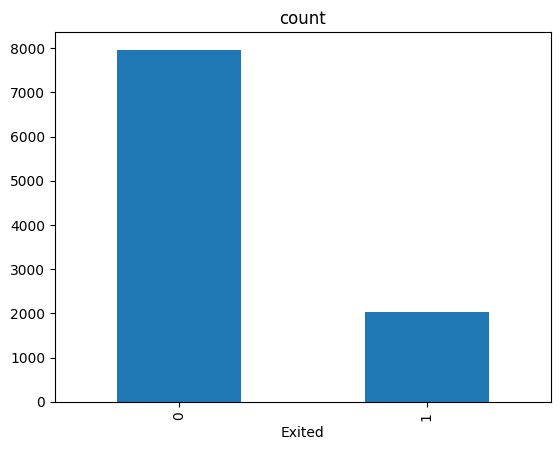

In [94]:
# Bar plot for the zero (0=no) class and the one (1=yes) for the target variable
count = df1["Exited"].value_counts()
count.plot(kind="bar", title="count");

<Axes: xlabel='Geography', ylabel='count'>

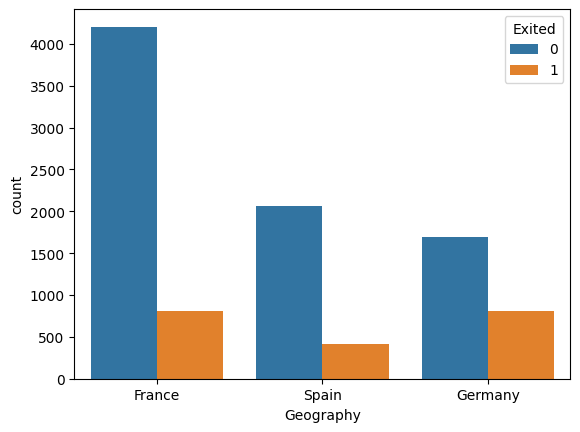

In [95]:
sns.countplot(x = "Geography", hue = "Exited", data=df1)

***

<font color=orange>

## **18. Return a histogram and boxplot for series attributes for the Pandas dataframe named "df1"**</font>
    
**OBSERVATIONS**
    

<font color=#0e92ea>
    
    
#### **18a. Credit Score** -- <span style='color:darkblue'>**OBSERVATION:** min=350, max=850, mean=650, median=652; mean = median; normal distribution. About 8 - 10 outliers under the 1st quartile, but not enought to drop.</span>
#### **18b. Age** -- <span style='color:darkblue'>**OBSERVATION:** min=18, max=92, mean=38.92, median=37;mean > median; slightly right skewed; 75 percent of customers are 44 years old or less; big difference between 3rd quartile and max suggests outliers; about 25 outliers.  At this point, I may keep them. More investigation will be completed below.</span>
#### **18c. Balance** -- <span style='color:darkblue'>**OBSERVATION:**   min=0, max=250,898.09, mean=76,485.89, median=97,198.54; mean < median, left skewed data; 36% of customers have a zero balance. I will not treat these as missing values. I will not treat these as outliers.</span>
#### **18d. Estimated Salary** -- <span style='color:darkblue'>**OBSERVATION:** min=11.58, max=199,992.48, mean=100,090.24, median=100,193.92; mean < median, slightly left skewed; 25% of customers make less than 51K which is about 1/2 of the mean salary. Still, every bin seems to be represented equally. The histogram is a rectangle, not a bell.</span>
#### **18e. Number of Products** -- <span style='color:darkblue'>**OBSERVATION:**  min=1, max=4, mean=1.53, median=1; mean > median, slightly right skewed; 50% of customers only have 1 product.</span>


In [96]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [97]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<font color=#0e92ea>
    
#### **18a. Credit Score**</font>

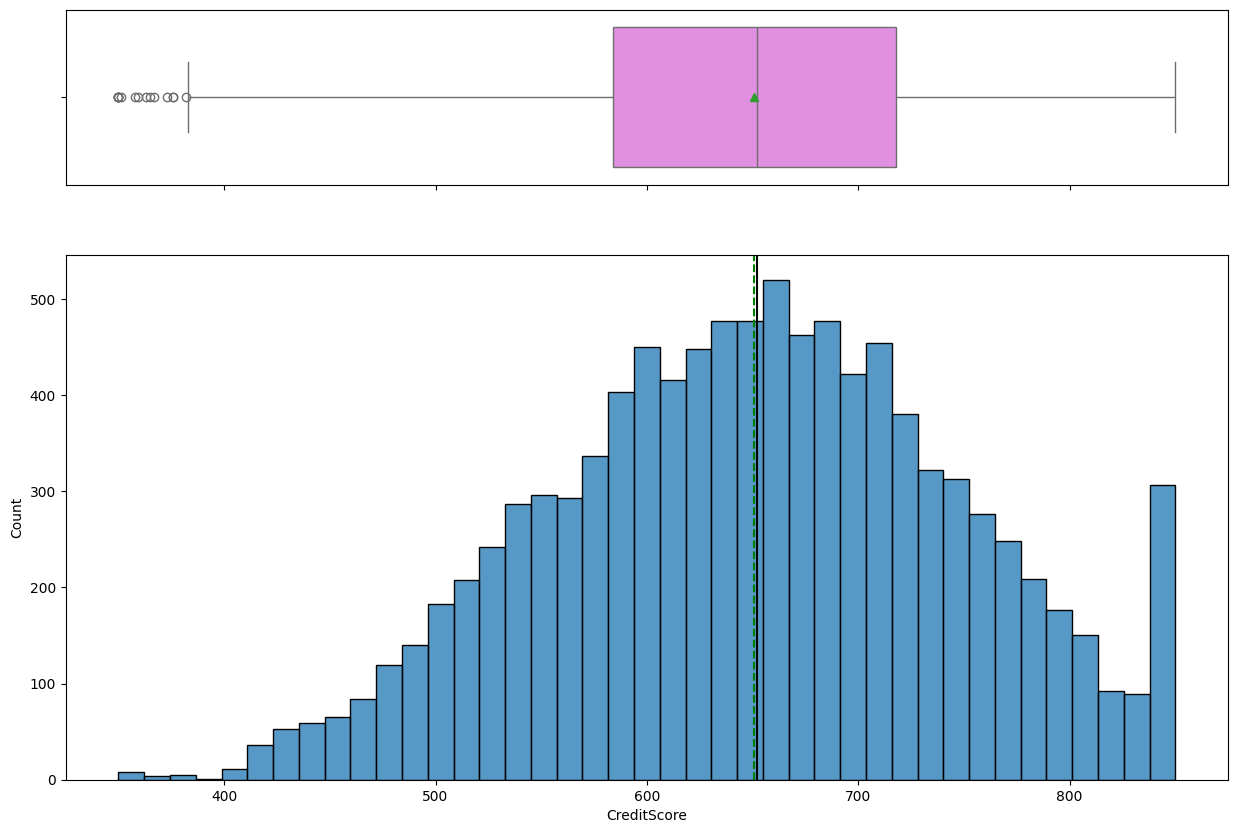

In [98]:
# 18a
# Please read the observations above for 18a

histogram_boxplot(df1, "CreditScore")

In [99]:
# 18a
# Return extreme values for credit score
df1[(df1.CreditScore < 365) | (df1.CreditScore > 850)]

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
1193          363     Spain  Female   28       6 146098.43              3   
1405          359    France  Female   44       6 128747.69              1   
1631          350     Spain    Male   54       1 152677.48              1   
1838          350   Germany    Male   39       0 109733.20              2   
1962          358     Spain  Female   52       8 143542.36              3   
2473          351   Germany  Female   57       4 163146.46              1   
8723          350    France    Male   51      10      0.00              1   
8762          350    France  Female   60       3      0.00              1   
9624          350    France  Female   40       0 111098.85              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1193          1               0        100615.14       1  
1405          1               0        146955.71       1  
1631          1               1        191973.49       1  
1838          0               0        123602.11       1  
1962          1               0        141959.11       1  
2473          1               0        169621.69       1  
8723          1               1        125823.79       1  
8762          0               0        113796.15       1  
9624          1               1        172321.21       1

In [100]:
# Credit Score Value Counts (normalized)

df1.CreditScore.value_counts(normalize=True)

CreditScore
850   0.02
678   0.01
655   0.01
705   0.01
667   0.01
      ... 
351   0.00
365   0.00
382   0.00
373   0.00
419   0.00
Name: proportion, Length: 460, dtype: float64

<font color=#0e92ea>
    
#### **18b. Age**</font>

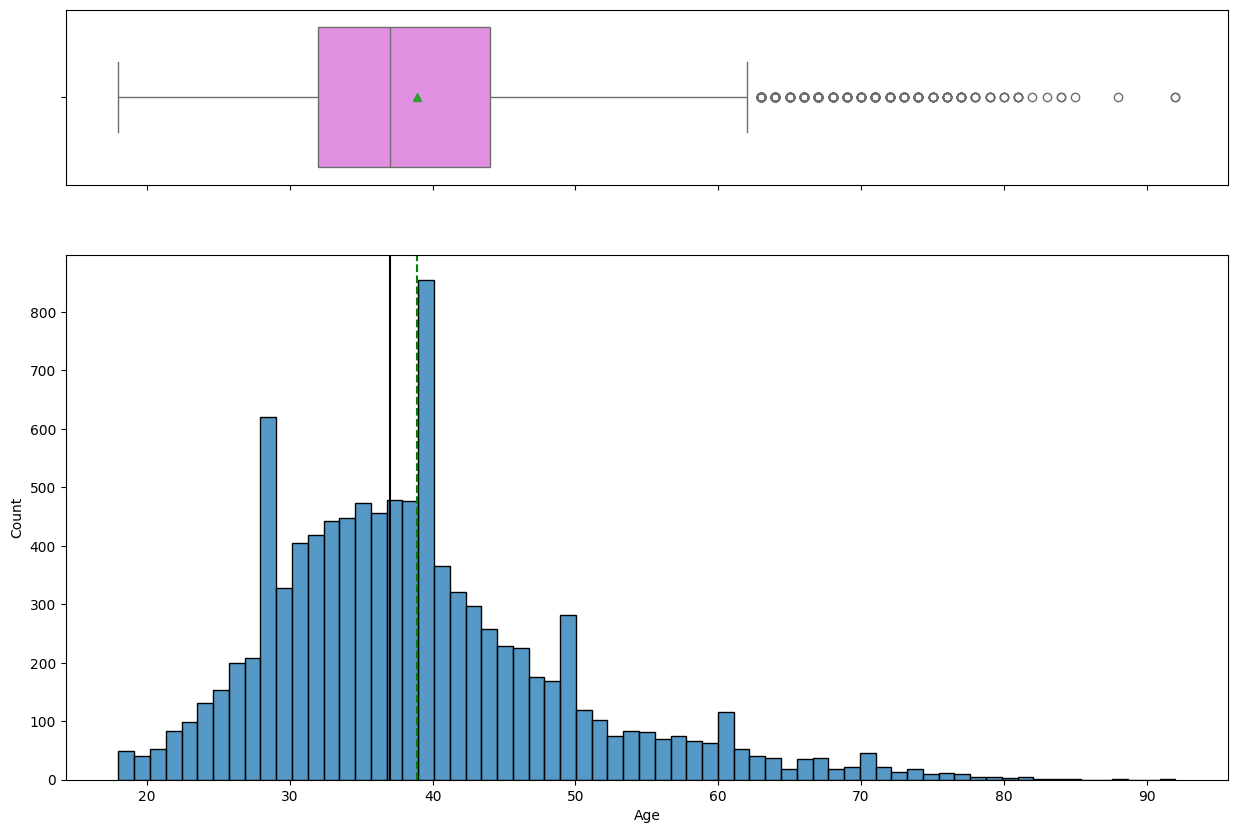

In [101]:
# 18b
# Please read the observations above for 18b

histogram_boxplot(df1, "Age")

In [102]:
# 18b
# Return extreme values for age
df1[(df1.Age < 18) | (df1.Age > 62)]

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
58            511     Spain  Female   66       4      0.00              1   
85            652     Spain  Female   75      10      0.00              2   
104           670     Spain  Female   65       1      0.00              1   
158           646    France  Female   73       6  97259.25              1   
181           510    France    Male   65       2      0.00              2   
...           ...       ...     ...  ...     ...       ...            ...   
9753          656   Germany    Male   68       7 153545.11              1   
9765          445    France    Male   64       2 136770.67              1   
9832          595   Germany  Female   64       2 105736.32              1   
9894          521    France  Female   77       6      0.00              2   
9936          609    France    Male   77       1      0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
58            1               0          1643.11       1  
85            1               1        114675.75       0  
104           1               1        177655.68       1  
158           0               1        104719.66       0  
181           1               1         48071.61       0  
...         ...             ...              ...     ...  
9753          1               1        186574.68       0  
9765          0               1         43678.06       0  
9832          1               1         89935.73       1  
9894          1               1         49054.10       0  
9936          0               1         18708.76       0  

[359 rows x 11 columns]

In [103]:
# Age Value Counts (normalized)

df1.Age.value_counts(normalize=True)

Age
37   0.05
38   0.05
35   0.05
36   0.05
34   0.04
33   0.04
40   0.04
39   0.04
32   0.04
31   0.04
41   0.04
29   0.03
30   0.03
42   0.03
43   0.03
28   0.03
44   0.03
45   0.02
46   0.02
27   0.02
26   0.02
47   0.02
48   0.02
25   0.02
49   0.01
50   0.01
24   0.01
51   0.01
52   0.01
23   0.01
22   0.01
54   0.01
55   0.01
57   0.01
53   0.01
56   0.01
58   0.01
59   0.01
60   0.01
61   0.01
21   0.01
62   0.01
63   0.00
20   0.00
64   0.00
67   0.00
66   0.00
71   0.00
19   0.00
18   0.00
69   0.00
72   0.00
68   0.00
74   0.00
70   0.00
65   0.00
73   0.00
76   0.00
77   0.00
75   0.00
78   0.00
79   0.00
81   0.00
80   0.00
92   0.00
84   0.00
88   0.00
82   0.00
85   0.00
83   0.00
Name: proportion, dtype: float64

<font color=#0e92ea>
    
#### **18c. Balance**</font>

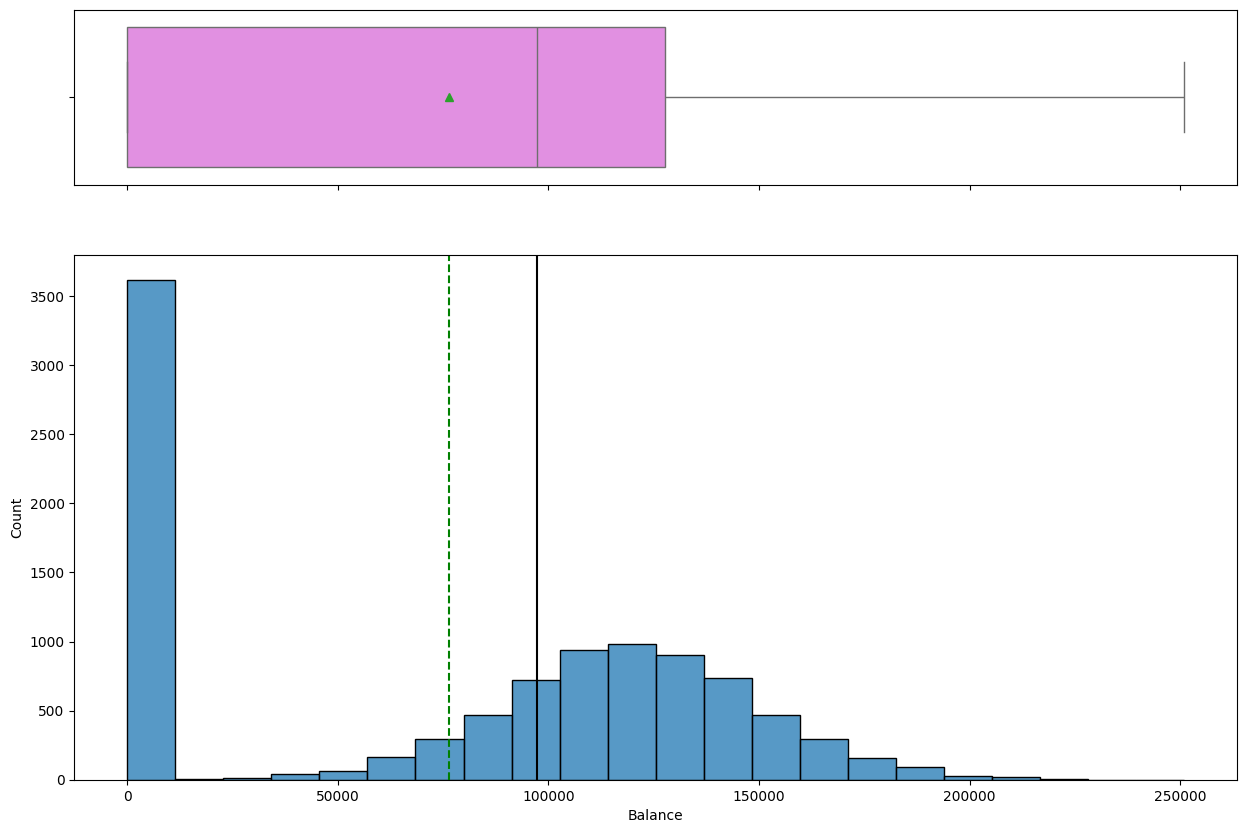

In [104]:
# 18c
# Please read the observations above for 18c

histogram_boxplot(df1, "Balance")

In [105]:
# Balance Value Counts (normalized)

df1.Balance.value_counts(normalize=True)

Balance
0.00        0.36
130170.82   0.00
105473.74   0.00
159397.75   0.00
144238.70   0.00
            ... 
108698.96   0.00
238387.56   0.00
111833.47   0.00
126619.27   0.00
138734.94   0.00
Name: proportion, Length: 6382, dtype: float64

<font color=#0e92ea>
    
#### **18d. Estimated Salary**</font>

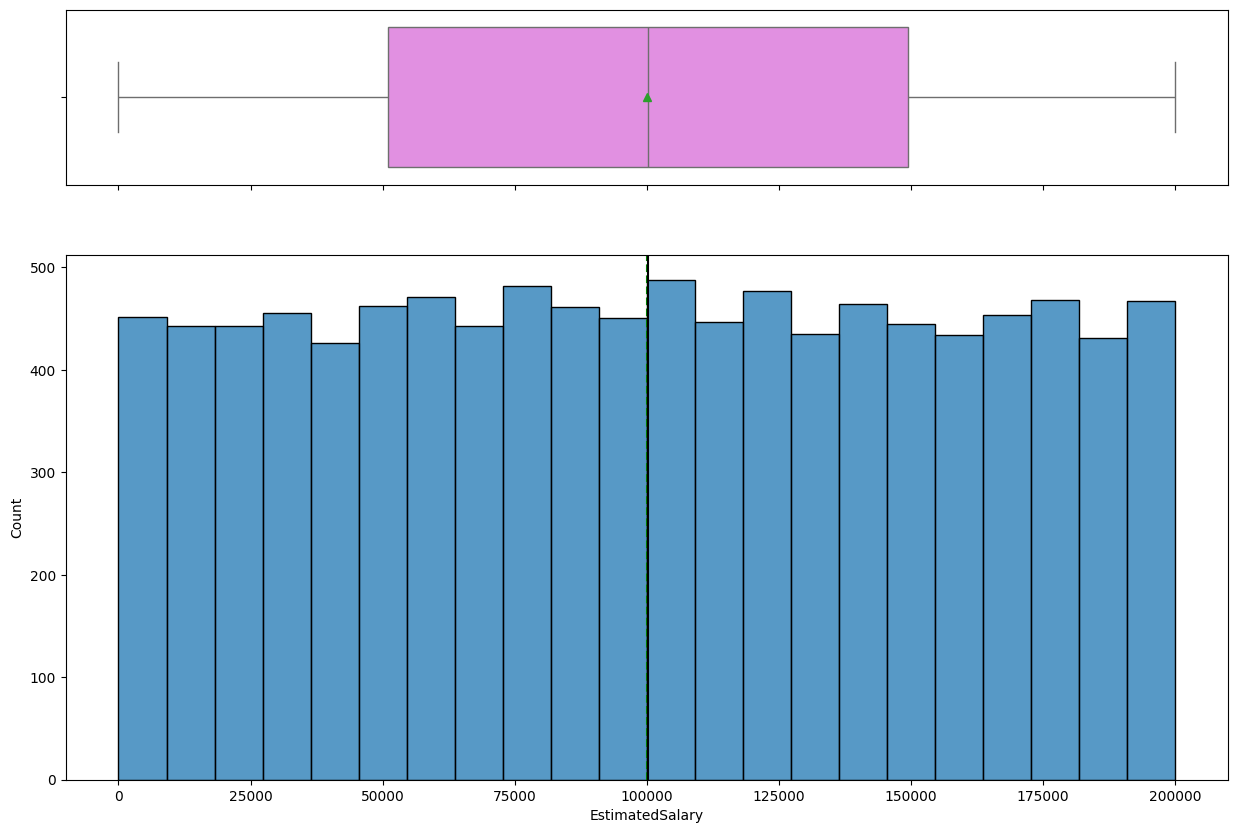

In [106]:
# 18d
# Please read the observations above for 18d

histogram_boxplot(df1, "EstimatedSalary")

In [107]:
# Estimated Salary Value Counts (normalized)

df1.EstimatedSalary.value_counts(normalize=True)

EstimatedSalary
24924.92    0.00
121505.61   0.00
89874.82    0.00
72500.68    0.00
182692.80   0.00
            ... 
188377.21   0.00
55902.93    0.00
4523.74     0.00
102195.16   0.00
2465.80     0.00
Name: proportion, Length: 9999, dtype: float64

<font color=#0e92ea>
    
#### **18e. Number of Products**</font>

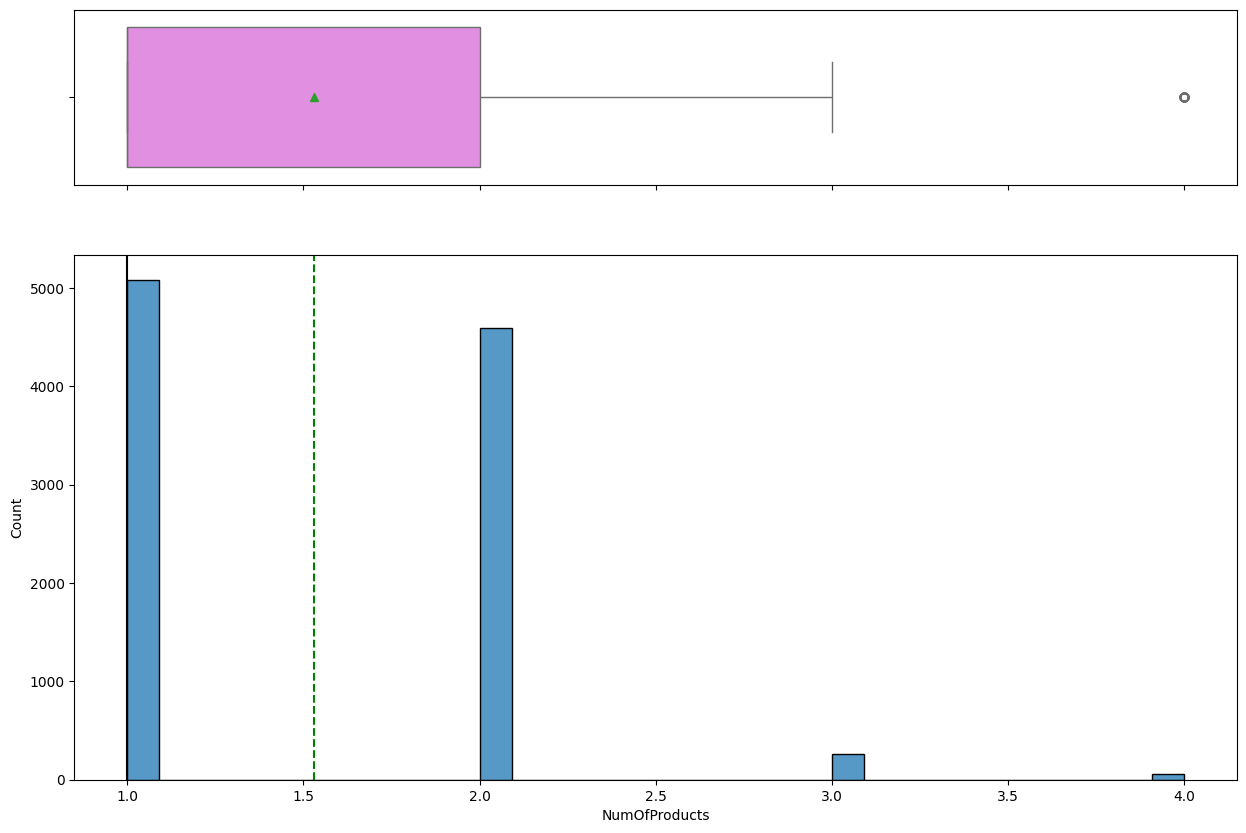

In [108]:
# 18e
# Please read the observations above for 18e

histogram_boxplot(df1, "NumOfProducts")

In [109]:
# 18e
# Return extreme values for number of products
df1[(df1.NumOfProducts < 1) | (df1.NumOfProducts > 3)]

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
7             376   Germany  Female   29       4 115046.74              4   
70            738   Germany    Male   58       2 133745.44              4   
1254          628    France  Female   46       1  46870.43              4   
1469          819   Germany  Female   49       1 120656.86              4   
1488          596     Spain    Male   30       6 121345.88              4   
1701          792    France    Male   50       9      0.00              4   
1876          640   Germany    Male   39       9 131607.28              4   
2124          704    France    Male   32       7 127785.17              4   
2196          773   Germany    Male   47       2 118079.47              4   
2285          630   Germany    Male   50       3 129370.91              4   
2462          672    France  Female   53       9 169406.33              4   
2499          614    France  Female   37       8  75150.34              4   
2509          655    France  Female   50      10      0.00              4   
2541          611    France  Female   61       3 131583.59              4   
2614          546   Germany  Female   58       3 106458.31              4   
2617          692   Germany    Male   45       6 152296.83              4   
2872          439     Spain    Male   52       3  96196.24              4   
3152          644    France  Female   40       9 137285.26              4   
3365          671     Spain  Female   34       5 130929.02              4   
3841          653    France  Female   60       2 120731.39              4   
4013          720   Germany  Female   57       1 162082.31              4   
4014          641   Germany  Female   51       2 117306.69              4   
4166          850     Spain  Female   45       5 174088.30              4   
4260          587    France    Male   40       2      0.00              4   
4403          602   Germany  Female   43       2 113641.49              4   
4511          634    France  Female   45       2      0.00              4   
4516          497   Germany  Female   32       8 111537.23              4   
4606          797    France  Female   55      10      0.00              4   
4654          578   Germany  Female   31       5 102088.68              4   
4748          537   Germany  Female   37       7 158411.95              4   
4822          745    France  Female   32       2      0.00              4   
5010          575   Germany    Male   49       7 121205.15              4   
5137          698    France  Female   51       6 144237.91              4   
5235          645    France  Female   68       9      0.00              4   
5386          642    France    Male   48       9 118317.27              4   
5700          447    France    Male   41       3      0.00              4   
5904          692   Germany    Male   45       6 142084.04              4   
6150          632   Germany    Male   41       8 127205.32              4   
6172          568   Germany    Male   43       5  87612.64              4   
6279          757     Spain  Female   55       9 117294.12              4   
6750          618    France  Female   42       2      0.00              4   
6875          610    France  Female   57       7  72092.95              4   
7257          747    France  Female   47       5 139914.60              4   
7457          665   Germany  Female   43       2 116322.27              4   
7567          629    France    Male   44       5      0.00              4   
7698          592    France    Male   60       9      0.00              4   
7724          842    France    Male   44       3 141252.18              4   
7729          850    France  Female   35       2 128548.49              4   
8041          698     Spain  Female   50       1      0.00              4   
8590          771    France  Female   41      10 108309.00              4   
8683          697    France  Female   49       7 195238.29              4   
88

In [110]:
# Number of Products Value Counts (normalized)

df1.NumOfProducts.value_counts(normalize=True)

NumOfProducts
1   0.51
2   0.46
3   0.03
4   0.01
Name: proportion, dtype: float64

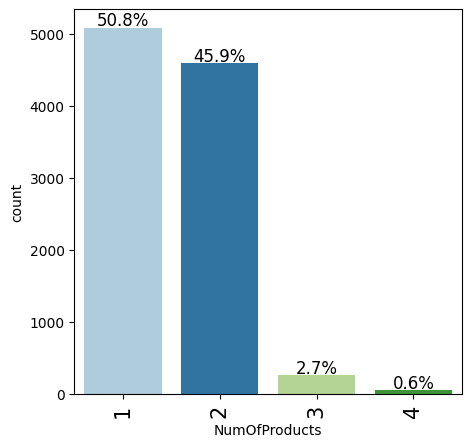

In [111]:
labeled_barplot(df1, "NumOfProducts", perc=True)

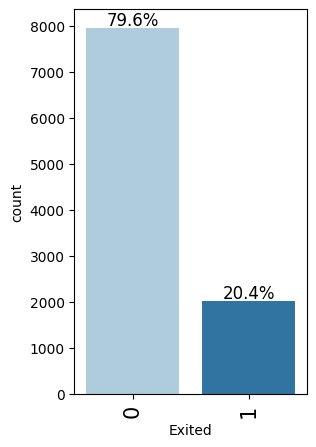

In [112]:
# TARGET VARIABLE
labeled_barplot(df1, "Exited", perc=True)

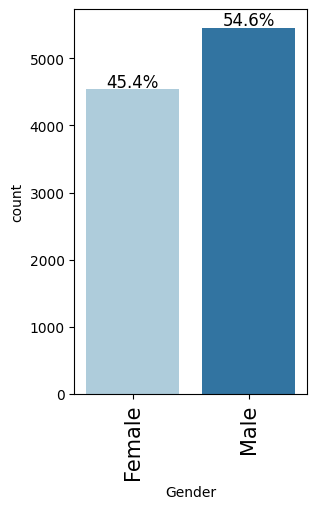

In [113]:
labeled_barplot(df1, "Gender", perc=True)

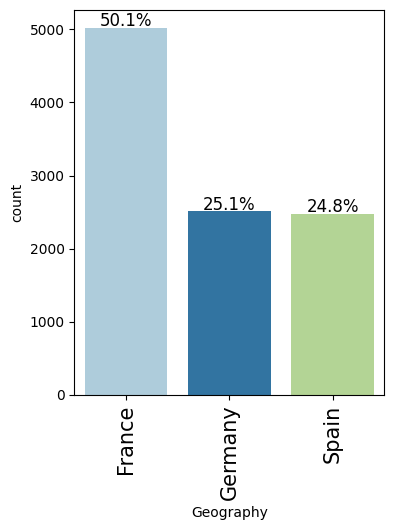

In [114]:
labeled_barplot(df1, "Geography", perc=True)

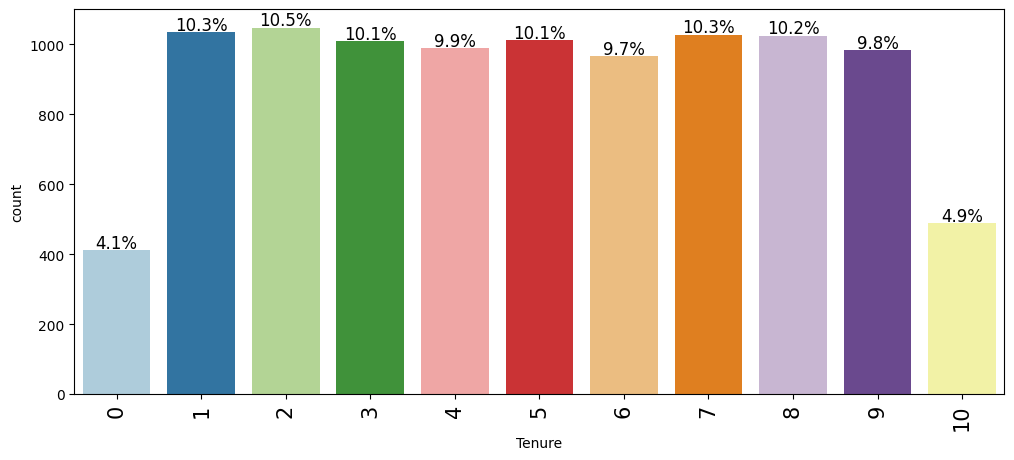

In [115]:
labeled_barplot(df1, "Tenure", perc=True)

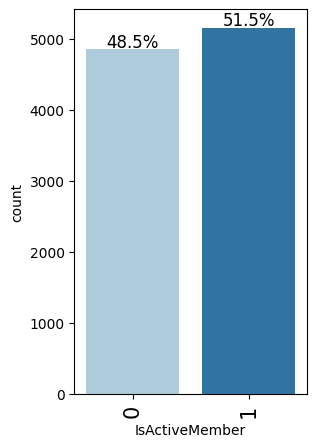

In [116]:
labeled_barplot(df1, "IsActiveMember", perc=True)

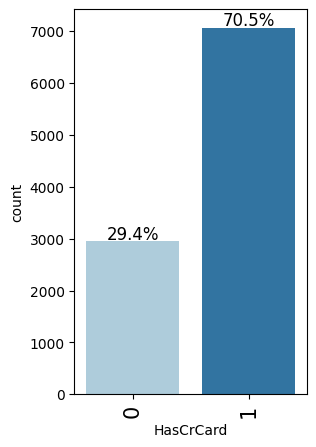

In [117]:
labeled_barplot(df1, "HasCrCard", perc=True)

***

<font color=orange>

## **19. Estimator of the Cumulative Distribution Function: The ECDF plots a feature of the data from least to greatest, in order, and it visualizes the whole feature as if were distributed across the data set.**</font>
    
<font color=#0e92ea>
      
###### **OBSERVATIONS:**</font>
* <span style='color:orange'>Age, Credit Score, and Balance</span> follow the relatively same sigmoidal cumulative distribution curve from least to greatest.
* <span style='color:orange'>Estimated Salary</span> follows a positive linear gradient for all income levels .

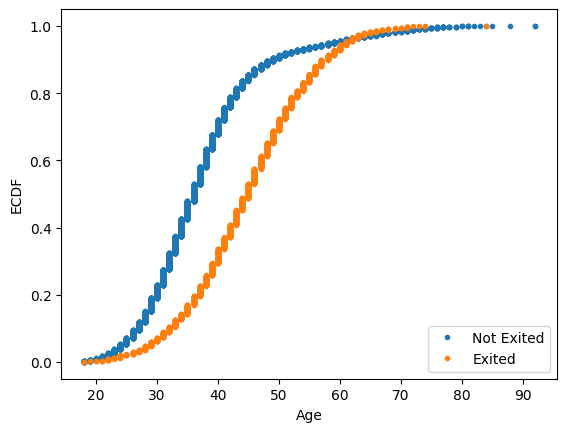

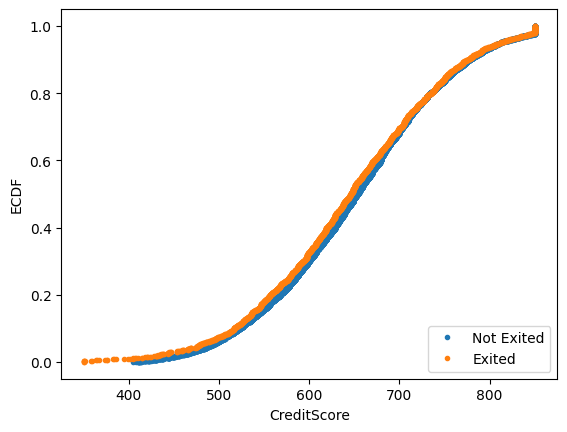

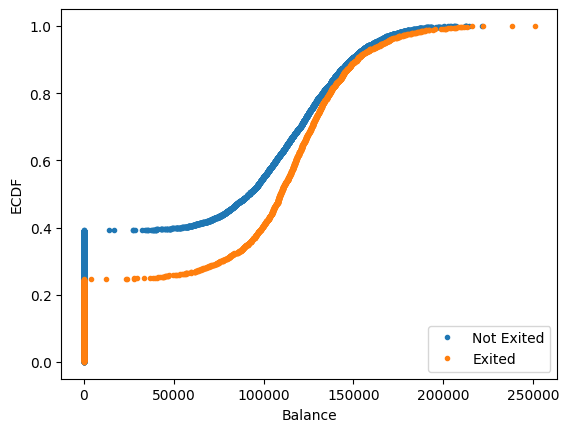

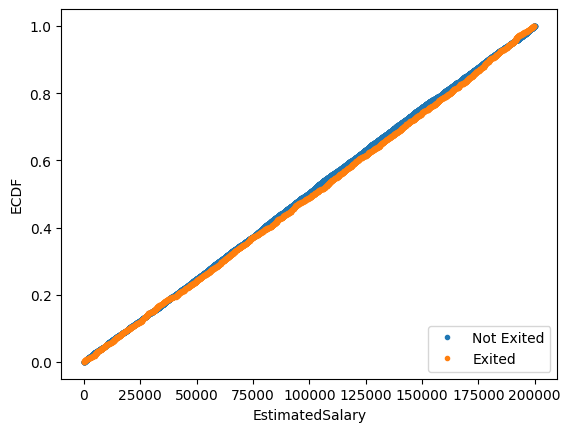

In [118]:
def ecdf(df_arr):
    # number of data points
    n = len(df_arr)
    xvals = np.sort(df_arr)
    yvals = np.arange(1, n + 1) / n
    return xvals, yvals


for var in ["Age", "CreditScore", "Balance", "EstimatedSalary"]:
    tmpx, tmpy = ecdf(df1.loc[df["Exited"] == 0, var])
    t1, t2 = ecdf(df.loc[df1["Exited"] == 1, var])
    _ = plt.plot(tmpx, tmpy, marker=".", linestyle="none", label="Not Exited")
    _ = plt.plot(t1, t2, marker=".", linestyle="none", label="Exited")
    _ = plt.legend(("Not Exited", "Exited"), loc="lower right")
    _ = plt.xlabel(var)
    _ = plt.ylabel("ECDF")
    plt.show()

***

<font color=orange>

## **20. Return the pairwise correlation of all columns as well as a heatmap for the dataframe .**</font>

###### **OBSERVATIONS:**</font>
* <span style='color:#0e92ea'>UNRELATED FEATURES:</span> <span style='color:darkblue'>The features in this dataset all seem to be **unrelated to one another**</span>
* <span style='color:#0e92ea'>HIGHEST POSITIVE CORRELATION:</span> <span style='color:darkblue'>0.29 Age to Exited.</span>
* <span style='color:#0e92ea'>HIGHEST NEGATIVE CORRELATION:</span> <span style='color:darkblue'>-0.30 Balance to Number of Products. </span>

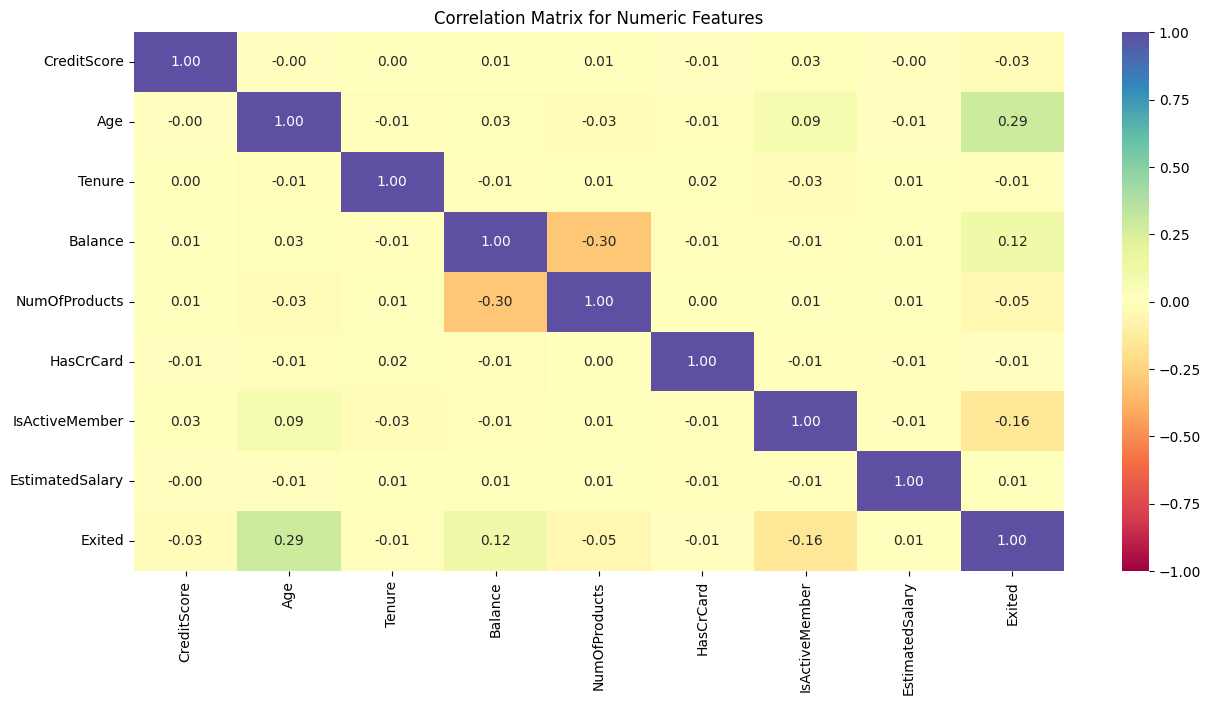

In [119]:
# ========================================================
# CREATE A LIST OF NUMERIC FEATURES FOR CALCULATING CORRELATION
# ========================================================
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# ========================================================
# CALCULATE CORRELATION MATRIX ONLY FOR NUMERIC FEATURES
# ========================================================
correlation_matrix = df1[numeric_features].corr()

# ========================================================
# SETUP FOR VISUALIZATION - PRETTIFYING CORRELATION MATRIX OUTPUT
# ========================================================
plt.figure(figsize=(15, 7))  # SETTING THE SIZE OF THE PLOT

# sns.heatmap PLOTS A CORRELATION MATRIX AS A HEATMAP WITH A COLOR SCALE
# annot=True DISPLAYS THE CORRELATION COEFFICIENTS IN EACH CELL
# fmt='.2f' FORMATS THE CORRELATION COEFFICIENTS TO 2 DECIMAL PLACES
# cmap='Spectral' PROVIDES A COLOR SCHEME FOR BETTER VISUALIZATION
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1, fmt=".2f")

# SHOW THE PLOT
plt.title("Correlation Matrix for Numeric Features")
plt.show()


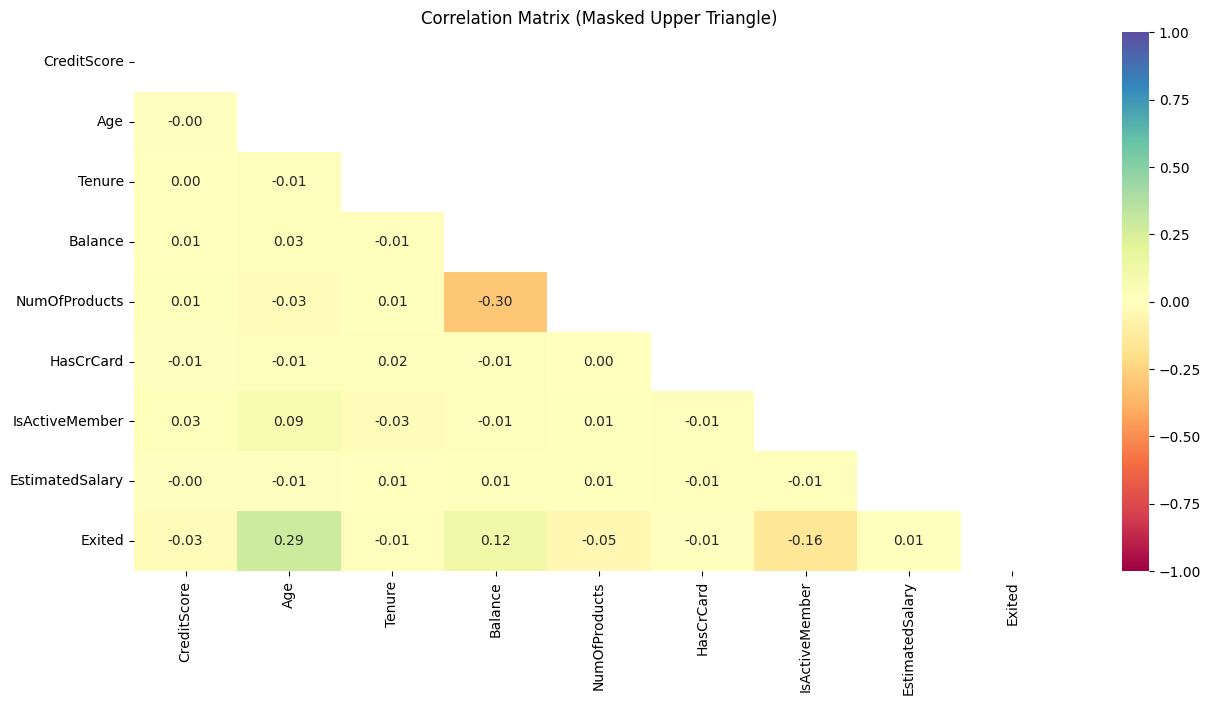

In [120]:
# ========================================================
# ADJUSTED CODE TO MASK THE UPPER TRIANGLE FOR HEATMAP
# ========================================================
plt.figure(figsize=(15, 7))  # SETTING FIGURE SIZE

# CALCULATE CORRELATION MATRIX USING ONLY NUMERIC FEATURES
corr = df1[numeric_features].corr()

# CREATE A MASK FOR THE UPPER TRIANGLE (EXCLUDE DUPLICATE CORRELATIONS)
mask = np.triu(np.ones_like(corr, dtype=bool))

# PLOT THE HEATMAP WITH A MASK TO SHOW ONLY THE LOWER TRIANGLE
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# DISPLAY THE PLOT
plt.title("Correlation Matrix (Masked Upper Triangle)")
plt.show()


***

<font color=orange>

## **21. Return a pairplot for for the dataframe**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Assumption of model algorithms:</font> <span style='color:darkblue'>All attributes exist independent of one another. </span>
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *NORMAL* Bell Curve Distributions:</font> <span style='color:darkblue'>*Credit Score* </span>
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *RIGHT* Skew Distributions:</font> <span style='color:darkblue'>*Age* </span>

###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *LEFT* Skew Distributions:</font> <span style='color:darkblue'>None </span>    
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>KDE *BI-MODAL* Distributions:</font> <span style='color:darkblue'>*Balance*</span>     
    
###### **OBSERVATIONS:**
* <font color=#0e92ea>Credit Score & Age:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Credit Score & Balance:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Credit Score & Estimated Salary:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Age & Balance</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Age & Estimated Salary:</font> <span style='color:darkblue'>Cloud-like Distribution</span>
* <font color=#0e92ea>Balance & Estimated Salary</font> <span style='color:darkblue'>Cloud-like Distribution</span>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Number of Products:</font> <span style='color:darkblue'>It appears as if customers with 3 or 4 products have exited at a much higher rate than other customers dispite any other feature metric.</span>   

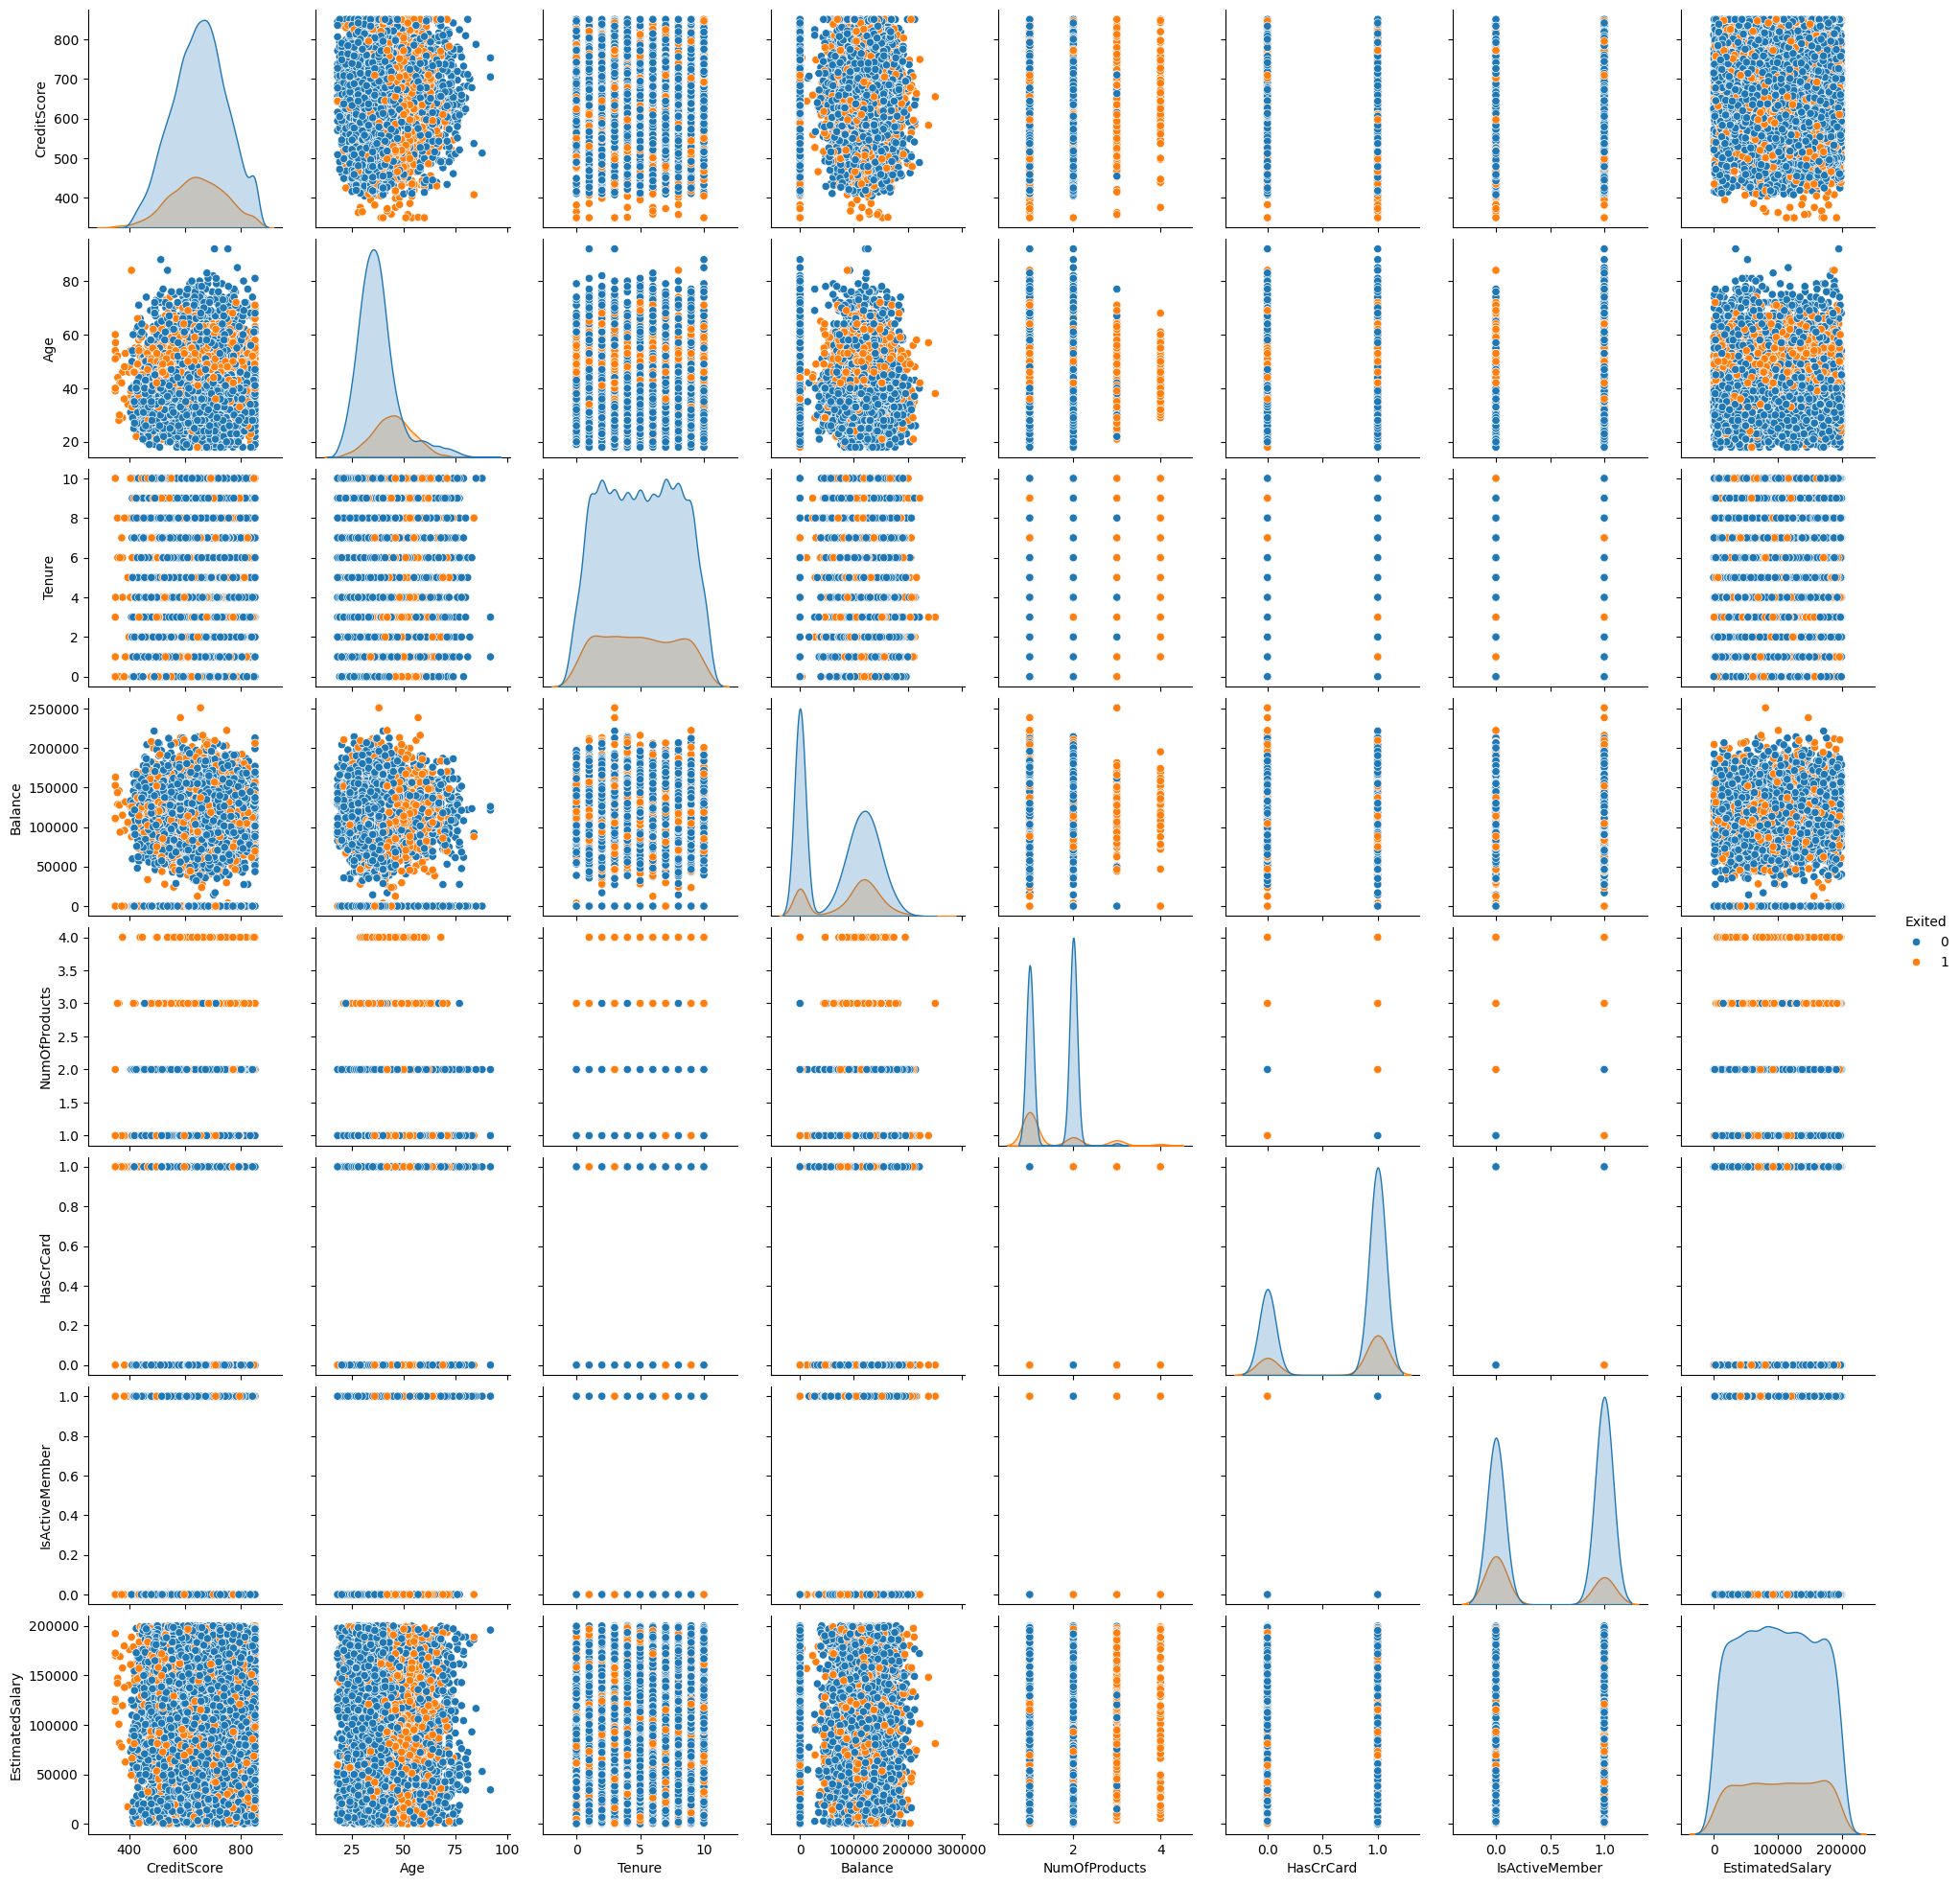

In [121]:
# Please read observations above
sns.pairplot(data=df1, hue="Exited")
plt.show()

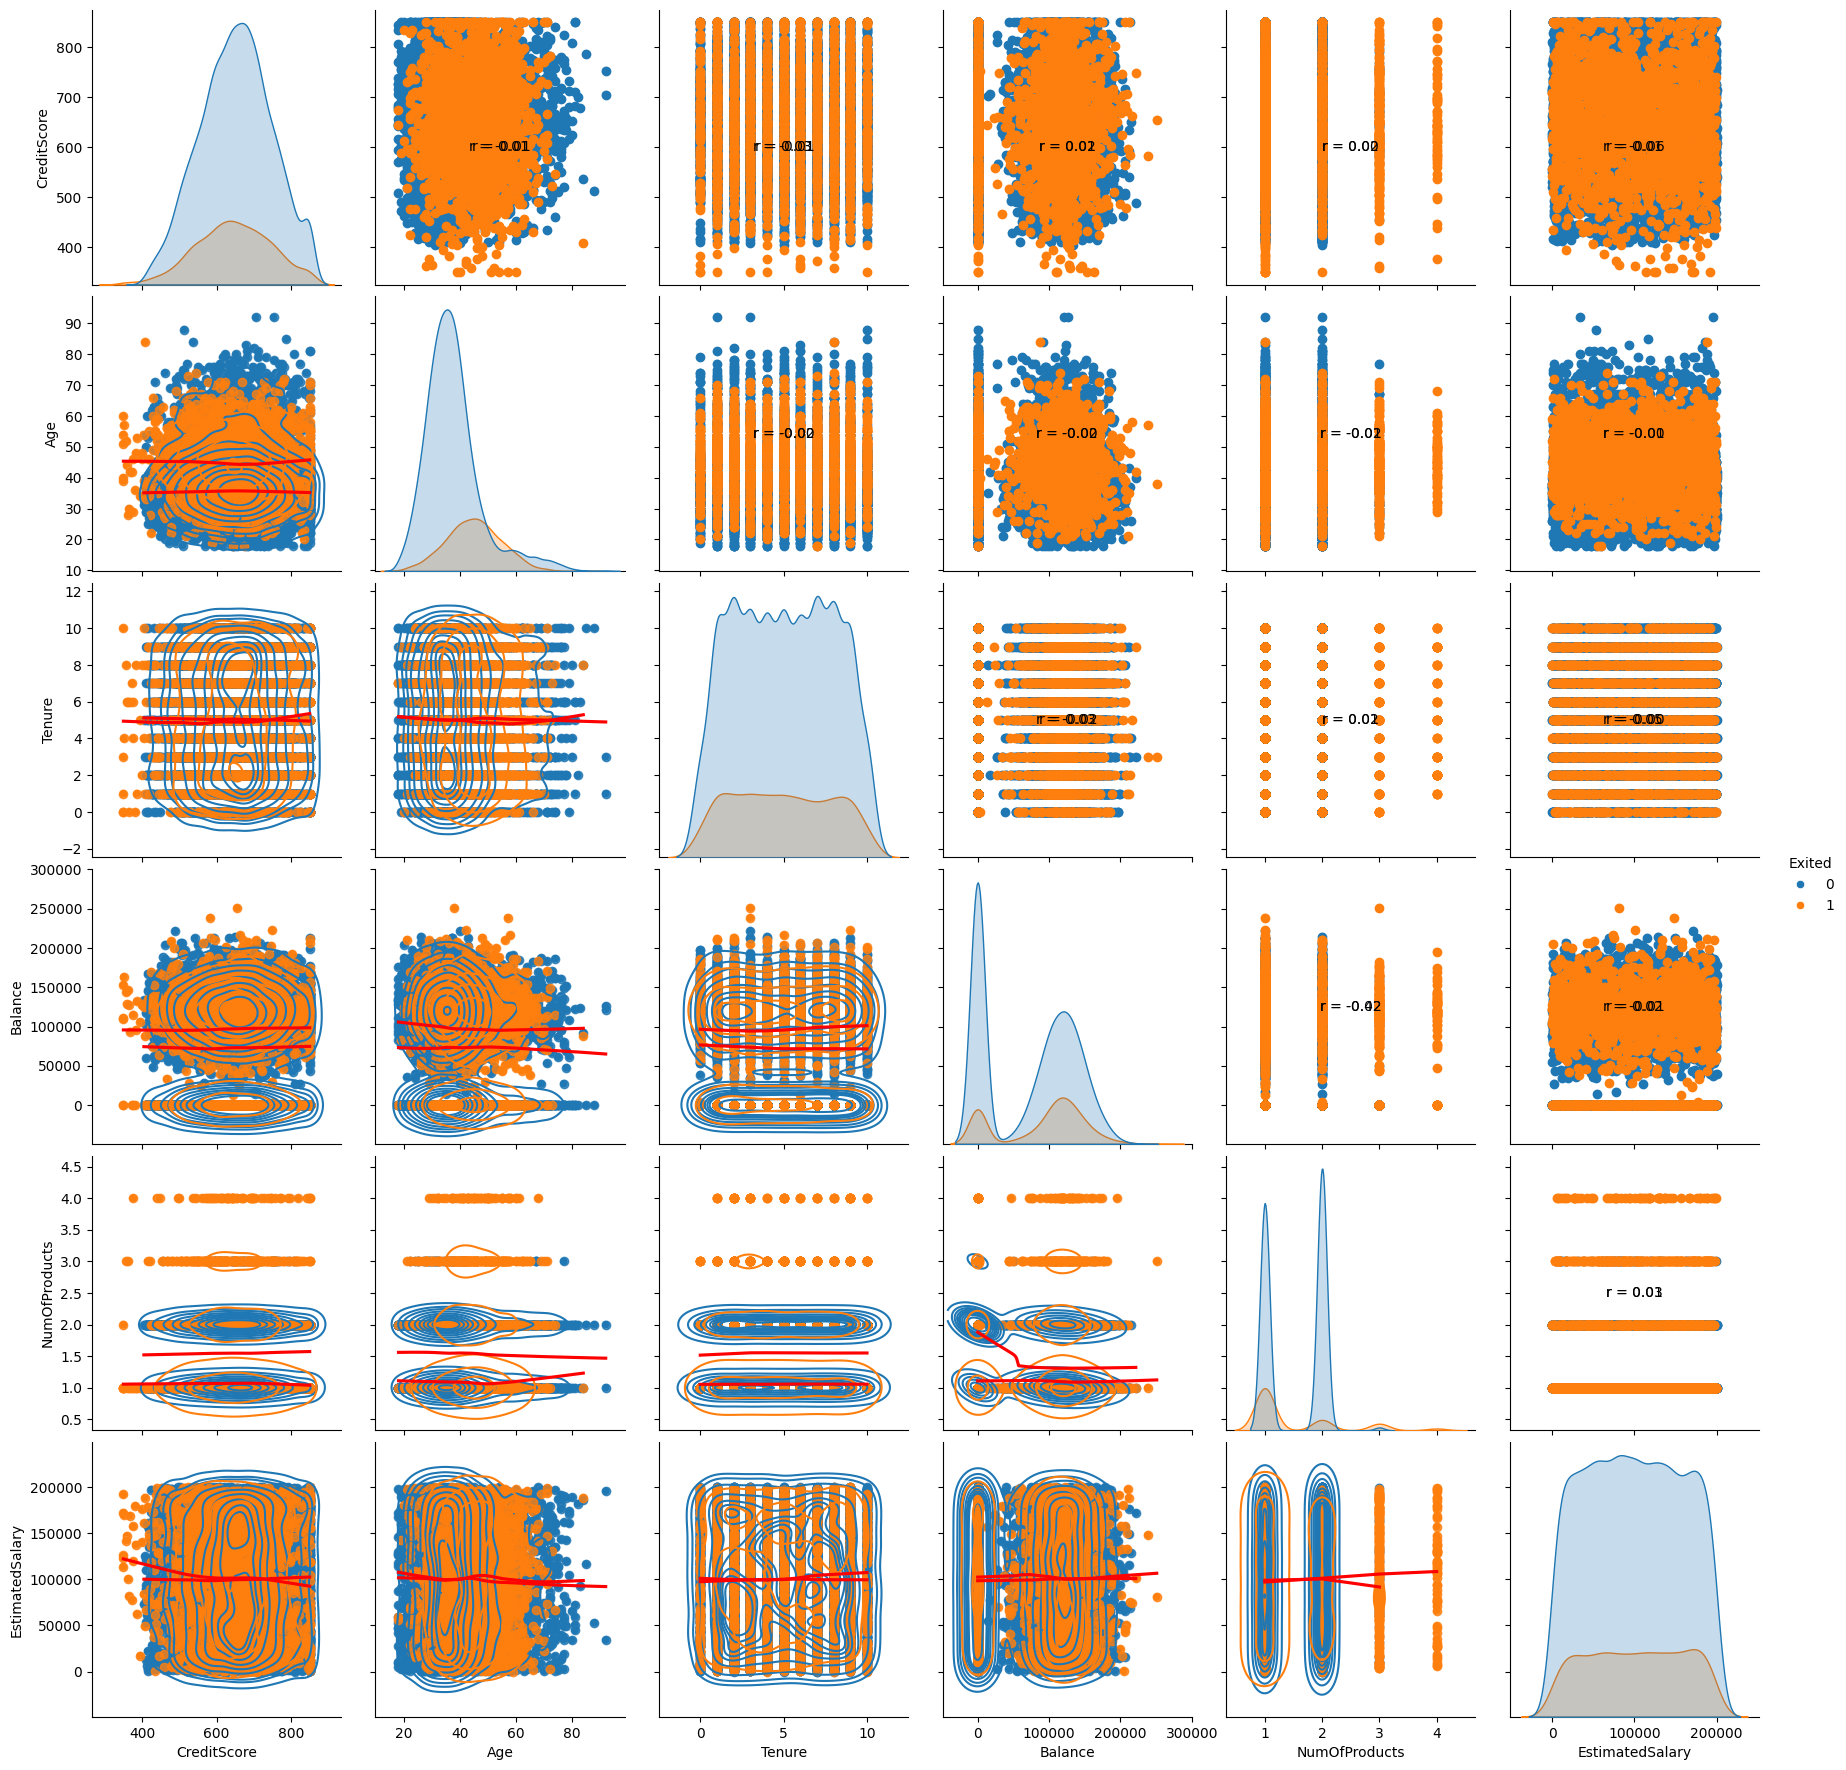

In [122]:
# =====================================================
# CREATE A PAIRPLOT FOR NUMERIC FEATURES IN df1 WITH CUSTOM MAPPINGS
# =====================================================

# SPECIFY NUMERIC COLUMNS TO INCLUDE IN THE PAIRPLOT
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# CREATE THE PAIRPLOT FOR SPECIFIED NUMERIC FEATURES
grid = sns.pairplot(df1, vars=numeric_features, height=3, hue='Exited')

# MAP A SCATTER PLOT TO THE UPPER TRIANGLE
grid = grid.map_upper(plt.scatter)

# MAP THE PEARSON CORRELATION COEFFICIENT TO THE UPPER TRIANGLE
def corr_func(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]  # CALCULATE CORRELATION COEFFICIENT
    ax = plt.gca()  # GET CURRENT AXES
    ax.annotate(f'r = {r:.2f}', xy=(.5, .5), xycoords='axes fraction',
                ha='center', va='center')  # ANNOTATE PLOT

grid = grid.map_upper(corr_func)

# MAP A DENSITY PLOT AND REGRESSION LINE TO THE LOWER TRIANGLE
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

# SHOW THE PLOT
plt.show()

***

This is a pairplot that displays relationships between various numeric variables from the dataset, specifically the following: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary, and the target variable Exited (0 = "Not Exited" in blue, 1 = "Exited" in orange). Below is a detailed analysis of each key component in the pairplot:

1. Diagonal (Density Plots):
Each diagonal cell shows the distribution of each individual feature.
For CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary, the density plot shows how each class (Exited or Not Exited) is distributed.
CreditScore: Both classes have a similar distribution, though non-exited customers (blue) have a slightly higher density in the mid-range (600–800).
Age: There is a clear difference in age distribution. Exited customers (orange) are more likely to be older, peaking around 60, while Not Exited (blue) customers peak around 35.
Tenure: The distribution is more uniform for both classes, with a slight variation.
Balance: There is a notable difference. Exited customers have a wider distribution across all balance levels, whereas many Not Exited customers have a balance close to zero.
NumOfProducts: Most customers, regardless of exit status, have 1 or 2 products, with very few having more.
EstimatedSalary: There is no significant difference in salary distribution between Exited and Not Exited customers.
2. Lower Triangle (Density and Regression Plots):
Density Plot: This is shown in the lower triangle, with contour lines representing density between variables for both classes.
Regression Plot: Red lines represent linear regression fits, with lowess smoothing to capture trends.
CreditScore vs. Age: There’s no obvious linear relationship, and the density contours overlap, showing a similar relationship for both classes.
Balance vs. Age: The contour lines for Exited (orange) customers show higher balances with age. The red regression line slopes upwards slightly, indicating that older customers tend to have higher balances.
NumOfProducts vs. Balance: Most customers cluster around 1-2 products, but those with higher balances tend to be more likely to exit, as shown by the red regression line.
Balance vs. Tenure: Little relationship, though Exited customers have higher balances across all tenures.
3. Upper Triangle (Scatter Plots with Pearson Correlation):
Scatter Plots: Each upper triangle cell shows scatter plots for paired variables, with Pearson correlation coefficients (r) annotated.
r = 0.29 (Exited vs. Age): Moderate positive correlation between Age and the likelihood of Exiting. Older customers are more likely to leave the bank.
r = 0.12 (Exited vs. Balance): Small positive correlation between Balance and Exiting. Customers with higher balances are slightly more likely to exit.
r = -0.30 (NumOfProducts vs. Balance): Negative correlation here. Customers with more products tend to have lower balances.
r ≈ 0 for most others: This indicates little or no linear relationship between most pairs of variables.
4. Color and Class Analysis (Exited vs. Not Exited):
Orange (Exited, 1): Represents customers who exited the bank in the past 6 months. Noticeable in age and balance, where the distributions are different from customers who stayed.
Blue (Not Exited, 0): Represents customers who did not exit the bank. They tend to cluster more in lower balance and younger age ranges.
Summary:
Key Correlations: Age has the strongest positive correlation with exiting (r = 0.29), followed by balance (r = 0.12). NumOfProducts and Balance have the strongest negative correlation (r = -0.30), indicating customers with more products tend to have lower balances.
Exited vs. Not Exited: Customers who exited the bank are older, tend to have higher balances, and are less clustered around a single tenure or number of products.
Visual Patterns: The density plots show that customers who exited have a broader and more dispersed distribution across age, tenure, and balance, while those who stayed are more clustered around younger ages and lower balances.

<font color=orange>

## **22. Return a boxplot to visualize continuous features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Age Median Value vs. Exited :</font> <span style='color:darkblue'>The median value for age in the customers who have exited is greater than the median value for age in the customers who have not exited.</span>   

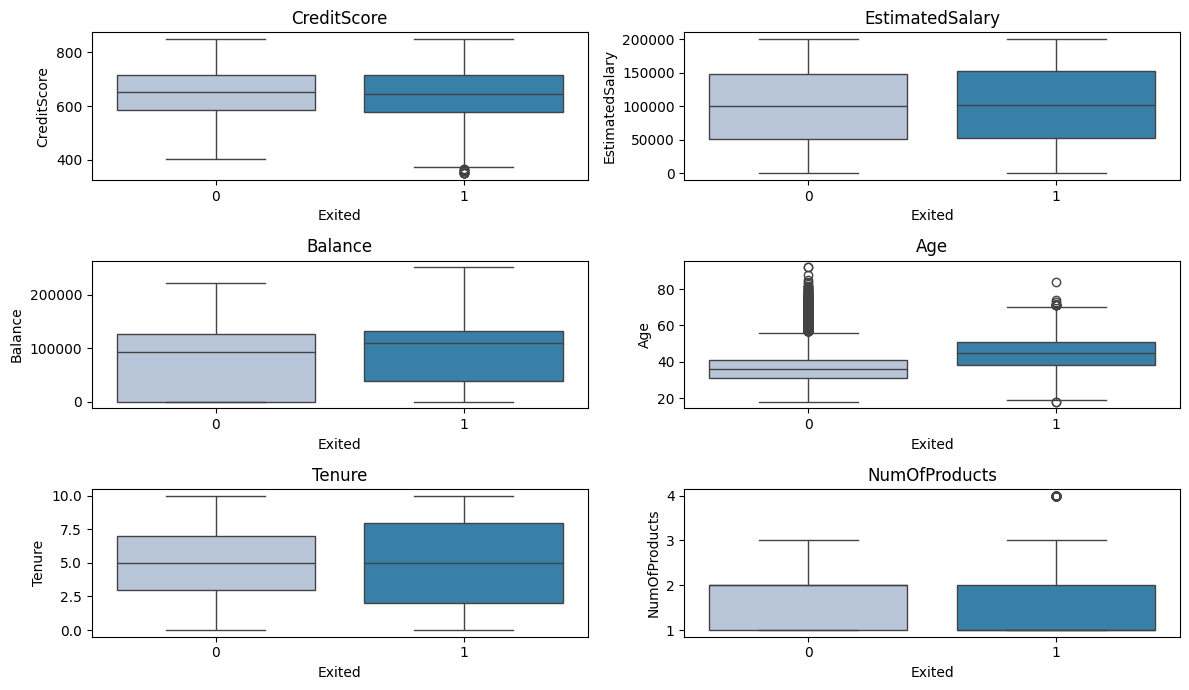

In [123]:
# CREATE A LIST OF NUMERIC COLUMNS FOR THE PLOT
cols = df1[
    [
        "CreditScore",
        "EstimatedSalary",
        "Balance",
        "Age",
        "Tenure",
        "NumOfProducts",
    ]
].columns.tolist()

# SET THE SIZE OF THE PLOT FIGURE
plt.figure(figsize=(12, 7))

# LOOP THROUGH EACH VARIABLE AND PLOT A BOXPLOT
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)  # SPECIFY THE GRID FOR PLOTS (3 ROWS, 2 COLUMNS)

    # CREATE A BOXPLOT, GROUPING BY "Exited" AND PLOTTING EACH VARIABLE
    sns.boxplot(x=df1["Exited"], y=df1[variable], palette="PuBu")

    # ENSURE THE SUBPLOTS DON'T OVERLAP
    plt.tight_layout()

    # SET THE TITLE FOR EACH PLOT TO BE THE VARIABLE NAME
    plt.title(variable)

# SHOW THE FINAL PLOT
plt.show()


***

<font color=orange>

## **23. Return a stacked barplot for descrete features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Exited **vs.** Gender:</font> <span style='color:darkblue'>Exited: 25% Females **vs.** 16.5% Males</span>
* <font color=#0e92ea> Exited vs. Geography:</font> <span style='color:darkblue'>Exited: 32.4% Germans **vs.** 16.7% Spaniards **vs.** 16.2% French</span>
* <font color=#0e92ea>Exited **vs.** Has Credit Card:</font> <span style='color:darkblue'>Exited: 20.8% Does not have Credit Card **vs.** 20.2% Has Credit Card</span>
* <font color=#0e92ea>Exited **vs.** Is Active Member:</font> <span style='color:darkblue'>Exited: 26.9% Not Active Members **vs.** 14.3% Is Active Member</span>
* <font color=#0e92ea>Exited **vs.** Number of Products:</font></span> <span style='color:darkblue'>Exited: 100% 4 Products **vs.** 82.7% 3 Products **vs.** 27.7% 1 Product **vs.** 7.6% 2 Products</span>
* <font color=#0e92ea>Exited vs. Tenure:</font></span> <span style='color:darkblue'>The visual depicts all 11 categories hovering around the same (plus/minus) 20% exiting rate</span>

In [125]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


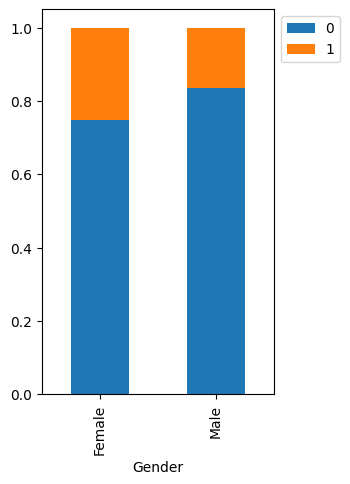

In [126]:
stacked_barplot(df1, "Gender", "Exited")

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


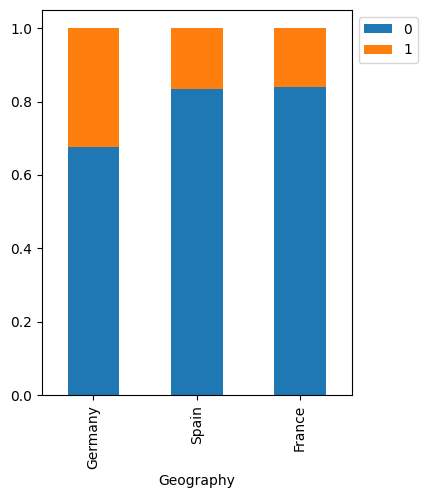

In [127]:
stacked_barplot(df1, "Geography", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


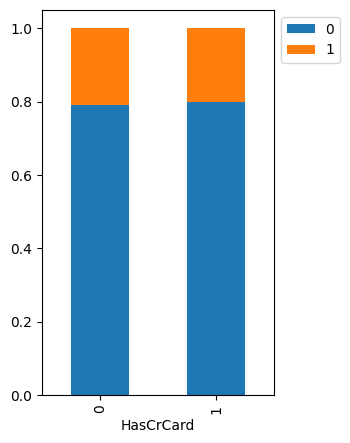

In [128]:
stacked_barplot(df1, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


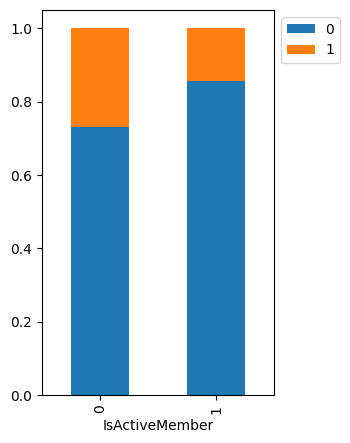

In [129]:
stacked_barplot(df1, "IsActiveMember", "Exited")

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


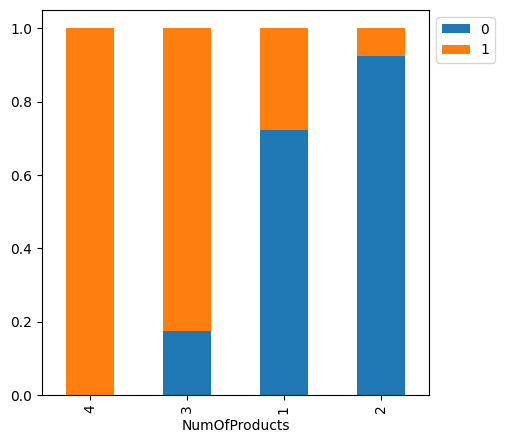

In [130]:
stacked_barplot(df1, "NumOfProducts", "Exited")

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


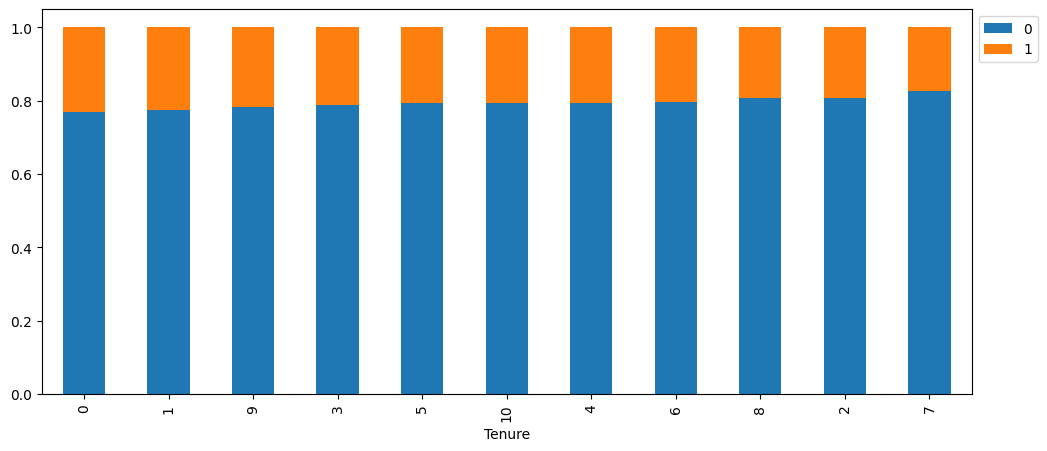

In [131]:
stacked_barplot(df1, "Tenure", "Exited")

***

<font color=orange>

## **24. Return a lineplot for selected continuous features versus Exited**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>Exited **vs.** Age:</font> <span style='color:darkblue'>40 y/o to 65 y/o customers tend to exit their relationships with the bank at a higher rate than any other age groups</span>
* <font color=#0e92ea> Exited vs. Credit Score:</font> <span style='color:darkblue'>Credit Scores below 475 may exit at a slightly higher rate than others, but overall, a particular range of credit score does not indicate a higher or lower exit rate</span>
* <font color=#0e92ea>Exited **vs.** Balance:</font> <span style='color:darkblue'>a particular range of account balance does not indicate a higher or lower exit rate</span>
* <font color=#0e92ea>Exited **vs.** Estimated Salary:</font> <span style='color:darkblue'>a particular range of salary does not indicate a higher or lower exit rate</span>

<Axes: xlabel='Age', ylabel='Exited'>

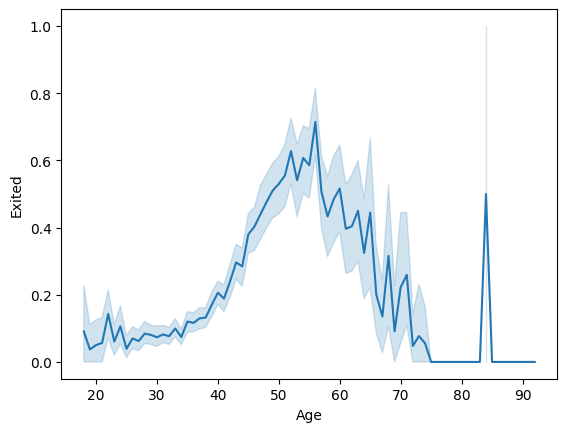

In [132]:
sns.lineplot(x="Age", y="Exited", data=df1)

<Axes: xlabel='CreditScore', ylabel='Exited'>

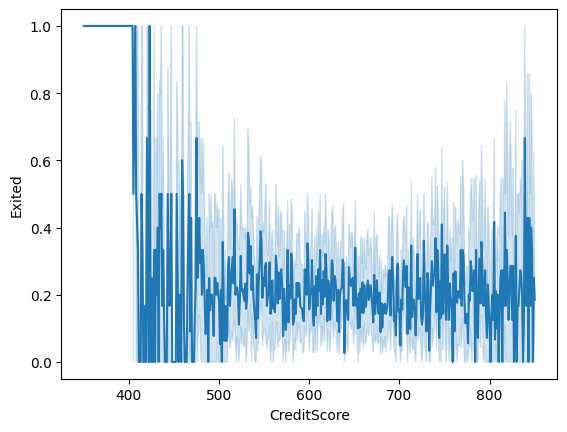

In [133]:
sns.lineplot(x="CreditScore", y="Exited", data=df1)

<Axes: xlabel='Balance', ylabel='Exited'>

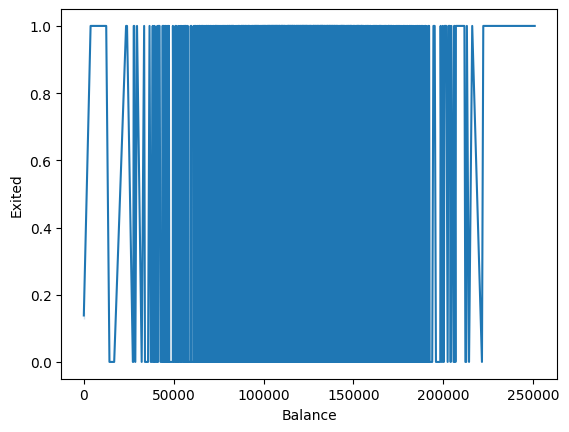

In [134]:
sns.lineplot(x="Balance", y="Exited", data=df1)

<Axes: xlabel='EstimatedSalary', ylabel='Exited'>

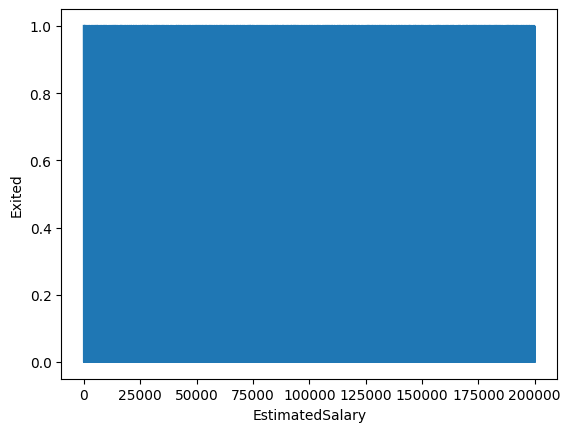

In [135]:
sns.lineplot(x="EstimatedSalary", y="Exited", data=df1)

***

<font color=orange>

# **25a. Return a Grouped table of the mean CreditScore by whether or not the customer Exited**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>Lower Mean Credit Score: </font> There is a lower mean credit score for customers who have exited.
    
<span style="color:darkblue">Exited Credit Score (mean): **645.35**
    
<span style="color:darkblue">Not Exited Credit Score (mean): **651.85**

In [137]:
# CALCULATING MEAN OF "CreditScore" GROUPED BY "Exited"
df1.groupby("Exited")["CreditScore"].mean().sort_values(ascending=False)


Exited
0   651.85
1   645.35
Name: CreditScore, dtype: float64

<font color=orange>

# **25b. Return a Grouped table of the mean Balance by whether or not the customer Exited**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Balance: </font> There is a higher mean bank balance for customers who have exited than for those who have not exited.
    
<span style="color:darkblue">Exited Balance (mean): **91,108.54**
    
<span style="color:darkblue">Not Exited Balance (mean): **72,745.30**

In [139]:
# CALCULATING MEAN OF "Balance" GROUPED BY "Exited"
df1.groupby("Exited")["Balance"].mean().sort_values(ascending=False)


Exited
1   91108.54
0   72745.30
Name: Balance, dtype: float64

<font color=orange>

# **25c. Return a Grouped table of the mean Estimated Salary by whether or not the customer Exited**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Salary: </font> There is a higher mean salary for customers who have exited the bank than for those who have not exited.
    
<span style="color:darkblue">Exited Salary (mean): **101,465.68**
    
<span style="color:darkblue">Not Exited Salary (mean): **99,738.39**

In [141]:
# CALCULATING MEAN OF "EstimatedSalary" GROUPED BY "Exited"
df1.groupby("Exited")["EstimatedSalary"].mean().sort_values(ascending=False)


Exited
1   101465.68
0    99738.39
Name: EstimatedSalary, dtype: float64

<font color=orange>

# **25d. Return a Grouped table of the mean Age by whether or not the customer Exited**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>Higher Mean Age: </font> There is a higher mean age for customers who have exited the bank than for those who have not exited.
    
<span style="color:darkblue">Exited Age (mean): **44.84**
    
<span style="color:darkblue">Not Exited Age (mean): **37.41**

In [143]:
# Grouping by 'Exited' and calculating mean for the 'Age' column
df1.groupby("Exited")["Age"].mean().sort_values(ascending=False)


Exited
1   44.84
0   37.41
Name: Age, dtype: float64

<font color=orange>

# **25e. Return a Grouped table of the mean CreditScore by the customer's Geography**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>SAME: </font>All geographies have roughly the same average credit scores (France is a bit lower)
    
<span style="color:darkblue">Germany Mean Credit Score (mean): **651.45**
    
<span style="color:darkblue">Spain Mean Credit Score (mean): **651.33**

<span style="color:darkblue">France Mean Credit Score (mean): **649.67**

In [145]:
# Group by 'Geography' and calculate the mean for 'CreditScore'
df1.groupby("Geography")["CreditScore"].mean().sort_values(ascending=False)


Geography
Germany   651.45
Spain     651.33
France    649.67
Name: CreditScore, dtype: float64

<font color=orange>

# **25f. Return a Grouped table of the mean Estimated Salary by the customer's Geography**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>Data: </font>No real meaningful information can be deciphered from this data
    
<span style="color:darkblue">Germany Salary (mean): **101,113.44**
    
<span style="color:darkblue">France Salary (mean): **99,899.18**

<span style="color:darkblue">Spain Salary (mean): **99,440.57**

In [147]:
# Group by 'Geography' and calculate the mean for 'EstimatedSalary'
df1.groupby("Geography")["EstimatedSalary"].mean().sort_values(ascending=False)


Geography
Germany   101113.44
France     99899.18
Spain      99440.57
Name: EstimatedSalary, dtype: float64

<font color=orange>

## **25g. Group data with respect to Germany and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 44.89

mean credit score = 647.69

mean balance = 120,361.08

mean tenure = 5.01

mean salary = 98,403.89</span>

* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span>

In [148]:
# 25g
df1[(df1["Geography"] == "Germany") & (df1["Exited"] == 1)].describe(
    include="all"
).T

count unique      top freq      mean      std      min  \
CreditScore     814.00    NaN      NaN  NaN    647.69   100.89   350.00   
Geography          814      1  Germany  814       NaN      NaN      NaN   
Gender             814      2   Female  448       NaN      NaN      NaN   
Age             814.00    NaN      NaN  NaN     44.89     9.56    19.00   
Tenure          814.00    NaN      NaN  NaN      5.01     2.98     0.00   
Balance         814.00    NaN      NaN  NaN 120361.08 19517.06 62389.03   
NumOfProducts   814.00    NaN      NaN  NaN      1.45     0.80     1.00   
HasCrCard       814.00    NaN      NaN  NaN      0.71     0.45     0.00   
IsActiveMember  814.00    NaN      NaN  NaN      0.36     0.48     0.00   
EstimatedSalary 814.00    NaN      NaN  NaN  98403.89 58815.39    11.58   
Exited          814.00    NaN      NaN  NaN      1.00     0.00     1.00   

                      25%       50%       75%       max  
CreditScore        579.25    646.00    724.75    850.00  
Geography             NaN       NaN       NaN       NaN  
Gender                NaN       NaN       NaN       NaN  
Age                 39.00     45.00     51.00     74.00  
Tenure               2.00      5.00      8.00     10.00  
Balance         107521.59 118951.22 132900.18 181461.48  
NumOfProducts        1.00      1.00      2.00      4.00  
HasCrCard            0.00      1.00      1.00      1.00  
IsActiveMember       0.00      0.00      1.00      1.00  
EstimatedSalary  47055.06  96498.14 148684.43 199808.10  
Exited               1.00      1.00      1.00      1.00

<font color=orange>

## **25h. Group data with respect to France and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 45.13

mean credit score = 641.91

mean balance = 71,192.80

mean tenure = 5.00

mean salary = 103,439.28</span>

* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span>

In [149]:
# 25h
df1[(df1["Geography"] == "France") & (df1["Exited"] == 1)].describe(
    include="all"
).T

count unique     top freq      mean      std    min      25%  \
CreditScore     810.00    NaN     NaN  NaN    641.91   100.15 350.00   570.00   
Geography          810      1  France  810       NaN      NaN    NaN      NaN   
Gender             810      2  Female  460       NaN      NaN    NaN      NaN   
Age             810.00    NaN     NaN  NaN     45.13     9.77  18.00    38.00   
Tenure          810.00    NaN     NaN  NaN      5.00     2.95   0.00     2.00   
Balance         810.00    NaN     NaN  NaN  71192.80 66894.12   0.00     0.00   
NumOfProducts   810.00    NaN     NaN  NaN      1.48     0.82   1.00     1.00   
HasCrCard       810.00    NaN     NaN  NaN      0.70     0.46   0.00     0.00   
IsActiveMember  810.00    NaN     NaN  NaN      0.37     0.48   0.00     0.00   
EstimatedSalary 810.00    NaN     NaN  NaN 103439.28 57497.15 123.07 55781.09   
Exited          810.00    NaN     NaN  NaN      1.00     0.00   1.00     1.00   

                      50%       75%       max  
CreditScore        643.50    710.00    850.00  
Geography             NaN       NaN       NaN  
Gender                NaN       NaN       NaN  
Age                 45.00     52.00     84.00  
Tenure               5.00      8.00     10.00  
Balance          80376.46 128995.29 238387.56  
NumOfProducts        1.00      2.00      4.00  
HasCrCard            1.00      1.00      1.00  
IsActiveMember       0.00      1.00      1.00  
EstimatedSalary 103739.24 154718.75 199378.58  
Exited               1.00      1.00      1.00

<font color=orange>

## **25i. Group data with respect to Spain and Exited (to build a customer profile)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Mean Age; Mean Credit Score; Mean Balance; Mean Tenure; Mean Salary:</font> <span style='color:darkblue'>

mean age = 44.15

mean credit score = 647.48

mean balance = 72,513.35

mean tenure = 4.66

mean salary = 103,629.55</span>

* <font color=#0e92ea>Top Demographic</font> <span style='color:darkblue'>

Top Gender= Female; </span>

In [150]:
# 25i
df1[(df1["Geography"] == "Spain") & (df1["Exited"] == 1)].describe(
    include="all"
).T

count unique     top freq      mean      std    min      25%  \
CreditScore     413.00    NaN     NaN  NaN    647.48    99.58 350.00   584.00   
Geography          413      1   Spain  413       NaN      NaN    NaN      NaN   
Gender             413      2  Female  231       NaN      NaN    NaN      NaN   
Age             413.00    NaN     NaN  NaN     44.15    10.13  18.00    37.00   
Tenure          413.00    NaN     NaN  NaN      4.66     2.81   0.00     2.00   
Balance         413.00    NaN     NaN  NaN  72513.35 66903.28   0.00     0.00   
NumOfProducts   413.00    NaN     NaN  NaN      1.51     0.78   1.00     1.00   
HasCrCard       413.00    NaN     NaN  NaN      0.67     0.47   0.00     0.00   
IsActiveMember  413.00    NaN     NaN  NaN      0.34     0.47   0.00     0.00   
EstimatedSalary 413.00    NaN     NaN  NaN 103629.55 56792.38 417.41 57338.56   
Exited          413.00    NaN     NaN  NaN      1.00     0.00   1.00     1.00   

                      50%       75%       max  
CreditScore        649.00    717.00    850.00  
Geography             NaN       NaN       NaN  
Gender                NaN       NaN       NaN  
Age                 44.00     51.00     71.00  
Tenure               5.00      7.00     10.00  
Balance          79035.95 127660.46 250898.09  
NumOfProducts        1.00      2.00      4.00  
HasCrCard            1.00      1.00      1.00  
IsActiveMember       0.00      1.00      1.00  
EstimatedSalary 108732.96 152567.75 199304.74  
Exited               1.00      1.00      1.00

<font color=orange>

## **25j. CUSTOMER PROFILE**</font>

###### **EXITED CUSTOMERS BY GEOGRAPHY  (mean values):**
    
GEOGRAPHY | GENDER | AGE | CREDIT SCORE | BALANCE | TENURE | SALARY
----------|--------|-----|--------------|---------|--------|-------
Germany   | Female |44.89|    647.69    | 120,361.08|5.01|98,403.89
France    | Female |45.13|    641.91    |  71,192.80|5.00|103,439.28
Spain     | Female |44.15|    647.48    |  72,513.35|4.66|103,629.55



***

<font color=orange>

# **26. PAUSE... Check the overall percentage of each target class in the dataset (Percentage of Exited vs. Percentage Not Exited)**</font>

 ###### **OBSERVATIONS:**
* <font color=orange>DATA IMBALANCE: </font>The dataset is 80/20, **NOT 98/2**, still, there is a data imbalance. After building and validating model, use a SMOTE oversampling/upsampling technique with this dataset.
    


In [151]:
# 26
(df1.Exited.value_counts())/(df1.Exited.count())

Exited
0   0.80
1   0.20
Name: count, dtype: float64

***

<font color=orange>

## **27. Bank Balance Losses Due To Exited Customers**</font>

###### **OBSERVATIONS:**
    
<span style='color:#0e92ea'>**$185,588,094.63** which equates to **24.3%** of combined total customer balances.</span>

In [152]:
print("*********Bank Balances Lost due to Exited Customers:************\n")
print("Total balances lost to exited customers")
print(df1.Balance[df1.Exited == 1].sum())
print('\n')
print("Mean balance per exited customer")
print(df1.Balance[df1.Exited == 1].mean())
print('\n')
print("Compare balance to non-exited customers:")
print('\n')
print("Total balances from non-exited customers")
print(df1.Balance[df1.Exited == 0].sum())
print('\n')
print("Mean balance per non-exited customer")
print(df1.Balance[df1.Exited == 0].mean())
print('\n')
print("Percentage of exited balances and percentage of non-exited balance (relative to combined total balances):")
print('Percent of Exited Balance to Total Balance:', df1.Balance[df1.Exited == 1].sum() / (df1.Balance[df1.Exited == 0].sum() + df1.Balance[df1.Exited == 1].sum()))
print('Percent of Non-Exited Balance to Total Balance:', df1.Balance[df1.Exited == 0].sum() / (df1.Balance[df1.Exited == 0].sum() + df1.Balance[df1.Exited == 1].sum()))

*********Bank Balances Lost due to Exited Customers:************

Total balances lost to exited customers
185588094.63


Mean balance per exited customer
91108.53933726068


Compare balance to non-exited customers:


Total balances from non-exited customers
579270798.25


Mean balance per non-exited customer
72745.2967788522


Percentage of exited balances and percentage of non-exited balance (relative to combined total balances):
Percent of Exited Balance to Total Balance: 0.24264357302715864
Percent of Non-Exited Balance to Total Balance: 0.7573564269728413


***

<font color=orange>

## **28. Copy Dataframe**</font>

###### **OBSERVATIONS:**
    
<span style='color:#0e92ea'>copy df1 prior to splitting and making models</span>

In [153]:
df2 = df1.copy()

***

<font color=orange>

## **28. Separate the data into Dependent and Independent Variables (Response Variable and Predictors)**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>X variables</font> <span style='color:darkblue'>Isolate all of the independent variables, **predictors**, which possess the data that will be used to make predictions. </span>
    
* <font color=#0e92ea>y variable</font> <span style='color:darkblue'>Isolate **Exited** as the y variable -- the target variable, the response variable -- that has the data which will be predicted. </span>

In [154]:
# 28
X = df2.drop(["Exited"], axis=1)
y = df2["Exited"]

***

<font color=orange>

## **29. Split the data into a TEST SET and a TEMPORARY SET**</font>

###### **OBSERVATIONS:**
* <font color=#0e92ea>TEST SET</font> <span style='color:darkblue'>The test set will be reserved away from the Deep Nural Network model as unseen data, until the model has sufficient performace scores such that the final model can be used to make predictions on the test set data.</span>
* <font color=#0e92ea>TEMPORARY SET</font> <span style='color:darkblue'>The temporary set will become a training set and a validation set</span>

In [155]:
# 29
# OBSERVATION: The temp set will become a train set and a validation set

# ====================================================================
# SPLITTING DATA INTO TEMPORARY TRAIN/TEST SETS USING train_test_split
# ====================================================================

# HEREIN, SPLIT THE FEATURE DATA (X) AND THE TARGET DATA (y)
# INTO A TEMPORARY TRAINING (X_temp, y_temp) SET AND A TEST (X_test, y_test) SET

# Python allows multiple variables to be declared in a single line separated by commas.
# This is called tuple unpacking. The train_test_split function returns four values,
# Assign these four values to four variables on the left-hand side of the equals sign.
# The variables on the left correspond to the result of splitting the data:
# - X_temp: temporary features for training
# - X_test: features for testing
# - y_temp: temporary target for training
# - y_test: target for testing

X_temp, X_test, y_temp, y_test = train_test_split(
    X,  # FEATURE DATA (INDEPENDENT VARIABLES)
    y,  # TARGET DATA (DEPENDENT VARIABLE)
    test_size=0.2,  # 20% OF DATA WILL BE USED FOR TEST SET
    random_state=1,  # RANDOM SEED FOR REPRODUCIBILITY
    stratify=y  # ENSURES TRAIN/TEST SETS HAVE SAME CLASS DISTRIBUTION AS y
)



***

<font color=orange>

## **30. Split the TEMPORARY SET into a TRAINING SET and a VALIDATION SET**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>TRAINING SET</font> <span style='color:darkblue'>The Deep Neural Network model will be built with the Training Set Data.</span>
* <font color=#0e92ea>VALIDATION SET</font> <span style='color:darkblue'>The Hyperparameters of the Deep Neural Network model will be fine-tuned with the Validation Set Data.</span>

In [156]:
# OBSERVATION: shape of each independent variable set is printed below
# OBSERVATION: shape of each target variable set is printed below

# ==================================================================
# SPLITTING TEMPORARY DATA AGAIN INTO FINAL TRAINING/VALIDATION SETS
# ==================================================================

# HEREIN, THE TEMPORARY TRAINING SET (X_temp, y_temp) IS SPLIT IT INTO:
# - FINAL TRAINING SET (X_train, y_train)
# - VALIDATION SET (X_val, y_val)

# USE MULTIPLE VARIABLES ON THE LEFT-HAND SIDE OF THE EQUAL SIGN
# UNPACK THE FOUR OUTPUTS RETURNED BY train_test_split.
# Python allows this because the function train_test_split returns a tuple,
# which can be directly assigned to the variables on the left-hand side.

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,  # TEMPORARY FEATURE SET FOR TRAINING
    y_temp,  # TEMPORARY TARGET SET FOR TRAINING
    test_size=0.25,  # 25% OF X_temp WILL BE USED FOR VALIDATION SET
    random_state=1,  # RANDOM SEED FOR REPRODUCIBILITY
    stratify=y_temp  # ENSURES TRAIN/VAL SETS HAVE SAME CLASS DISTRIBUTION AS y_temp
)

# ==========================================================
# PRINTING THE SHAPE OF EACH TRAIN, VALIDATION, AND TEST SET
# EXPECT THESE PRINT STATEMENTS TO SHOW HOW DATA IS SPLIT
# INTO TRAINING, VALIDATION, AND TEST SETS.
# ==========================================================

# X_train.shape RETURNS THE DIMENSIONS OF THE FINAL TRAINING FEATURES
# X_val.shape RETURNS THE DIMENSIONS OF THE VALIDATION FEATURES
# X_test.shape RETURNS THE DIMENSIONS OF THE TEST FEATURES
# y_train.shape RETURNS THE DIMENSIONS OF THE FINAL TRAINING TARGET
# y_val.shape RETURNS THE DIMENSIONS OF THE VALIDATION TARGET
# y_test.shape RETURNS THE DIMENSIONS OF THE TEST TARGET


print(
    "X_train shape:",  # PRINT LABEL FOR TRAINING FEATURE SET SHAPE
    X_train.shape,  # PRINT TRAINING FEATURE SET SHAPE
    "X_val shape:",  # PRINT LABEL FOR VALIDATION FEATURE SET SHAPE
    X_val.shape,  # PRINT VALIDATION FEATURE SET SHAPE
    "X_test shape:",  # PRINT LABEL FOR TEST FEATURE SET SHAPE
    X_test.shape  # PRINT TEST FEATURE SET SHAPE
)

# PRINT NEWLINE TO SEPARATE OUTPUTS
print("\n")

print(
    "y_train shape:",  # PRINT LABEL FOR TRAINING TARGET SET SHAPE
    y_train.shape,  # PRINT TRAINING TARGET SET SHAPE
    "y_val shape:",  # PRINT LABEL FOR VALIDATION TARGET SET SHAPE
    y_val.shape,  # PRINT VALIDATION TARGET SET SHAPE
    "y_test shape:",  # PRINT LABEL FOR TEST TARGET SET SHAPE
    y_test.shape  # PRINT TEST TARGET SET SHAPE
)

X_train shape: (6000, 10) X_val shape: (2000, 10) X_test shape: (2000, 10)


y_train shape: (6000,) y_val shape: (2000,) y_test shape: (2000,)


***

<font color=orange>

## **31. Check the Percentages of the split data**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>TRAINING SET:</font> <span style='color:darkblue'>6000 data objects; 60% of dataset</span>
    
* <font color=#0e92ea>VALIDATION SET:</font> <span style='color:darkblue'>2000 data objects; 20% of dataset</span>

* <font color=#0e92ea>TESTING SET:</font> <span style='color:darkblue'>2000 data objects; 20% of dataset</span>

In [157]:
# Check the percentage of the split data

print("{0:0.2f}% data is in training set".format((len(X_train) / len(df1.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val) / len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test) / len(df1.index)) * 100))

60.00% data is in training set
20.00% data is in validation set
20.00% data is in test set


***

<font color=orange>

## **32. Standardize Training Data**</font>

<font color=orange>

## **32. Dummy Coding Training Data: One Hot Encoding**</font>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [158]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
# ==========================================================
# IMPORT THE StandardScaler CLASS FROM sklearn.preprocessing
# ==========================================================
from sklearn.preprocessing import StandardScaler

# ===========================================================================================
# STANDARDIZE THE 'EstimatedSalary' COLUMN IN X_train BY SCALING IT TO A RANGE OF -1 TO +1
# StandardScaler() STANDARDIZES THE DATA TO HAVE A MEAN OF 0 AND A STANDARD DEVIATION OF 1
# fit_transform() FITS THE SCALER TO THE DATA AND THEN TRANSFORMS IT
# .values.reshape(-1, 1) CONVERTS THE COLUMN INTO A 2D ARRAY (REQUIRED FOR THE SCALER)
# THE RESULTING SCALED VALUES ARE STORED IN A NEW COLUMN 'NormalizedSalary'
# ===========================================================================================
X_train['NormalizedSalary'] = StandardScaler().fit_transform(X_train['EstimatedSalary'].values.reshape(-1,1))

# ============================================================================================
# REPEAT THE STANDARDIZATION PROCESS FOR THE 'Balance' COLUMN AND STORE IN 'NormalizedBalance'
# ============================================================================================
X_train['NormalizedBalance'] = StandardScaler().fit_transform(X_train['Balance'].values.reshape(-1,1))

# ========================================================================================
# REPEAT THE STANDARDIZATION PROCESS FOR THE 'Age' COLUMN AND STORE IN 'NormalizedAge'
# ========================================================================================
X_train['NormalizedAge'] = StandardScaler().fit_transform(X_train['Age'].values.reshape(-1,1))

# ===============================================================================================
# REPEAT THE STANDARDIZATION PROCESS FOR THE 'CreditScore' COLUMN AND STORE IN 'NormalizedCreditScore'
# ===============================================================================================
X_train['NormalizedCreditScore'] = StandardScaler().fit_transform(X_train['CreditScore'].values.reshape(-1,1))

# ========================================================================================
# REPEAT THE STANDARDIZATION PROCESS FOR THE 'Tenure' COLUMN AND STORE IN 'NormalizedTenure'
# ========================================================================================
X_train['NormalizedTenure'] = StandardScaler().fit_transform(X_train['Tenure'].values.reshape(-1,1))

# ===============================================================================================
# REPEAT THE STANDARDIZATION PROCESS FOR THE 'NumOfProducts' COLUMN AND STORE IN 'NormalizedNumOfProducts'
# ===============================================================================================
X_train['NormalizedNumOfProducts'] = StandardScaler().fit_transform(X_train['NumOfProducts'].values.reshape(-1,1))


In [159]:
X_train = X_train.drop(['EstimatedSalary'],axis=1)
X_train = X_train.drop(['Balance'],axis=1)
X_train = X_train.drop(['Age'],axis=1)
X_train = X_train.drop(['CreditScore'],axis=1)
X_train = X_train.drop(['Tenure'],axis=1)
X_train = X_train.drop(['NumOfProducts'],axis=1)

In [160]:
# 32

# List of columns to create a dummy variables
# ==============================================================================
# DEFINE A LIST OF CATEGORICAL COLUMNS THAT NEED TO BE ENCODED
# 'Gender' AND 'Geography' ARE CATEGORICAL FEATURES THAT REQUIRE DUMMY VARIABLES
# ==============================================================================
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
# ===================================================================================================
# CONVERT THE CATEGORICAL COLUMNS INTO DUMMY VARIABLES (ONE-HOT ENCODING)
# pd.get_dummies() CONVERTS CATEGORICAL VARIABLES INTO A SERIES OF BINARY (0/1) COLUMNS
# columns=col_dummy SPECIFIES WHICH COLUMNS NEED TO BE CONVERTED INTO DUMMIES
# drop_first=True AVOIDS THE DUMMY VARIABLE TRAP BY DROPPING THE FIRST CATEGORY IN EACH FEATURE
# THIS REDUCES MULTICOLLINEARITY, ALLOWING THE MODEL TO BE MORE EFFICIENT WITHOUT LOSING INFORMATION
# ==================================================================================================
X_train = pd.get_dummies(X_train, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **33. Standardize Validation Data**</font>

<font color=orange>

## **33. Dummy Coding Validing Data: One Hot Encoding**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [161]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
from sklearn.preprocessing import StandardScaler

X_val['NormalizedSalary'] = StandardScaler().fit_transform(X_val['EstimatedSalary'].values.reshape(-1,1))


X_val['NormalizedBalance'] = StandardScaler().fit_transform(X_val['Balance'].values.reshape(-1,1))


X_val['NormalizedAge'] = StandardScaler().fit_transform(X_val['Age'].values.reshape(-1,1))


X_val['NormalizedCreditScore'] = StandardScaler().fit_transform(X_val['CreditScore'].values.reshape(-1,1))


X_val['NormalizedTenure'] = StandardScaler().fit_transform(X_val['Tenure'].values.reshape(-1,1))


X_val['NormalizedNumOfProdcuts'] = StandardScaler().fit_transform(X_val['NumOfProducts'].values.reshape(-1,1))


In [162]:
X_val = X_val.drop(['EstimatedSalary'],axis=1)
X_val = X_val.drop(['Balance'],axis=1)
X_val = X_val.drop(['Age'],axis=1)
X_val = X_val.drop(['CreditScore'],axis=1)
X_val = X_val.drop(['Tenure'],axis=1)
X_val = X_val.drop(['NumOfProducts'],axis=1)

In [163]:
# 33

# List of columns to create a dummy variables
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
X_val = pd.get_dummies(X_val, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **34. Standardize Testing Data**</font>

<font color=orange>

## **34. Dummy Coding Validating Data: One Hot Encoding**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Estimated Salary</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Balance</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Age</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Credit Score</font> <span style='color:darkblue'>z-transformation</span>

* <font color=#0e92ea>Tenure</font> <span style='color:darkblue'>z-transformation</span>
    
* <font color=#0e92ea>Number of Products</font> <span style='color:darkblue'>z-transformation</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>One Hot Encoding:</font> <span style='color:darkblue'>Gender, Geography, Tenure, Number of Products</span>
    
* <font color=#0e92ea>Shape Attribute:</font> <span style='color:darkblue'>one hot encoding expanded the shape of the dataset to _xx_ columns</span>

In [164]:
#Standardizing. Normalize numeric data into a -1 to +1 range of values.
from sklearn.preprocessing import StandardScaler

X_test['NormalizedSalary'] = StandardScaler().fit_transform(X_test['EstimatedSalary'].values.reshape(-1,1))


X_test['NormalizedBalance'] = StandardScaler().fit_transform(X_test['Balance'].values.reshape(-1,1))


X_test['NormalizedAge'] = StandardScaler().fit_transform(X_test['Age'].values.reshape(-1,1))


X_test['NormalizedCreditScore'] = StandardScaler().fit_transform(X_test['CreditScore'].values.reshape(-1,1))


X_test['NormalizedTenure'] = StandardScaler().fit_transform(X_test['Tenure'].values.reshape(-1,1))


X_test['NormalizedNumOfProducts'] = StandardScaler().fit_transform(X_test['NumOfProducts'].values.reshape(-1,1))


In [165]:
X_test = X_test.drop(['EstimatedSalary'],axis=1)
X_test = X_test.drop(['Balance'],axis=1)
X_test = X_test.drop(['Age'],axis=1)
X_test = X_test.drop(['CreditScore'],axis=1)
X_test = X_test.drop(['Tenure'],axis=1)
X_test = X_test.drop(['NumOfProducts'],axis=1)

In [166]:
# 34

# List of columns to create a dummy variables
col_dummy = [
    "Gender",
    "Geography"
]

# Encoding categorical varaibles
X_test = pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

***

<font color=orange>

## **35. Shape of the three (3) datasets**</font>


In [167]:
print('X-train shape:', X_train.shape)
print('\n')
print('y-train shape:', y_train.shape)
print('\n')
print('X-validation shape:', X_val.shape)
print('\n')
print('y-validation shape:', y_val.shape)
print('\n')
print('X-test shape:', X_test.shape)
print('\n')
print('y-test shape:', y_test.shape)
print('\n')

X-train shape: (6000, 11)


y-train shape: (6000,)


X-validation shape: (2000, 11)


y-validation shape: (2000,)


X-test shape: (2000, 11)


y-test shape: (2000,)




***


<font color=orange>

## **36. Building the Models**</font>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Model Evaluation</font> <span style='color:darkblue'>

**False Positive:** The model might predict that a customer Exited when, in fact, the customer did not Exit.

**False Negative:** The model could predict that a customer has not Exited when, in fact, the customer did Exit.</span>
    
* <font color=#0e92ea>MOST IMPORTANT PREDICTION</font> <span style='color:darkblue'>It is more important to have a model that predicts that a customer will not "exit" when, in fact, the customer exited (because it is important to **not** lose a customer or potential income; **Reduction of the false negatives is paramount**).  </span>
    
* <font color=#0e92ea>False Negative</font> <span style='color:darkblue'>The model could  make a wrong prediction that would identify customers who it predicts will not "attrite" but who actually do add to the banks attrition rate; this would result in a loss of opportunity.  </span>

* <font color=#0e92ea>RECALL</font> <span style='color:darkblue'>The model's Recall score should be maximized; the greater the Recall... the less chance of predicting false negatives.  </span>

In [168]:
# =========================================================================
# DEFINE A FUNCTION TO COMPUTE METRICS FOR CLASSIFICATION MODEL PERFORMANCE
# =========================================================================
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier (trained classification model)
    predictors: independent variables (features used for prediction)
    target: dependent variable (actual labels/true values)
    """

    # ========================================================================
    # PREDICT USING THE INDEPENDENT VARIABLES PROVIDED (predictors)
    # model.predict(predictors) RETURNS THE PREDICTED LABELS FOR EACH INSTANCE
    # ========================================================================
    pred = model.predict(predictors)

    # =================================================================
    # CALCULATE ACCURACY SCORE
    # ACCURACY IS THE RATIO OF CORRECT PREDICTIONS TO TOTAL PREDICTIONS
    # =================================================================
    acc = accuracy_score(target, pred)

    # =====================================================================
    # CALCULATE RECALL SCORE
    # RECALL IS THE ABILITY OF THE MODEL TO IDENTIFY ALL RELEVANT INSTANCES
    # =====================================================================
    recall = recall_score(target, pred)

    # ===================================================================================
    # CALCULATE PRECISION SCORE
    # PRECISION MEASURES THE PROPORTION OF POSITIVE PREDICTIONS THAT ARE ACTUALLY CORRECT
    # ===================================================================================
    precision = precision_score(target, pred)

    # =====================================================
    # CALCULATE F1 SCORE
    # F1 SCORE IS THE HARMONIC MEAN OF PRECISION AND RECALL
    # PROVIDES A BALANCE BETWEEN PRECISION AND RECALL
    # =====================================================
    f1 = f1_score(target, pred)

    # =======================================================================================
    # CREATE A DATAFRAME THAT HOLDS THE PERFORMANCE METRICS (ACCURACY, RECALL, PRECISION, F1)
    # pd.DataFrame IS USED TO STRUCTURE THE METRICS INTO A TABLE FORMAT FOR EASY VIEWING
    # =======================================================================================
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],  # SINGLE-ROW DATAFRAME
    )

    # ========================================
    # RETURN THE PERFORMANCE METRICS DATAFRAME
    # ========================================
    return df_perf


In [169]:
# =============================================================
# DEFINE A FUNCTION TO PLOT A CONFUSION MATRIX USING A SEABORN HEATMAP
# =============================================================
def plot_confusion_matrix(cf,
                          labels=None,            # LABELS FOR EACH GROUP IN THE CONFUSION MATRIX
                          categories='auto',      # LABELS FOR X AND Y TICKS (DEFAULT IS AUTO)
                          show_counts=True,       # WHETHER TO DISPLAY RAW COUNTS IN THE MATRIX
                          show_percent=True,      # WHETHER TO DISPLAY PERCENTAGES IN THE MATRIX
                          cbar=True,              # WHETHER TO SHOW A COLOR BAR ON THE HEATMAP
                          figsize=(6, 4),         # SIZE OF THE PLOT (WIDTH, HEIGHT)
                          cmap='Blues',           # COLOR MAP FOR THE HEATMAP (DEFAULT IS BLUES)
                          title=None):            # TITLE FOR THE PLOT (OPTIONAL)

    # =======================================================
    # CREATE BLANK LABELS FOR CELLS IF LABELS ARE NOT PROVIDED
    # =======================================================
    blanks = ['' for _ in range(cf.size)]  # EMPTY STRINGS FOR EACH CELL IN THE MATRIX

    # ===========================================================
    # IF LABELS ARE PROVIDED AND MATCH THE SIZE OF THE MATRIX, USE THEM
    # OTHERWISE, USE BLANK LABELS
    # ===========================================================
    if labels and len(labels) == cf.size:
        group_labels = ["{}\n".format(value) for value in labels]  # ADDING LABELS
    else:
        group_labels = blanks  # USE BLANKS IF NO LABELS MATCH

    # ==========================================================
    # IF `show_counts` IS TRUE, DISPLAY RAW COUNTS IN EACH CELL
    # OTHERWISE, USE BLANKS FOR THE COUNT VALUES
    # ==========================================================
    if show_counts:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]  # DISPLAY RAW COUNTS
    else:
        group_counts = blanks  # USE BLANKS IF COUNTS ARE NOT SHOWN

    # ==========================================================
    # IF `show_percent` IS TRUE, DISPLAY PERCENTAGE VALUES IN CELLS
    # OTHERWISE, USE BLANKS FOR THE PERCENTAGE VALUES
    # ==========================================================
    if show_percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)]  # PERCENTAGES
    else:
        group_percentages = blanks  # USE BLANKS IF PERCENTAGES ARE NOT SHOWN

    # ============================================================
    # COMBINE GROUP LABELS, COUNTS, AND PERCENTAGES INTO A SINGLE STRING
    # EACH CELL WILL DISPLAY ALL THREE COMPONENTS
    # ============================================================
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]

    # ===========================================================
    # CONVERT THE COMBINED LABELS INTO A NUMPY ARRAY AND RESHAPE
    # TO MATCH THE SHAPE OF THE CONFUSION MATRIX (ROWS, COLUMNS)
    # ===========================================================
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # =====================================
    # SET UP THE PLOT FIGURE WITH SPECIFIED SIZE
    # =====================================
    plt.figure(figsize=figsize)

    # ===========================================================
    # USE SEABORN TO PLOT THE CONFUSION MATRIX AS A HEATMAP
    # ANNOTATE THE CELLS WITH BOX LABELS (COUNTS, PERCENTAGES)
    # ===========================================================
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    # ====================================
    # ADD LABELS TO THE X AND Y AXES
    # ====================================
    plt.ylabel('True label')  # LABEL FOR Y-AXIS (ACTUAL CLASS)
    plt.xlabel('Predicted label')  # LABEL FOR X-AXIS (PREDICTED CLASS)

    # ==========================================
    # IF A TITLE IS PROVIDED, SET IT FOR THE PLOT
    # ==========================================
    if title:
        plt.title(title)  # SET THE PLOT TITLE


In [170]:
# ===============================================================
# DEFINE A FUNCTION TO PLOT THE CONFUSION MATRIX WITH PERCENTAGES
# ===============================================================
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier (trained classification model)
    predictors: independent variables (features used for prediction)
    target: dependent variable (actual labels/true values)
    """

    # ===================================================================
    # PREDICT USING THE MODEL WITH THE INDEPENDENT VARIABLES (predictors)
    # y_pred CONTAINS THE PREDICTED LABELS FOR EACH INSTANCE
    # ===================================================================
    y_pred = model.predict(predictors)

    # ===========================================================================================
    # CREATE THE CONFUSION MATRIX USING THE ACTUAL (target) AND PREDICTED (y_pred) LABELS
    # CONFUSION MATRIX SHOWS TRUE POSITIVES, TRUE NEGATIVES, FALSE POSITIVES, AND FALSE NEGATIVES
    # ===========================================================================================
    cm = confusion_matrix(target, y_pred)

    # ===================================================================================
    # CREATE LABELS TO DISPLAY COUNT AND PERCENTAGE FOR EACH CELL IN THE CONFUSION MATRIX
    # USE FORMATTERS TO DISPLAY INTEGER COUNTS AND PERCENTAGES
    # np.asarray() CONVERTS THE LIST OF FORMATTED STRINGS INTO A NUMPY ARRAY
    # reshape(2, 2) ENSURES THE MATRIX SHAPE IS 2x2 (BINARY CLASSIFICATION)
    # ===================================================================================
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # ====================================================================
    # PLOT THE CONFUSION MATRIX USING A HEATMAP FROM SEABORN (sns.heatmap)
    # THE ANNOT PARAMETER DISPLAYS THE FORMATTED LABELS
    # ====================================================================
    plt.figure(figsize=(6, 4))  # SETS THE SIZE OF THE PLOT
    sns.heatmap(cm, annot=labels, fmt="")  # PLOTS THE CONFUSION MATRIX WITH ANNOTATIONS

    # ================================================================
    # SET LABELS FOR THE Y AND X AXES (TRUE LABEL AND PREDICTED LABEL)
    # ================================================================
    plt.ylabel("True label")  # Y-AXIS LABEL (ACTUAL CLASS LABELS)
    plt.xlabel("Predicted label")  # X-AXIS LABEL (PREDICTED CLASS LABELS)


In [171]:
# ====================================================================
# DEFINE A FUNCTION TO PLOT A CONFUSION MATRIX USING A SEABORN HEATMAP
# ====================================================================
def make_confusion_matrix(cf,                          # CONFUSION MATRIX GENERATED FROM SKLEARN
                          group_names=None,            # CUSTOM LABELS FOR THE GROUPS (OPTIONAL)
                          categories='auto',           # LABELS FOR X AND Y TICKS (DEFAULT TO AUTO)
                          count=True,                  # WHETHER TO SHOW RAW COUNTS
                          percent=True,                # WHETHER TO SHOW PERCENTAGES
                          cbar=True,                   # WHETHER TO SHOW THE COLOR BAR
                          xyticks=True,                # WHETHER TO SHOW TICKS ON X AND Y AXES
                          xyplotlabels=True,           # WHETHER TO LABEL X AND Y AXES
                          sum_stats=True,              # WHETHER TO SHOW STATS LIKE PRECISION, RECALL, ETC.
                          figsize=None,                # FIGURE SIZE (OPTIONAL)
                          cmap='Blues',                # COLOR MAP (DEFAULT TO BLUES)
                          title=None):                 # TITLE FOR THE PLOT (OPTIONAL)
    '''
    THIS FUNCTION MAKES A VISUALIZATION OF A CONFUSION MATRIX USING SEABORN'S HEATMAP FUNCTION.
    '''

    # =====================================================================
    # GENERATE BLANK LABELS FOR EACH SQUARE IN CASE LABELS ARE NOT PROVIDED
    # =====================================================================
    blanks = ['' for i in range(cf.size)]

    # ================================================================
    # IF GROUP NAMES ARE PROVIDED AND MATCH THE CONFUSION MATRIX SIZE,
    # USE THEM; OTHERWISE, USE BLANKS.
    # ================================================================
    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    # =============================================================
    # GENERATE COUNTS AND PERCENTAGES FOR EACH SQUARE IN THE MATRIX
    # IF `count` AND `percent` ARGUMENTS ARE TRUE
    # =============================================================
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)]
    else:
        group_percentages = blanks

    # =====================================================================
    # COMBINE LABELS (GROUP NAMES, COUNTS, PERCENTAGES) INTO A SINGLE LABEL
    # =====================================================================
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # ================================================================
    # IF `sum_stats` IS TRUE, CALCULATE ACCURACY AND IF BINARY MATRIX,
    # CALCULATE PRECISION, RECALL, AND F1 SCORE
    # ================================================================
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))  # DIAGONAL SUM DIVIDED BY TOTAL SUM FOR ACCURACY
        if len(cf) == 2:  # ONLY FOR BINARY CLASSIFICATION
            precision = cf[1, 1] / sum(cf[:, 1])  # PRECISION
            recall = cf[1, 1] / sum(cf[1, :])     # RECALL
            f1_score = 2 * precision * recall / (precision + recall)  # F1 SCORE
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # ===================================
    # SET THE FIGURE SIZE IF NOT PROVIDED
    # ===================================
    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')

    # =====================================================
    # IF `xyticks` IS FALSE, DISABLE CATEGORIES ON THE AXES
    # =====================================================
    if xyticks == False:
        categories = False

    # ============================================================
    # GENERATE THE HEATMAP PLOT USING SEABORN'S `heatmap()` FUNCTION
    # ============================================================
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    # =================================================
    # SET X AND Y AXIS LABELS IF `xyplotlabels` IS TRUE
    # =================================================
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    # =========================
    # SET THE TITLE IF PROVIDED
    # =========================
    if title:
        plt.title(title)


***

<font color=orange>

## **37. Random Forest**</font>

* <font color=#0e92ea>GridSearchCV:</font> <span style='color:darkblue'></span>
    
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Time Wall:</font> <span style='color:darkblue'>Random Forest algorithm with the GridSearchCV took over 1 hour to run.</span>
    
* <font color=#0e92ea>Recall Scores:</font> <span style='color:darkblue'>Training Set: 0.73; Validation Set: 0.51 </span>
    
* <font color=#0e92ea>Type II Error:</font> <span style='color:darkblue'>10.05% </span>

In [172]:
# ============================================================================
# IMPORTING THE 'time' MODULE TO TRACK EXECUTION TIME
# ============================================================================
import time

# ============================================================================
# COMMENTED OUT TO AVOID LONG RUN TIME ON GOOGLE COLAB, TAKES OVER AN HOUR TO EXECUTE
# GOOGLE COLAB DISCONNECTS AND REQUIRES RE-RUNNING ALL CELLS UPON EACH RECONNECTION
# ============================================================================

# ============================================================================
# IMPORTING THE RandomForestClassifier FROM SCIKIT-LEARN'S ENSEMBLE MODULE
# ============================================================================
from sklearn.ensemble import RandomForestClassifier

# ============================================================================
# DEFINING THE RANDOM FOREST MODEL WITH A FIXED RANDOM SEED FOR REPRODUCIBILITY
# random_state IS USED TO CONTROL THE RANDOMNESS OF THE MODEL'S BEHAVIOR
# ============================================================================
model = RandomForestClassifier(random_state=1)

# ============================================================================
# DEFINING A PARAMETER GRID FOR THE GRID SEARCH CROSS-VALIDATION (GridSearchCV)
# max_depth: TREE DEPTHS RANGE FROM 5 TO 30, WITH AN ADDITIONAL OPTION OF NO LIMIT
# max_features: MAX FEATURES ARE EITHER SQUARE ROOT, LOG2, OR NO LIMIT
# min_samples_leaf: MINIMUM SAMPLES IN LEAVES RANGES FROM 1 TO 15
# min_samples_split: MINIMUM SAMPLES TO SPLIT A NODE RANGES FROM 2 TO 20
# n_estimators: NUMBER OF TREES RANGES FROM 10 TO 100, IN INCREMENTS OF 10
# ============================================================================
parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}

# ============================================================================
# DEFINING A SCORING FUNCTION THAT WILL USE RECALL AS THE PERFORMANCE METRIC
# THE RECALL_SCORE WILL BE USED TO FIND THE BEST PARAMETER COMBINATION
# metrics.make_scorer CONVERTS THE RECALL FUNCTION INTO A SCORING OBJECT
# ============================================================================
scorer = metrics.make_scorer(metrics.recall_score)

# ============================================================================
# INITIALIZING GridSearchCV TO PERFORM A GRID SEARCH ON THE PARAMETERS
# scoring: THE PERFORMANCE METRIC USED TO EVALUATE THE MODELS (RECALL)
# cv: CROSS-VALIDATION FOLDS (5-FOLD CROSS-VALIDATION)
# n_jobs: -1 UTILIZES ALL CPU CORES TO SPEED UP PROCESSING
# ============================================================================
grid_cv = GridSearchCV(model, parameters, scoring="recall", cv=5, n_jobs=-1)

# ============================================================================
# START TIMER TO TRACK HOW LONG THE GRID SEARCH TAKES
# ============================================================================
start_time = time.time()  # Start time

# ============================================================================
# FITTING THE GRID SEARCH ON THE TRAINING DATA, X_train AND y_train
# THE GRID SEARCH WILL TRY ALL COMBINATIONS OF PARAMETERS TO FIND THE BEST ONE
# ============================================================================
grid_cv.fit(X_train, y_train)

# ============================================================================
# END TIMER AND PRINT TIME TAKEN
# ============================================================================
end_time = time.time()  # End time
elapsed_time = end_time - start_time  # Calculate elapsed time

# ============================================================================
# PRINT ELAPSED TIME IN MINUTES
# ============================================================================
print("Time taken: {:.2f} minutes".format(elapsed_time / 60))

# ============================================================================
# PRINTING OUT THE BEST PARAMETERS AND BEST RECALL SCORE OBTAINED
# grid_cv.best_params_ RETURNS THE PARAMETERS THAT PERFORMED BEST
# grid_cv.best_score_ RETURNS THE BEST RECALL SCORE ACHIEVED DURING THE SEARCH
# ============================================================================
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))


Time taken: 12.05 minutes
Best Parameters:{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 10} 
Score: 0.5253362328537973


In [173]:
# ========================================================================================
# CREATING A RANDOM FOREST CLASSIFIER USING THE BEST PARAMETERS FOUND
# random_state: CONTROLS RANDOMNESS FOR REPRODUCIBILITY
# n_estimators: THE NUMBER OF TREES IN THE RANDOM FOREST (SET TO 10)
# max_depth: MAXIMUM DEPTH OF EACH TREE (SET TO 20 TO LIMIT OVERFITTING)
# max_features: THE NUMBER OF FEATURES TO CONSIDER AT EACH SPLIT (None MEANS ALL FEATURES)
# min_samples_leaf: MINIMUM NUMBER OF SAMPLES REQUIRED TO BE IN A LEAF NODE (SET TO 1)
# min_samples_split: MINIMUM NUMBER OF SAMPLES REQUIRED TO SPLIT A NODE (SET TO 12)
# =========================================================================================
rf_tuned = RandomForestClassifier(
    random_state=1,               # ENSURE RESULTS ARE REPRODUCIBLE
    n_estimators=10,               # USE 10 TREES IN THE FOREST
    max_depth=20,                  # LIMIT TREE DEPTH TO PREVENT OVERFITTING
    max_features=None,             # CONSIDER ALL FEATURES FOR SPLITTING NODES
    min_samples_leaf=1,            # ALLOW LEAVES WITH A MINIMUM OF 1 SAMPLE
    min_samples_split=12           # REQUIRE AT LEAST 12 SAMPLES TO SPLIT A NODE
)

# =====================================================================================
# TRAINING THE RANDOM FOREST MODEL ON THE TRAINING DATA (X_train, y_train)
# THE MODEL WILL LEARN THE RELATIONSHIP BETWEEN FEATURES (X_train) AND TARGET (y_train)
# =====================================================================================
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=12,
                       n_estimators=10, random_state=1)

In [174]:
# =========================================================================================================
# CALCULATING PERFORMANCE METRICS ON THE TRAINING SET USING A CUSTOM FUNCTION (model_performance_classification_sklearn)
# rf_tuned: TRAINED RANDOM FOREST MODEL
# X_train: THE TRAINING INPUT DATA (FEATURES)
# y_train: THE TRAINING TARGET DATA (LABELS)
# =========================================================================================================
rf_random_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)

# ================================================================
# PRINTING THE PERFORMANCE METRICS OF THE MODEL ON THE TRAINING SET
# ================================================================
print("Training performance:")
rf_random_train


Training performance:


Accuracy  Recall  Precision   F1
0      0.93    0.73       0.92 0.81

In [176]:
# Correcting the typo in the validation dataset column name
X_val = X_val.rename(columns={"NormalizedNumOfProdcuts": "NormalizedNumOfProducts"})

# Re-running the evaluation on the validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
print(rf_random_val)


Validation performance:
   Accuracy  Recall  Precision   F1
0      0.85    0.51       0.67 0.58


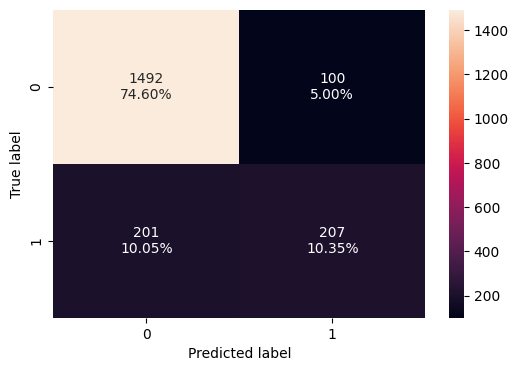

In [177]:

confusion_matrix_sklearn(rf_tuned, X_val, y_val)

Precision: 0.674
Recall: 0.507
F1 Score: 0.579


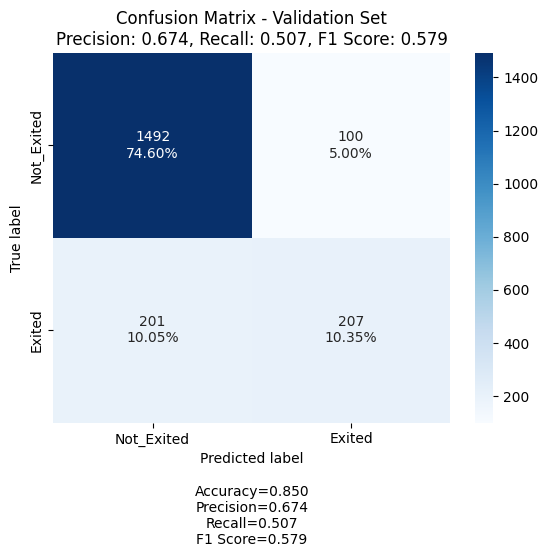

In [183]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED RANDOM FOREST MODEL (rf_tuned)
# ============================================================
y_pred = rf_tuned.predict(X_val)

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_val) AND PREDICTIONS (y_pred)
# ============================================================
cf_matrix = confusion_matrix(y_val, y_pred)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT
# ============================================================
make_confusion_matrix(cf_matrix,
                      group_names=None,
                      categories=['Not_Exited', 'Exited'],
                      cmap='Blues',
                      title=f"Confusion Matrix - Validation Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


Precision: 0.674
Recall: 0.507
F1 Score: 0.579


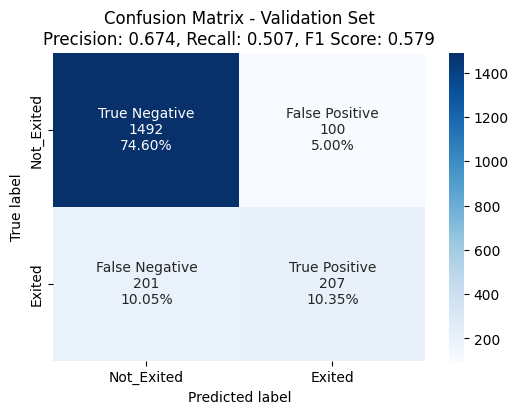

In [186]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED RANDOM FOREST MODEL (rf_tuned)
# ============================================================
y_pred = rf_tuned.predict(X_val)

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_val) AND PREDICTIONS (y_pred)
# ============================================================
cf_matrix = confusion_matrix(y_val, y_pred)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT WITH LABELS
# ============================================================
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']  # CUSTOM LABELS FOR THE CELLS
categories = ['Not_Exited', 'Exited']  # CLASS LABELS
plot_confusion_matrix(cf_matrix,
                      labels=labels,
                      categories=categories,
                      cmap='Blues',
                      title=f"Confusion Matrix - Validation Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


***

<font color=orange>

## **38. Deep Neural Network -- Model "A"**</font>

* <font color=#0e92ea>Model A:</font> <span style='color:darkblue'>a simple neural network made of five (5) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>A dropout step has been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>


<font color=orange>

## **38a. Creating Model "A"**</font>

* <font color=#0e92ea>Model "A":</font> <span style='color:darkblue'>Sequential()</span>
    
* <font color=#0e92ea>Sequential Class:</font> <span style='color:darkblue'>Keras' Sequential class starts as an empty object.</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Layers:</font> <span style='color:darkblue'>Neural Network layers are added in the next step, 38b, not this one.</span>

In [188]:
# ==================================================================================================
# INITIALIZE A SEQUENTIAL NEURAL NETWORK MODEL CALLED 'model_a'
# Sequential: THIS CLASS ALLOWS THE NEURAL NETWORK TO BE BUILT LAYER BY LAYER IN A STACKED FASHION
# 'name="model_a"': ASSIGNS A NAME TO THE MODEL FOR EASY REFERENCE
# ==================================================================================================
model_a = Sequential(name="model_a")


<font color=orange>

## **38b. Add Neural Network Layers and Activation Functions**</font>

* <font color=#0e92ea>Model A:</font> <span style='color:darkblue'>a simple neural network made of five (5) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>A dropout step has been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Compilation:</font> <span style='color:darkblue'>Neural Network compilation occurs in the next step,  38c, not this one.</span>

In [189]:
# ==================================================================================================
# ADD AN INPUT LAYER TO THE MODEL
# Dense: FULLY CONNECTED LAYER; CONNECTS ALL NEURONS FROM THE PREVIOUS LAYER TO THIS ONE
# 'units=16': NUMBER OF NEURONS IN THIS LAYER
# 'input_dim=11': INPUT FEATURE SIZE (NUMBER OF INPUT FEATURES/PREDICTORS)
# 'activation="relu"': RELU ACTIVATION FUNCTION APPLIED FOR NON-LINEARITY
# ==================================================================================================
model_a.add(Dense(units=16, input_dim=11, activation='relu'))

# ==================================================================================================
# ADD A HIDDEN LAYER TO THE MODEL
# Dense: FULLY CONNECTED LAYER
# 'units=24': NUMBER OF NEURONS IN THIS LAYER
# 'activation="relu"': RELU ACTIVATION FUNCTION APPLIED FOR NON-LINEARITY
# ==================================================================================================
model_a.add(Dense(units=24, activation='relu'))

# ==================================================================================================
# ADD A DROPOUT LAYER FOR REGULARIZATION
# Dropout: PREVENTS OVERFITTING BY RANDOMLY SETTING A FRACTION OF INPUT UNITS TO 0 DURING TRAINING
# '0.5': 50% OF THE NEURONS WILL BE DROPPED RANDOMLY
# ==================================================================================================
model_a.add(Dropout(0.5))

# ==================================================================================================
# ADD ANOTHER HIDDEN LAYER TO THE MODEL
# Dense: FULLY CONNECTED LAYER
# 'units=24': NUMBER OF NEURONS IN THIS LAYER
# 'activation="relu"': RELU ACTIVATION FUNCTION APPLIED FOR NON-LINEARITY
# ==================================================================================================
model_a.add(Dense(24, activation='relu'))

# ==================================================================================================
# ADD ONE MORE HIDDEN LAYER
# Dense: FULLY CONNECTED LAYER
# 'units=24': NUMBER OF NEURONS IN THIS LAYER
# 'activation="relu"': RELU ACTIVATION FUNCTION APPLIED FOR NON-LINEARITY
# ==================================================================================================
model_a.add(Dense(24, activation='relu'))

# ==================================================================================================
# ADD THE OUTPUT LAYER FOR BINARY CLASSIFICATION
# Dense: FULLY CONNECTED OUTPUT LAYER
# 'units=1': ONE OUTPUT UNIT SINCE IT'S A BINARY CLASSIFICATION PROBLEM
# 'activation="sigmoid"': SIGMOID FUNCTION TO RETURN A PROBABILITY (0 OR 1) FOR BINARY CLASSIFICATION
# ==================================================================================================
model_a.add(Dense(1, activation='sigmoid'))


<font color=orange>

## **38c. Compile Model "A"**</font>

* <font color=#0e92ea>Compiling:</font> <span style='color:darkblue'>Compiling a neural network model occurs before training it.</span>
    
* <font color=#0e92ea>Loss Function:</font> <span style='color:darkblue'>Binary Cross Entropy</span>
    
* <font color=#0e92ea>Optimizer:</font> <span style='color:darkblue'>Adam</span>



In [190]:
# ========================================================================================
# COMPILE THE NEURAL NETWORK MODEL
# 'optimizer="adam"': USING THE ADAM OPTIMIZER, WHICH COMBINES MOMENTUM AND RMSPROP
# ========================================================================================
# ADDING A LEARNING RATE TO THE ADAM OPTIMIZER
# THE LEARNING RATE CONTROLS HOW QUICKLY THE MODEL UPDATES THE WEIGHTS IN RESPONSE TO LOSS
# 'loss="binary_crossentropy"': LOSS FUNCTION FOR BINARY CLASSIFICATION
# 'metrics=["accuracy"]': TRACK ACCURACY METRIC DURING TRAINING AND VALIDATION
# ========================================================================================
model_a.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


<font color=orange>

## **38d. Summary of Model "A"**</font>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Total Parameters:</font> <span style='color:darkblue'>1825</span>

    
* <font color=#0e92ea>Trainable Parameters:</font> <span style='color:darkblue'>1825</span>

    
* <font color=#0e92ea>Non-Trainable Parameters:</font> <span style='color:darkblue'>0</span>

In [191]:
model_a.summary()

Model: "model_a"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

<font color=orange>

## **38e. Train Model "A" (forward and backward propagation)**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>16 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>10</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.4828 to 0.3743 over 10 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.4371 to 0.3502 over 10 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.7969 to 0.8450 over 10 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7942 to 0.8733 over 10 epochs</span>

In [192]:
# ==========================================================================================
# TRAIN THE NEURAL NETWORK MODEL USING TRAINING DATA
# ==========================================================================================
# 'X_train, y_train': INPUT DATA (FEATURES AND TARGET) FOR TRAINING
# 'batch_size=16': DEFINES THE NUMBER OF TRAINING EXAMPLES USED TO CALCULATE GRADIENTS IN EACH UPDATE
# ==========================================================================================
# 'epochs=10': THE MODEL WILL TRAIN FOR 10 COMPLETE PASSES OVER THE TRAINING DATA
# 'validation_split=0.2': 20% OF THE TRAINING DATA WILL BE USED FOR VALIDATION TO MONITOR PERFORMANCE
# ==========================================================================================
# THE EXPECTED OUTPUT WILL INCLUDE TRAINING LOSS/ACCURACY AND VALIDATION LOSS/ACCURACY FOR EACH EPOCH
# ==========================================================================================
history = model_a.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7590 - loss: 0.5503 - val_accuracy: 0.7942 - val_loss: 0.4281
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4501 - val_accuracy: 0.8083 - val_loss: 0.4061
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8137 - loss: 0.4215 - val_accuracy: 0.8342 - val_loss: 0.3727
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.4194 - val_accuracy: 0.8417 - val_loss: 0.3608
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.3887 - val_accuracy: 0.8600 - val_loss: 0.3475
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8252 - loss: 0.4039 - val_accuracy: 0.8600 - val_loss: 0.3414
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.3839 - val_accuracy: 0.8600 - val_loss: 0.3431
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.3653 - val_accuracy: 0.

<font color=orange>

## **38f. Plot Training Loss and Compile Model "A"**</font>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on Training Set.</span>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on "built-in" Validation Set.</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Scale:</font> <span style='color:darkblue'>0.36 to 0.48</span>

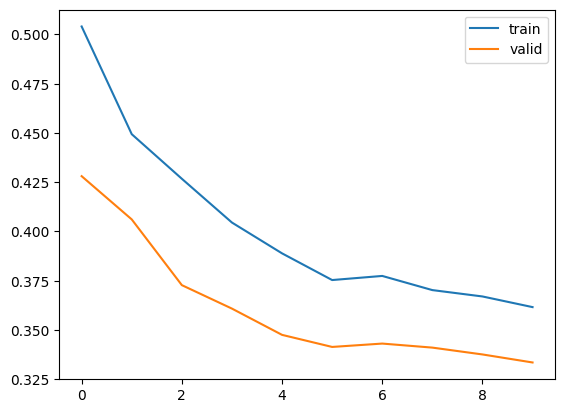

In [193]:
# ==========================================================================================
# CAPTURE THE LEARNING HISTORY OF THE MODEL PER EPOCH
# ==========================================================================================
# 'history.history': CONTAINS THE TRAINING HISTORY FOR EACH EPOCH (LOSS, ACCURACY, ETC.)
# 'pd.DataFrame()': CONVERTS THE HISTORY TO A PANDAS DATAFRAME FOR EASY MANIPULATION
# 'hist['epoch'] = history.epoch': ADDS THE EPOCH NUMBER TO THE DATAFRAME
# ==========================================================================================
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# ==========================================================================================
# PLOT THE LOSS PER EPOCH TO MONITOR TRAINING AND VALIDATION PERFORMANCE
# ==========================================================================================
# 'plt.plot(hist['loss'])': PLOTS THE TRAINING LOSS OVER EPOCHS
# 'plt.plot(hist['val_loss'])': PLOTS THE VALIDATION LOSS OVER EPOCHS
# 'plt.legend(("train" , "valid"), loc=0)': CREATES A LEGEND TO DIFFERENTIATE TRAINING AND VALIDATION CURVES
# ==========================================================================================
# EXPECTED OUTPUT: A LINE PLOT SHOWING THE TRAINING LOSS AND VALIDATION LOSS OVER EACH EPOCH
# ==========================================================================================
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid"), loc=0)


<font color=orange>

## **38g. Evaluate Model "A"**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>16</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Loss on (non-built-in) validation set:</font> <span style='color:darkblue'>0.3739 **(< 0.3743 Training Loss)**</span>
* <font color=#0e92ea>Loss on test set:</font> <span style='color:darkblue'>0.3793 **(> 0.3743 Training Loss)**</span>
* <font color=#0e92ea>Accuracy on (non-built-in) validation set:</font> <span style='color:darkblue'>0.8440 **(< 0.8450 Traing Accuracy)**</span>
* <font color=#0e92ea>Accuracy on test set:</font> <span style='color:darkblue'>0.8500**(> 0.8450 Traing Accuracy)**</span>

In [194]:
# =====================================================================================
# EVALUATE THE MODEL PERFORMANCE ON VALIDATION DATA
# =====================================================================================
# 'model_a.evaluate()': THIS METHOD EVALUATES THE MODEL PERFORMANCE ON THE VALIDATION SET
# 'X_val': INPUT FEATURES FROM THE VALIDATION SET
# 'y_val': TRUE LABELS FROM THE VALIDATION SET
# 'batch_size=16': PROCESSES DATA IN BATCHES OF 16 FOR EFFICIENCY
# =====================================================================================
# EXPECTED OUTPUT: RETURNS TWO VALUES, (1) VALIDATION LOSS AND (2) VALIDATION ACCURACY
# =====================================================================================
skill_validation = model_a.evaluate(X_val, y_val, batch_size=16)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.3491


In [195]:
# =====================================================================================
# EVALUATE THE MODEL PERFORMANCE ON TEST DATA
# =====================================================================================
# 'model_a.evaluate()': THIS METHOD EVALUATES THE MODEL PERFORMANCE ON THE TEST SET
# 'X_test': INPUT FEATURES FROM THE TEST SET
# 'y_test': TRUE LABELS FROM THE TEST SET
# 'batch_size=16': PROCESSES DATA IN BATCHES OF 16 FOR EFFICIENCY
# =====================================================================================
# EXPECTED OUTPUT: RETURNS TWO VALUES, (1) TEST LOSS AND (2) TEST ACCURACY
# =====================================================================================
skill_test = model_a.evaluate(X_test, y_test, batch_size=16)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3523


In [196]:
# =====================================================================================
# PRINT VALIDATION AND TEST SCORES
# =====================================================================================
# 'print()': PRINTS THE STRING OR VARIABLE PROVIDED IN THE PARENTHESES
# 'skill_validation': THE VALIDATION SCORES COMPUTED USING model_a.evaluate() ON VALIDATION SET
# 'skill_test': THE TEST SCORES COMPUTED USING model_a.evaluate() ON TEST SET
# '\n': ADDS A LINE BREAK FOR BETTER READABILITY BETWEEN OUTPUTS
# =====================================================================================
# EXPECTED OUTPUT: VALIDATION AND TEST LOSS/ACCURACY WILL BE DISPLAYED ON THE CONSOLE
# =====================================================================================
print('Non-Built-In Validation Scores:', skill_validation)
print('\n')  # NEWLINE FOR SEPARATION
print('Test Scores:', skill_test)


Non-Built-In Validation Scores: [0.34940552711486816, 0.8544999957084656]


Test Scores: [0.3594360649585724, 0.8585000038146973]


<font color=orange>

## **38h. Confusion Matrix**</font>

* <font color=#0e92ea>Recall:</font> <span style='color:darkblue'>0.462</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>False Negative:</font> <span style='color:darkblue'>10.95% (**> Random Forest Type II Error of 10.05% listed above**)</span>
* <font color=#0e92ea>False Positive:</font> <span style='color:darkblue'>4.05%</span>
* <font color=#0e92ea>True Negative:</font> <span style='color:darkblue'>75.60%</span>
* <font color=#0e92ea>True Positive:</font> <span style='color:darkblue'>9.40%</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Actually Exited:</font> <span style='color:darkblue'>There are 407 actual Exited Customers in the testing dataset, however **Model "A" failed to detect 219** of these. As well, 81 real/regular/current customers were errantly detected as having Exited (Type I Error).</span>

* <font color=#0e92ea>Reduce Number of False Negatives:</font> <span style='color:darkblue'>Build Model "B"</span>

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.735
Recall: 0.477
F1 Score: 0.578


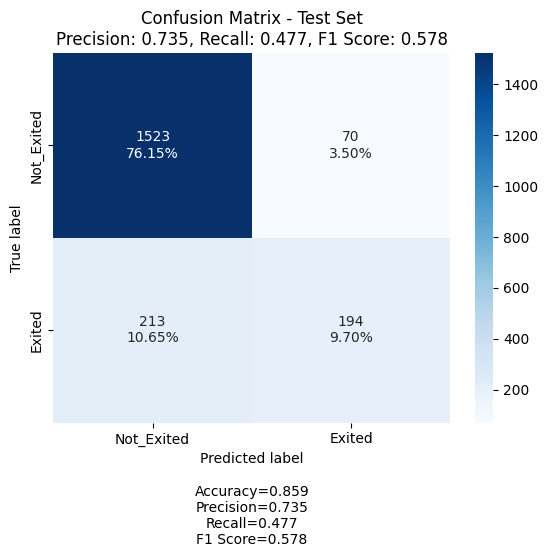

In [200]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED MODEL_A ON THE TEST SET (X_test)
# ============================================================
y_pred1 = model_a.predict(X_test)

# ============================================================
# CONVERT PROBABILITY OUTPUT INTO BINARY PREDICTIONS (1 OR 0)
# IF PREDICTION IS GREATER THAN 0.5, CLASSIFY AS 1 (EXITED), ELSE 0 (NOT_EXITED)
# ============================================================
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_test) AND PREDICTIONS (y_pred1)
# ============================================================
cf_matrix = confusion_matrix(y_test, y_pred1)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT WITH LABELS
# ============================================================
make_confusion_matrix(cf_matrix,
                      group_names=None,
                      categories=['Not_Exited', 'Exited'],
                      cmap='Blues',
                      title=f"Confusion Matrix - Test Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


***

<font color=orange>

## **39. Deep Neural Network -- Model "B"**</font>

* <font color=#0e92ea>Model B:</font> <span style='color:darkblue'>A neural network made of three (3) fully-connected layers with ReLU activation. Take a vector of length 11 (columns) as input. The final layer will output a probability distribution (sigmoid activation function), at it will classify the targets as either having **Exited** or not exited.</span>
    
* <font color=#0e92ea>Dropout:</font> <span style='color:darkblue'>Two (2) dropout step have been included in this model to prevent overfitting.  Dropout is a regularization technique that is used for neural network models by randomly ignoring selected neruons. These neruons are "dropped out".</span>

* <font color=#0e92ea>Early Stopping Regularization:</font> <span style='color:darkblue'>Model "B" is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or shows no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.The model at the time that training is stopped will be used and is known to have good generalization performance.</span>

* <font color=#0e92ea>Weight Initialization - he_normal:</font> <span style='color:darkblue'>Model "B" is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or shows no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.The model at the time that training is stopped will be used and is known to have good generalization performance.</span>

<font color=orange>

## **39a. Create & Compile & Train Model "B" (forward and backward propagation)**</font>

* <font color=#0e92ea>Loss Function:</font> <span style='color:darkblue'>Binary Cross Entropy</span>
    
* <font color=#0e92ea>Optimizer:</font> <span style='color:darkblue'>Adam (Learning Rate: 0.001)</span>

****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>700 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>40</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.9901 to 0.4504 over 40 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.6030 to 0.4033 over 40 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.8519 to 0.8117 over 40 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.8767 to 0.8383 over 40 epochs</span>

****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>600 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>30</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.8569 to 0.4607 over 30 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.5134 to 0.3995 over 30 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.5821 to 0.8021 over 30 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7842 to 0.8300 over 30 epochs</span>

*****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>60 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>20</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.9157 to 0.4116 over 20 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.4542 to 0.3716 over 20 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.6221 to 0.8306 over 20 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7925 to 0.8450 over 20 epochs</span>
*****************************************************************************
* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>512 data objects per batch per epoch</span>
    
* <font color=#0e92ea>Epochs:</font> <span style='color:darkblue'>50</span>
    
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Training Loss:</font> <span style='color:darkblue'>decreases from 0.8212 to 0.4277 over 50 epochs</span>
* <font color=#0e92ea>Validation Loss:</font> <span style='color:darkblue'>decreases from 0.5532 to 0.3757 over 50 epochs</span>
* <font color=#0e92ea>Training Accuracy:</font> <span style='color:darkblue'>increases from 0.6160 to 0.8202 over 50 epochs</span>
* <font color=#0e92ea>Validation Accuracy:</font> <span style='color:darkblue'>increases from 0.7933 to 0.8633 over 50 epochs</span>

In [202]:
# ===============================================================================
# ADDING AN EARLY STOPPING CALLBACK TO STOP TRAINING WHEN VALIDATION LOSS STOPS IMPROVING
# ===============================================================================
# 'EarlyStopping': THIS CALLBACK MONITORS THE 'val_loss' AND STOPS TRAINING IF IT NO LONGER IMPROVES
# 'monitor="val_loss"': SPECIFIES THE METRIC TO MONITOR (IN THIS CASE, VALIDATION LOSS)
# 'min_delta=0': MINIMUM CHANGE IN THE MONITORED METRIC TO QUALIFY AS AN IMPROVEMENT
# 'patience=15': NUMBER OF EPOCHS TO WAIT WITHOUT IMPROVEMENT BEFORE STOPPING
# 'restore_best_weights=True': ENSURES THE MODEL RETAINS THE WEIGHTS FROM THE BEST-EPOCH (LOWEST 'val_loss')
# ===============================================================================
es = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='min',
    restore_best_weights=True
)

# ===============================================================================
# INITIALIZING A SEQUENTIAL MODEL FOR NEURAL NETWORK (MODEL_B)
# ===============================================================================
# 'Sequential()': DEFINES A LINEAR STACK OF LAYERS
# 'name="model_b"': SETS THE MODEL NAME TO 'model_b'
# ===============================================================================
model_b = Sequential(name="model_b")

# ===============================================================================
# ADDING INPUT LAYER WITH 65 UNITS (NEURONS) USING 'he_normal' INITIALIZER
# ===============================================================================
# 'Dense()': CREATES A FULLY CONNECTED LAYER WITH 65 UNITS
# 'input_shape=(11,)': INPUT SHAPE IS 11 FEATURES (ATTRIBUTES FROM TRAINING DATA)
# 'kernel_initializer="he_normal"': INITIALIZES WEIGHTS USING THE 'HE NORMAL' METHOD FOR BETTER TRAINING CONVERGENCE
# 'activation="relu"': ACTIVATES THE NEURONS USING RECTIFIED LINEAR UNIT (RELU), A COMMON NON-LINEAR ACTIVATION FUNCTION
# ===============================================================================
model_b.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))

# ===============================================================================
# ADDING DROPOUT REGULARIZATION LAYER TO REDUCE OVERFITTING
# ===============================================================================
# 'Dropout(0.5)': DROPS 50% OF THE NEURONS IN THIS LAYER TO PREVENT OVERFITTING
# ===============================================================================
model_b.add(Dropout(0.5))

# ===============================================================================
# ADDING ANOTHER HIDDEN LAYER WITH 65 UNITS USING 'he_normal' INITIALIZER
# ===============================================================================
# SAME SETTINGS AS THE FIRST HIDDEN LAYER
# ===============================================================================
model_b.add(Dense(65, kernel_initializer='he_normal', activation='relu'))

# ===============================================================================
# ADDING DROPOUT REGULARIZATION AGAIN TO THIS LAYER
# ===============================================================================
model_b.add(Dropout(0.5))

# ===============================================================================
# OUTPUT LAYER FOR BINARY CLASSIFICATION (1 NEURON WITH 'SIGMOID' ACTIVATION)
# ===============================================================================
# 'Dense(1)': ONLY ONE OUTPUT UNIT BECAUSE IT'S BINARY CLASSIFICATION
# 'activation="sigmoid"': SIGMOID ACTIVATION FUNCTION OUTPUTS A PROBABILITY VALUE BETWEEN 0 AND 1
# ===============================================================================
model_b.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

# ===============================================================================
# COMPILING THE MODEL WITH OPTIMIZER AND LOSS FUNCTION
# ===============================================================================
# 'Adam(learning_rate=0.001)': ADAM OPTIMIZER WITH A LEARNING RATE OF 0.001 FOR OPTIMIZING WEIGHTS
# 'loss="binary_crossentropy"': LOSS FUNCTION FOR BINARY CLASSIFICATION PROBLEMS
# 'metrics=["accuracy"]': TRACKING MODEL PERFORMANCE USING ACCURACY METRIC DURING TRAINING
# ===============================================================================
model_b.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ===============================================================================
# FITTING THE MODEL TO THE TRAINING DATA
# ===============================================================================
# 'X_train, y_train': TRAINING DATA (INPUT FEATURES AND TARGET LABELS)
# 'validation_split=0.2': RESERVES 20% OF THE TRAINING DATA FOR VALIDATION DURING TRAINING
# 'batch_size=512': THE NUMBER OF SAMPLES TO PROCESS BEFORE UPDATING WEIGHTS
# 'epochs=50': MAXIMUM NUMBER OF EPOCHS (TRAINING CYCLES)
# 'callbacks=[es]': USES THE EARLY STOPPING CALLBACK (ES) TO STOP TRAINING IF VALIDATION LOSS DOESN'T IMPROVE
# 'shuffle=True': SHUFFLES THE DATA BEFORE EACH EPOCH TO IMPROVE TRAINING STABILITY
# 'verbose=1': SHOWS DETAILED TRAINING OUTPUT
# ===============================================================================
history_b = model_b.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=50, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 910ms/step - accuracy: 0.4361 - loss: 1.3071 - val_accuracy: 0.7342 - val_loss: 0.6049
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6163 - loss: 0.8607 - val_accuracy: 0.7942 - val_loss: 0.5837
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7106 - loss: 0.7648 - val_accuracy: 0.7942 - val_loss: 0.5709
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7441 - loss: 0.6962 - val_accuracy: 0.7942 - val_loss: 0.5222
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.6430 - val_accuracy: 0.7942 - val_loss: 0.4842
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7400 - loss: 0.6278 - val_accuracy: 0.7983 - val_loss: 0.4638
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7369 - loss: 0.5808 - val_accuracy: 0.8000 - val_loss: 0.4548
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.5609 - val_accuracy: 0.7992 - val_lo

<font color=orange>

## **39b. Plot Training Loss and Compile Model "B"**</font>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on Training Set.</span>

* <font color=#0e92ea>Learning History:</font> <span style='color:darkblue'>Per Epoch on "built-in" Validation Set.</span>

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Scale:</font> <span style='color:darkblue'>0.4 to 0.8</span>

* <font color=#0e92ea>Convergence:</font> <span style='color:darkblue'>Very nice plot of training and validation.</span>

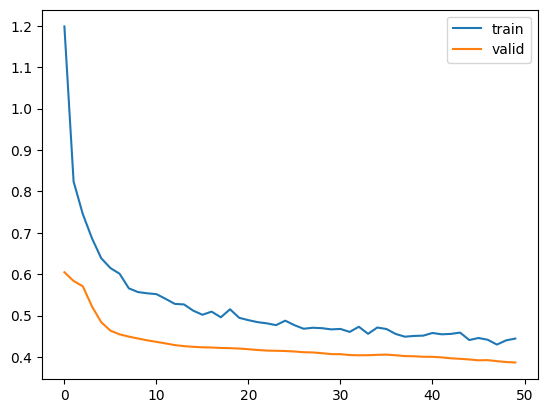

In [203]:
# =======================================================
# CAPTURING LEARNING HISTORY PER EPOCH INTO A PANDAS DATAFRAME
# =======================================================
# 'history_b.history': RETURNS A DICTIONARY CONTAINING LOSS AND ACCURACY VALUES FOR BOTH TRAINING AND VALIDATION SETS OVER EPOCHS
# 'pd.DataFrame()': CONVERTS THE TRAINING HISTORY INTO A PANDAS DATAFRAME FOR EASIER ANALYSIS
# =======================================================
hist = pd.DataFrame(history_b.history)

# =======================================================
# ADDING AN 'epoch' COLUMN TO TRACK EPOCH NUMBERS
# 'history_b.epoch': RETURNS THE LIST OF EPOCH NUMBERS (0 TO 49 IN THIS CASE) FOR WHICH THE MODEL WAS TRAINED
# =======================================================
hist['epoch'] = history_b.epoch

# =======================================================
# PLOTTING THE TRAINING LOSS AND VALIDATION LOSS PER EPOCH
# =======================================================
# 'plt.plot()': PLOTS THE LOSS VALUES STORED IN THE DATAFRAME
# 'hist["loss"]': PLOTS THE TRAINING LOSS VALUES ACROSS EPOCHS
# 'hist["val_loss"]': PLOTS THE VALIDATION LOSS VALUES ACROSS EPOCHS
# =======================================================
plt.plot(hist['loss'])       # TRAINING LOSS
plt.plot(hist['val_loss'])   # VALIDATION LOSS

# =======================================================
# ADDING A LEGEND TO DIFFERENTIATE BETWEEN THE TWO LINES (TRAIN AND VALIDATION)
# 'loc=0': AUTOMATICALLY PLACES THE LEGEND IN THE BEST POSITION IN THE PLOT
# =======================================================
plt.legend(("train", "valid"), loc=0)


<font color=orange>

## **39c. Evaluate Model "B"**</font>

* <font color=#0e92ea>Batch Size:</font> <span style='color:darkblue'>512</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Loss on (non-built-in) validation set:</font> <span style='color:darkblue'>0.3739 **(< 0.4277 Training Loss)**</span>
* <font color=#0e92ea>Loss on test set:</font> <span style='color:darkblue'>0.3793 **(< 0.4277 Training Loss)**</span>
* <font color=#0e92ea>Accuracy on (non-built-in) validation set:</font> <span style='color:darkblue'>0.8440 **(> 0.8202 Traing Accuracy)**</span>
* <font color=#0e92ea>Accuracy on test set:</font> <span style='color:darkblue'>0.8500 **(> 0.8202 Traing Accuracy)**/span>

In [204]:
# =======================================================
# EVALUATING THE MODEL'S PERFORMANCE ON THE VALIDATION DATASET
# =======================================================
# 'model_a.evaluate()': COMPUTES LOSS AND ACCURACY FOR THE MODEL USING THE VALIDATION DATA (X_val, y_val)
# 'X_val': INDEPENDENT VARIABLES FOR VALIDATION SET
# 'y_val': DEPENDENT VARIABLE (TARGET) FOR VALIDATION SET
# 'batch_size=512': SPECIFIES THAT THE MODEL WILL PROCESS 512 SAMPLES AT A TIME DURING EVALUATION (BATCH PROCESSING)
# =======================================================
skill_b_validation = model_a.evaluate(X_val, y_val, batch_size=512)

# =======================================================
# OUTPUT: THE FUNCTION RETURNS TWO VALUES:
# 1. LOSS ON THE VALIDATION SET
# 2. ACCURACY ON THE VALIDATION SET
# THESE VALUES HELP DETERMINE HOW WELL THE MODEL GENERALIZES TO THE VALIDATION DATA
# =======================================================


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.8583 - loss: 0.3488


In [205]:
# =======================================================
# EVALUATING THE MODEL'S PERFORMANCE ON THE TEST DATASET
# =======================================================
# 'model_a.evaluate()': COMPUTES LOSS AND ACCURACY FOR THE MODEL USING THE TEST DATA (X_test, y_test)
# 'X_test': INDEPENDENT VARIABLES FOR TEST SET
# 'y_test': DEPENDENT VARIABLE (TARGET) FOR TEST SET
# 'batch_size=512': SPECIFIES THAT THE MODEL WILL PROCESS 512 SAMPLES AT A TIME DURING EVALUATION (BATCH PROCESSING)
# =======================================================
skill_b_test = model_a.evaluate(X_test, y_test, batch_size=512)

# =======================================================
# OUTPUT: THE FUNCTION RETURNS TWO VALUES:
# 1. LOSS ON THE TEST SET
# 2. ACCURACY ON THE TEST SET
# THESE VALUES HELP ASSESS HOW WELL THE MODEL PERFORMS ON THE UNSEEN TEST DATA.
# =======================================================


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3552 


In [206]:
# =======================================================
# PRINTING ACCURACY SCORES FOR BOTH VALIDATION AND TEST SETS
# =======================================================
# 'print()': FUNCTION USED TO DISPLAY RESULTS IN THE CONSOLE
# 'skill_b_validation': RESULTS FROM EVALUATING THE MODEL ON THE VALIDATION SET (NON-BUILT-IN VALIDATION)
# 'skill_b_test': RESULTS FROM EVALUATING THE MODEL ON THE TEST SET (UNSEEN DATA)
# '\n': ADDS A NEWLINE FOR BETTER READABILITY IN THE OUTPUT
# =======================================================
print('Non-Built-In Validation Scores:', skill_b_validation)
print('\n')  # ADD A NEW LINE TO SEPARATE OUTPUT
print('Test Scores:', skill_b_test)

# =======================================================
# EXPECTED OUTPUT:
# THE FUNCTION WILL PRINT TWO LINES:
# 1. NON-BUILT-IN VALIDATION SCORES (LOSS AND ACCURACY ON VALIDATION DATA)
# 2. TEST SCORES (LOSS AND ACCURACY ON TEST DATA)
# =======================================================


Non-Built-In Validation Scores: [0.3494054973125458, 0.8544999957084656]


Test Scores: [0.35943615436553955, 0.8585000038146973]


<font color=orange>

## **39d. Confusion Matrix**</font>

* <font color=#0e92ea>Recall:</font> <span style='color:darkblue'>0.275 (**No matter what new epoch batch combination I use, the recall decreased (got worse)**</span>
  

###### **OBSERVATIONS:**
    
* <font color=#0e92ea>False Negative:</font> <span style='color:darkblue'>14.75% (**> Model "A" Type II Error of 10.95% listed above**)</span>
* <font color=#0e92ea>False Positive:</font> <span style='color:darkblue'>1.05%</span>
* <font color=#0e92ea>True Negative:</font> <span style='color:darkblue'>78.60%</span>
* <font color=#0e92ea>True Positive:</font> <span style='color:darkblue'>5.60%</span>


###### **OBSERVATIONS:**
    
* <font color=#0e92ea>Actually Exited:</font> <span style='color:darkblue'>There are 407 actual Exited Customers in the testing dataset, however **Model "B" failed to detect 295** of these. As well, 21 real/regular/current customers were errantly detected as having Exited (Type I Error).</span>

* <font color=#0e92ea>Reduce Number of False Negatives:</font> <span style='color:darkblue'>Try "weighted loss" for the imbalanced dataset on Model "A"</span>

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
Precision: 0.875
Recall: 0.172
F1 Score: 0.287


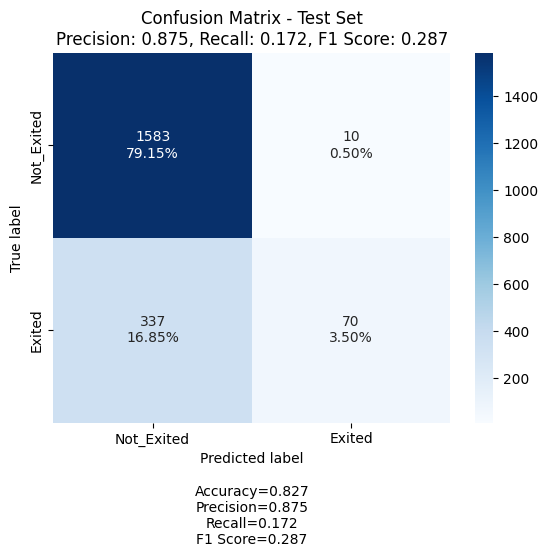

In [208]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED MODEL_B ON THE TEST SET (X_test)
# ============================================================
y_pred1 = model_b.predict(X_test)

# ============================================================
# CONVERT PROBABILITY OUTPUT INTO BINARY PREDICTIONS (1 OR 0)
# IF PREDICTION IS GREATER THAN 0.5, CLASSIFY AS 1 (EXITED), ELSE 0 (NOT_EXITED)
# ============================================================
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_test) AND PREDICTIONS (y_pred1)
# ============================================================
cf_matrix = confusion_matrix(y_test, y_pred1)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT WITH LABELS
# ============================================================
make_confusion_matrix(cf_matrix,
                      group_names=None,
                      categories=['Not_Exited', 'Exited'],
                      cmap='Blues',
                      title=f"Confusion Matrix - Test Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.875
Recall: 0.172
F1 Score: 0.287


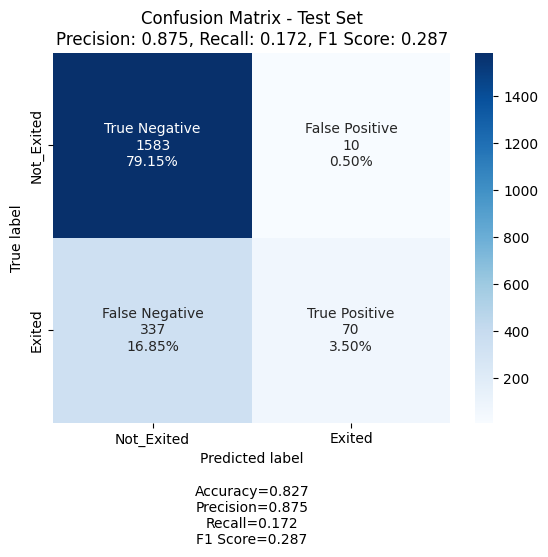

In [209]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sn

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED MODEL_B ON THE TEST SET (X_test)
# ============================================================
y_pred1 = model_b.predict(X_test)

# ============================================================
# CONVERT PROBABILITY OUTPUT INTO BINARY PREDICTIONS (1 OR 0)
# IF PREDICTION IS GREATER THAN 0.5, CLASSIFY AS 1 (EXITED), ELSE 0 (NOT_EXITED)
# ============================================================
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_test) AND PREDICTIONS (y_pred1)
# ============================================================
cf_matrix = confusion_matrix(y_test, y_pred1)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT WITH LABELS
# ============================================================
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']  # CUSTOM LABELS FOR THE CELLS
categories = ['Not_Exited', 'Exited']  # CLASS LABELS
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues',
                      title=f"Confusion Matrix - Test Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


***

<font color=orange>

## **40. Weighted Loss**</font>

* <font color=#0e92ea>Class Imbalance:</font> <span style='color:darkblue'> On Model "A", address the class imbalance by giving additional weight to the loss associated to errors that were made on Exited detections.</span>
  
###### **OBSERVATIONS:**
    
* <font color=#0e92ea>CLASS 0 WEIGHT:</font> <span style='color:darkblue'>0.6278777731268314 -- Optimal Value of the Threshold. Use Threshold to covert probabilites into labels.</span>

* <font color=#0e92ea>CLASS 1 WEIGHT:</font> <span style='color:darkblue'>2.454991816693944 -- Optimal Value of the Threshold. Use Threshold to covert probabilites into labels.</span>

* <font color=#0e92ea>TEST Recall:</font> <span style='color:darkblue'>0.717</span>

* <font color=#0e92ea>TEST Loss:</font> <span style='color:darkblue'>0.4939</span>

* <font color=#0e92ea>Type II Error:</font> <span style='color:darkblue'>5.75%</span>

**OPTIMAL THRESHOLD VIA WEIGHTED LOSS has increased the recall on Model "A", has decreased the loss on Model "A", and has decreased the Type II Error (False Negative) on Model "A".**

In [211]:
# ================================================================
# IMPORT 'class_weight' FROM SKLEARN UTILS TO COMPUTE CLASS WEIGHTS
# ================================================================
from sklearn.utils import class_weight

# ========================================================================================
# COMPUTE CLASS WEIGHTS TO HANDLE IMBALANCED DATASET
# 'compute_class_weight': THIS FUNCTION CALCULATES WEIGHTS THAT CAN BE USED TO BALANCE CLASSES IN IMBALANCED DATASETS
# 'class_weight='balanced'': CALCULATES WEIGHTS TO ENSURE EACH CLASS CONTRIBUTES EQUALLY TO THE LOSS FUNCTION
# 'classes': UNIQUE CLASS LABELS FROM THE TARGET VARIABLE y_train
# 'y': ARRAY CONTAINING ALL TARGET LABELS FROM THE y_train DATASET
# ========================================================================================
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=np.array([y_train.iloc[i] for i in range(len(y_train))])
)

# ============================================================
# CONVERT THE COMPUTED CLASS WEIGHTS TO A DICTIONARY FORMAT
# 'dict(enumerate(class_weights))': ASSIGN UNIQUE INDICES AS KEYS TO THE CORRESPONDING CLASS WEIGHTS
# ============================================================
class_weights = dict(enumerate(class_weights))

# ============================================================
# OUTPUT CLASS WEIGHTS
# PRINT THE DICTIONARY OF CLASS WEIGHTS WHICH CAN BE USED IN TRAINING THE MODEL
# ============================================================
print(class_weights)


{0: 0.6278777731268314, 1: 2.454991816693944}


In [214]:
# =============================================================
# IMPORT 'class_weight' FROM SKLEARN UTILS TO HANDLE IMBALANCED DATA
# =============================================================
from sklearn.utils import class_weight

# ======================================================================================================================
# COMPUTE CLASS WEIGHTS TO HANDLE CLASS IMBALANCE IN THE DATA
# 'class_weight="balanced"': ADJUSTS THE WEIGHTS BASED ON CLASS FREQUENCIES SO EACH CLASS CONTRIBUTES EQUALLY TO THE LOSS FUNCTION
# 'classes=np.unique(y_train)': EXTRACT UNIQUE CLASS LABELS FROM THE TARGET VARIABLE 'y_train'
# 'y=np.array([y_train.iloc[i] for i in range(len(y_train))])': CREATE AN ARRAY CONTAINING ALL TARGET LABELS FROM 'y_train'
# ======================================================================================================================
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=np.array([y_train.iloc[i] for i in range(len(y_train))])
)

# ==========================================================================================================
# CONVERT THE CALCULATED CLASS WEIGHTS TO A DICTIONARY FORMAT FOR EASIER ACCESS
# 'dict(enumerate(class_weights))': THIS FUNCTION MAPS CLASS LABELS TO THEIR CORRESPONDING WEIGHTS IN DICTIONARY FORM
# ==========================================================================================================
class_weights = dict(enumerate(class_weights))

# ==========================================================
# OUTPUT THE DICTIONARY OF CLASS WEIGHTS TO SEE THE RESULTS
# PRINTS THE CLASS WEIGHTS TO ALLOW YOU TO OBSERVE THE ASSIGNED IMPORTANCE FOR EACH CLASS
# ==========================================================
print(class_weights)


{0: 0.6278777731268314, 1: 2.454991816693944}


In [215]:
# ===========================================================
# IMPORT NECESSARY FUNCTIONS TO HANDLE CLASS WEIGHTS IN IMBALANCED DATASETS
# 'class_weight' AND 'compute_class_weight' WILL BE USED TO COMPUTE AND APPLY CLASS WEIGHTS
# ===========================================================
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

# ================================
# DEFINE THE CLASS LABELS (0 AND 1)
# THESE ARE THE TARGET CLASSES, WHERE 0 IS NON-EXITED CUSTOMERS AND 1 IS EXITED CUSTOMERS
# ================================
classes = [0, 1]

# ===========================================================================================================
# COMPUTE CLASS WEIGHTS TO BALANCE THE DATA
# 'compute_class_weight': CALCULATES WEIGHTS FOR EACH CLASS BASED ON THE IMBALANCE IN CLASS DISTRIBUTION
# 'class_weight='balanced'': THIS TELLS THE FUNCTION TO AUTOMATICALLY ADJUST WEIGHTS BASED ON CLASS FREQUENCIES
# 'classes=classes': PROVIDES THE CLASS LABELS THAT WE WANT TO CALCULATE WEIGHTS FOR (0 AND 1)
# 'y=np.array([y_train.iloc[i] for i in range(len(y_train))])': EXTRACTS THE TARGET VALUES FROM 'y_train' AS AN ARRAY
# ===========================================================================================================
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=np.array([y_train.iloc[i] for i in range(len(y_train))]))

# ==============================================================
# CONVERT THE CLASS WEIGHTS INTO A DICTIONARY FORMAT FOR EASY USAGE
# 'dict(enumerate(class_weights))': CREATES A MAPPING OF CLASS LABELS TO THEIR CORRESPONDING WEIGHTS
# ==============================================================
class_weights = dict(enumerate(class_weights))

# ===================================================
# PRINT OUT THE CLASS WEIGHTS TO UNDERSTAND THE WEIGHTS
# THE OUTPUT WILL SHOW THE WEIGHTS ASSIGNED TO CLASS 0 AND CLASS 1 BASED ON THE DATA IMBALANCE
# ===================================================
class_weights


{0: 0.6278777731268314, 1: 2.454991816693944}

In [218]:
# =============================================================
# ENSURE CLASS WEIGHTS ARE COMPUTED USING THE UNIQUE LABELS IN 'y_train'
# THE 'class_weight' FUNCTION AUTOMATICALLY HANDLES IMBALANCED CLASSES
# =============================================================
from sklearn.utils import class_weight
import numpy as np

# ===============================================================================
# CHECK THE FORMAT OF 'y_train' TO ENSURE IT IS A NUMPY ARRAY OR PANDAS SERIES
# CONVERT TO NUMPY ARRAY IF IT'S A PANDAS SERIES TO AVOID INDEXING ISSUES
# ===============================================================================
if isinstance(y_train, pd.Series):
    y_train = y_train.values  # CONVERTING TO NUMPY ARRAY IF IT'S A PANDAS SERIES

# ===============================================================================
# COMPUTE CLASS WEIGHTS BASED ON THE UNIQUE LABELS IN 'y_train'
# 'class_weight="balanced"': ADJUSTS WEIGHTS TO MAKE EACH CLASS EQUALLY IMPORTANT
# 'classes=np.unique(y_train)': ENSURES THE CORRECT CLASS LABELS ARE USED FOR WEIGHTS
# ===============================================================================
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train  # NOW A NUMPY ARRAY
)

# ===============================================================================
# CONVERT THE RESULTING CLASS WEIGHTS INTO A DICTIONARY FOR EASY ACCESS
# 'dict(enumerate(class_weights))': MAPS CLASS LABELS TO THEIR CORRESPONDING WEIGHTS
# ===============================================================================
class_weights = dict(enumerate(class_weights))

# ==========================================================
# TRAIN THE NEURAL NETWORK MODEL WITH CLASS WEIGHTS
# THE CLASS WEIGHTS WILL HELP TO BALANCE THE DATA BY GIVING MORE IMPORTANCE TO UNDERREPRESENTED CLASSES
# ==========================================================
history_a = model_a.fit(
    X_train,          # TRAINING DATA INPUTS
    y_train,          # TRAINING DATA TARGETS
    batch_size=15,    # NUMBER OF SAMPLES PROCESSED BEFORE UPDATING THE MODEL WEIGHTS
    epochs=5,         # NUMBER OF TIMES THE MODEL WILL PROCESS THE ENTIRE TRAINING DATASET
    class_weight=class_weights,  # APPLY CLASS WEIGHTS TO DEAL WITH IMBALANCED CLASSES
    shuffle=True,     # SHUFFLE THE DATA AFTER EACH EPOCH TO HELP IMPROVE LEARNING STABILITY
    verbose=1         # PRINT PROGRESS AND METRICS DURING TRAINING
)


Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8041 - loss: 0.5076
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7871 - loss: 0.4802
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7824 - loss: 0.4786
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7729 - loss: 0.4808
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7852 - loss: 0.4724


In [219]:
# ==========================================================
# EVALUATE THE NEURAL NETWORK MODEL PERFORMANCE ON THE TEST SET
# USING THE CLASS WEIGHTS THAT WERE APPLIED DURING TRAINING
# ==========================================================
score_weighted = model_a.evaluate(
    X_test,  # TEST DATA INPUTS
    y_test   # TEST DATA TARGETS
)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7570 - loss: 0.4856


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.449
Recall: 0.740
F1 Score: 0.558


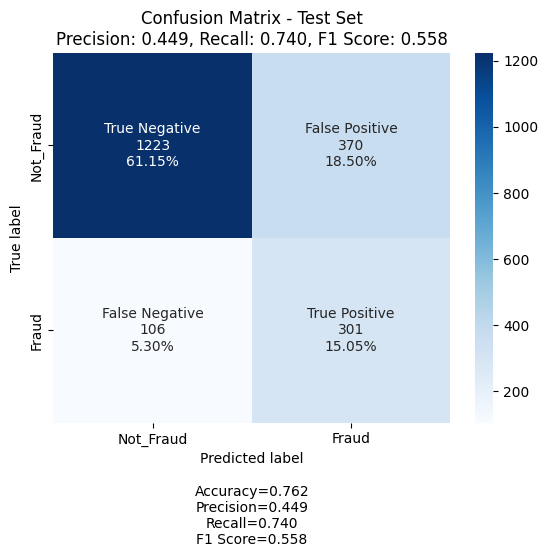

In [220]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sn

# ============================================================
# GENERATE PREDICTIONS USING THE TRAINED MODEL_A ON THE TEST SET (X_test)
# ============================================================
y_pred1 = model_a.predict(X_test)

# ============================================================
# CONVERT PROBABILITY OUTPUT INTO BINARY PREDICTIONS (1 OR 0)
# IF PREDICTION IS GREATER THAN 0.5, CLASSIFY AS 1 (FRAUD), ELSE 0 (NOT_FRAUD)
# ============================================================
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]

# ============================================================
# CALCULATE THE CONFUSION MATRIX BASED ON TRUE LABELS (y_test) AND PREDICTIONS (y_pred1)
# ============================================================
cf_matrix = confusion_matrix(y_test, y_pred1)

# ============================================================
# CALCULATE PRECISION, RECALL, AND F1 SCORES BASED ON PREDICTIONS AND TRUE LABELS
# ============================================================
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# ============================================================
# PRINT OUT THE SCORES FOR EVALUATION
# ============================================================
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ============================================================
# NOW PASS THE CONFUSION MATRIX (cf_matrix) TO THE FUNCTION TO PLOT IT WITH LABELS
# ============================================================
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']  # CUSTOM LABELS FOR THE CELLS
categories = ['Not_Fraud', 'Fraud']  # CLASS LABELS

make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues',
                      title=f"Confusion Matrix - Test Set\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


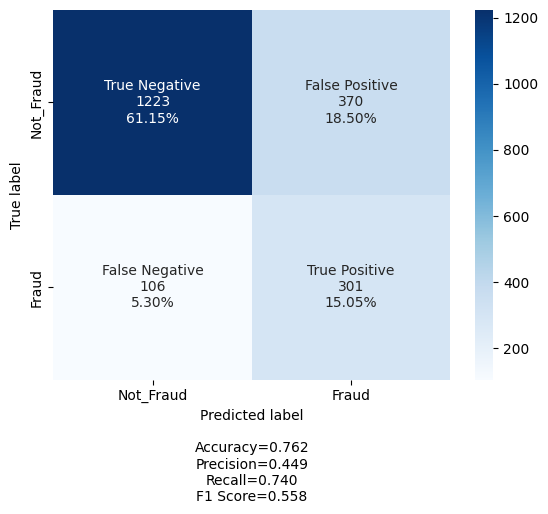

In [221]:
## Confusion Matrix on the unseen test set
import seaborn as sn
y_pred1 = model_a.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

<font color=orange>

## **41. ROC-AUC**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>ROC_AUC for Keras:</span> <span style='color:darkblue'>Great Learning did not teach us how to visualize a ROC-AUC curve with Keras.  They only taught us how to construct a ROC-AUC visualization with sklearn. I tried understanding the Keras documentation</span>




63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


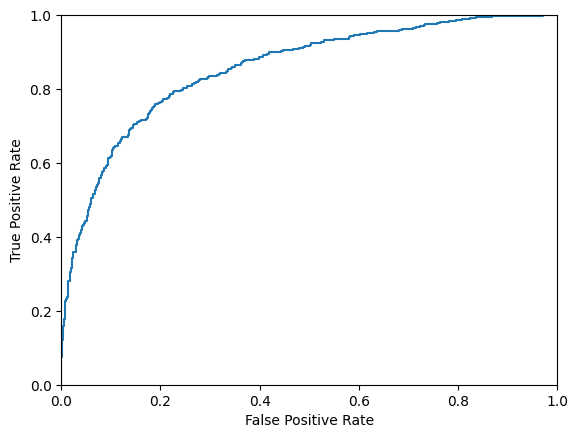

In [222]:
# =======================================================
# GENERATE PREDICTED PROBABILITIES FOR THE VALIDATION SET
# =======================================================
y_val_cat_prob = model_a.predict(X_val)  # MODEL PREDICTIONS FOR VALIDATION DATA

# =======================================================
# IMPORT ROC CURVE AND AUC METRICS FROM sklearn
# =======================================================
from sklearn.metrics import roc_curve, roc_auc_score

# ================================================================
# CALCULATE FALSE POSITIVE RATE (FPR), TRUE POSITIVE RATE (TPR),
# AND THRESHOLDS BASED ON PREDICTED PROBABILITIES AND TRUE LABELS
# ================================================================
fpr, tpr, thresholds = roc_curve(y_val, y_val_cat_prob)

# ==========================================================
# FUNCTION TO PLOT THE ROC CURVE SHOWING FPR VS TPR
# ==========================================================
def plot_roc_curve(fpr, tpr):
    # ===========================
    # PLOT ROC CURVE
    # ===========================
    plt.plot(fpr, tpr)  # PLOT FPR VS TPR
    plt.axis([0, 1, 0, 1])  # SET X AND Y AXIS LIMITS
    plt.xlabel('False Positive Rate')  # LABEL X-AXIS
    plt.ylabel('True Positive Rate')  # LABEL Y-AXIS
    plt.show()  # DISPLAY PLOT

# =======================================================
# CALL THE FUNCTION TO PLOT ROC CURVE
# =======================================================
plot_roc_curve(fpr, tpr)  # PLOT THE ROC CURVE


<font color=orange>

## **42. SMOTE -- upsample SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>Minority Class:</span> <span style='color:darkblue'>Incease the frequency of the minority class. (Attrition Class)</span>
    
* <span style='color:#0e92ea'>Objective:</span> <span style='color:darkblue'>Decrease False Negatives to better train the model.</span>

Where should SMOTE fit in sequence?
ChatGPT said:
ChatGPT
SMOTE (Synthetic Minority Over-sampling Technique) should be applied after splitting the dataset into training and test sets but before training the model. Specifically, SMOTE is applied only to the training set to address class imbalance. You don't apply SMOTE to the test or validation sets because those should remain representative of the real-world distribution of your data.

Here's the proper sequence:

1. Split the dataset
Split your dataset into training and test sets using train_test_split.
2. Apply SMOTE to the training set
Use SMOTE to resample the training data (apply SMOTE only to X_train and y_train).
3. Standardize/Normalize the data
Apply standardization or normalization to both X_train and X_test. (Since SMOTE generates new samples based on X_train, standardize the data after SMOTE.)
4. Train the model
Train your model using the resampled X_train and y_train.
5. Evaluate on validation/test sets
Evaluate the model on the original X_val and X_test (not resampled), to check how well the model generalizes to unseen data.
Sequence with SMOTE:
python
Copy code
# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Step 2: Apply SMOTE to the training set
sm = SMOTE(sampling_strategy=1, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 3: Standardize the data after SMOTE
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 4: Train your model
model.fit(X_train_res, y_train_res)

# Step 5: Evaluate the model on the test set
model.evaluate(X_test, y_test)
Key Notes:
SMOTE is applied only to the training data, not the validation or test sets, to prevent data leakage.
Standardization/Normalization is done after SMOTE because SMOTE alters the feature space by generating synthetic samples.







In [223]:
# SMOTE implementation for upsampling
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '0': {}".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After UpSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {}'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1222
Before UpSampling, counts of label '0': 4778
After UpSampling, counts of label '1': 4778
After UpSampling, counts of label '0': 4778
After UpSampling, the shape of train_X: (9556, 11)
After UpSampling, the shape of train_y: (9556,)


In [224]:
# ============================================================
# PRINT NUMBER OF '1' (POSITIVE CLASS) INSTANCES BEFORE UPSAMPLING
# ============================================================
print("Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))

# ============================================================
# PRINT NUMBER OF '0' (NEGATIVE CLASS) INSTANCES BEFORE UPSAMPLING
# ============================================================
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# =======================================================================================
# APPLY SMOTE (SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE) TO RESAMPLE THE MINORITY CLASS
# sampling_strategy=1 ENSURES BOTH CLASSES HAVE EQUAL REPRESENTATION AFTER UPSAMPLING
# k_neighbors=5: SYNTHESIZE NEW DATA POINTS BASED ON 5 NEAREST NEIGHBORS
# random_state=1 ENSURES REPRODUCIBILITY OF RESULTS
# =======================================================================================
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

# ===================================================================
# FIT SMOTE TO X_train AND y_train, RESAMPLE TO CREATE BALANCED DATA
# RESHAPE y_train WITH ravel() TO ENSURE PROPER FORMATTING
# ===================================================================
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# ============================================================
# PRINT NUMBER OF '1' (POSITIVE CLASS) INSTANCES AFTER UPSAMPLING
# ============================================================
print("After UpSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

# ============================================================
# PRINT NUMBER OF '0' (NEGATIVE CLASS) INSTANCES AFTER UPSAMPLING
# ============================================================
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res == 0)))

# ================================================================
# PRINT SHAPE OF X_train AFTER UPSAMPLING TO VERIFY THE DIMENSIONS
# ================================================================
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))

# ================================================================
# PRINT SHAPE OF y_train AFTER UPSAMPLING TO VERIFY THE DIMENSIONS
# ================================================================
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 1222
Before UpSampling, counts of label '0': 4778 

After UpSampling, counts of label '1': 4778
After UpSampling, counts of label '0': 4778 

After UpSampling, the shape of train_X: (9556, 11)
After UpSampling, the shape of train_y: (9556,) 



<font color=orange>

## **43. CONCLUSION / INSIGHTS / KEY FINDINGS / RECOMMENDATIONS**</font>
    

###### **OBSERVATIONS:**
    
* <span style='color:#0e92ea'>**Recall**:</span> <span style='color:darkblue'>
    
    Recall should have increased if/when Weighted Loss and/or SMOTE were applied to Model "A". </span>

* <span style='color:#0e92ea'>**Threshold**:</span> <span style='color:darkblue'>
    
The weights, via gradient descent,  indicate connection strengths and the threshold value determines whether or not a neuron fires. Given a training dataset, the neural network is designed in such a way that the number of neurons in the input layer is equal to the number of features. Inputs go into the first layer whose outputs are then inputs into the second layer, and so on... to a final outputs 0 or 1. This all depends upon whether or not the weighted sum of its inputs are above or below a certain threshold. A fixed network with fixed connection strengths between nodes and fixed thresholds can be used to classify inputs as 0 or 1. This network represents a classification</span>

* <span style='color:#0e92ea'>**Upgrade Service Delivery Model**:</span> <span style='color:darkblue'>
    
    Teaching current customers the ease of convenience and the benefits of Online Banking should be the top priority of the AllLife Marketing team. By reaching out with electronic correspondences that have easy-to-spot "call-to-action" buttons, the bank can upgrade their service to current customers.  For Cluster 0, the bank can train it's brick-and-mortar personnel to engage with each customer with a focus on how to easily utilize the bank's credit card services 24/7 online, and for Cluster 2 customers, the bank's telecommunication team can be trained to walk customers through the online login and credit card features.</span>

* <span style='color:#0e92ea'>**Hyperparameter Tuning Set Before Training**:</span> <span style='color:darkblue'>
    Number of Hidden Layers (network structure), Learning Rate (determines how the network is trained), Activation Functions, Optimize Weights, Optimize Biases, Dropout (to avoid overfitting), Batch size, Epochs
     </span>

* <span style='color:#0e92ea'>**Bivariate Analysis and Customer Profile**:</span> <span style='color:darkblue'>
    Observations in #25 (above) reveal my understanding of how EDA can accompany DNN in classifying binary response variables.
    ###### **EXITED CUSTOMERS BY GEOGRAPHY  (mean values):**
    
GEOGRAPHY | GENDER | AGE | CREDIT SCORE | BALANCE | TENURE | SALARY
----------|--------|-----|--------------|---------|--------|-------
Germany   | Female |44.89|    647.69    | 120,361.08|5.01|98,403.89
France    | Female |45.13|    641.91    |  71,192.80|5.00|103,439.28
Spain     | Female |44.15|    647.48    |  72,513.35|4.66|103,629.55
     </span>